# Time evolution Plots

In [82]:
%load_ext autoreload
%autoreload 2

In [228]:
import numpy as np
from scipy.optimize import curve_fit

from typing import Literal, Union

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, load_list_of_lists, anim, get_cx, get_cy
from qs_mps.applications.Z2.relevant_observables import (
                                                        time_ev_string_width,
                                                        time_ev_string_width_occupation,
                                                        string_width_exact_chi, 
                                                        entropy,
                                                        time_entropy_exact, 
                                                        time_entropy,
                                                        get_fit_params,
                                                        )

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 10
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

font = {'family': 'serif', 'size': 12}
plt.rcParams.update({'font.family': font['family'], 'font.size': font['size']})

model = "Z2_dual"
bc = "pbc"
cx = None
cy = None
sector = "2_particle(s)_sector"
Ls = [30]
L = 30

# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
path = "add_your_path_to_save_data"
path = "/Users/fradm/Desktop/vanilla_data"
path_tensor = f"C:/Users/HP/Desktop/projects/1_Z2"
path_tensor = f"/Users/fradm/Desktop/projects/1_Z2"
path_figures = "add_you_path_to_save_figures"
path_figures = "/Users/fradm/Google Drive/My Drive/projects/1_Z2"
path_figures = "/Users/fradm/Desktop/projects/1_Z2"
# path_figures = "G:/My Drive/projects/1_Z2"
# path_figures = "G:/My Drive/projects/1_Z2"

colors = ["yellowgreen", "darkcyan", "firebrick", "darkorchid"]
colors = ["#60A7F3","#9E76AB","#DC4563"]
colors = ["#4688CE","#916799","#DC4563"]
colors = ["#4688CE","#9B4DB7","#DC4563"]


In [229]:
l, L = 6, 30
chi = 256

# Fix g, R analysis

In [204]:
l, L, R, bc = 3, 3, 1, "pbc"
l, L, R, bc = 4, 30, 10, "pbc"
l, L, R, bc = 4, 30, 15, "pbc"
# l, L, R, bc = 5, 30, 20, "pbc"
R = 20
# l, L, R, bc = 3, 10, 2, "pbc"
h_i, h_ev = 2.0, 2.0
# h_i, h_ev = 0.1, 0.1
h_i, h_ev = 0.725, 0.725
# h_i, h_ev = 0.8, 0.8
# delta, steps = 0.05, 20
delta, steps = 0.01, 200
delta, steps = 0.01, 400
delta, steps = 0.01, 50
# delta, steps = 0.005, 400
save_gif = True
cx = get_cx(L=L, R=R)
cy = get_cy(l=l, bc=bc)
bond = False
if bond:
    where = L//2
else:
    where = "all"
# chis = [2,4,8,16,24,32]
# chis = [32,64,128]
chis = [64,128]
of = 0.2

## Truncation error

In [205]:
trunc_err = []
for chi in chis:
    trunc_err_chi = np.load(
        f"{path_tensor}/results/error_data/errors_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    trunc_err.append(trunc_err_chi)

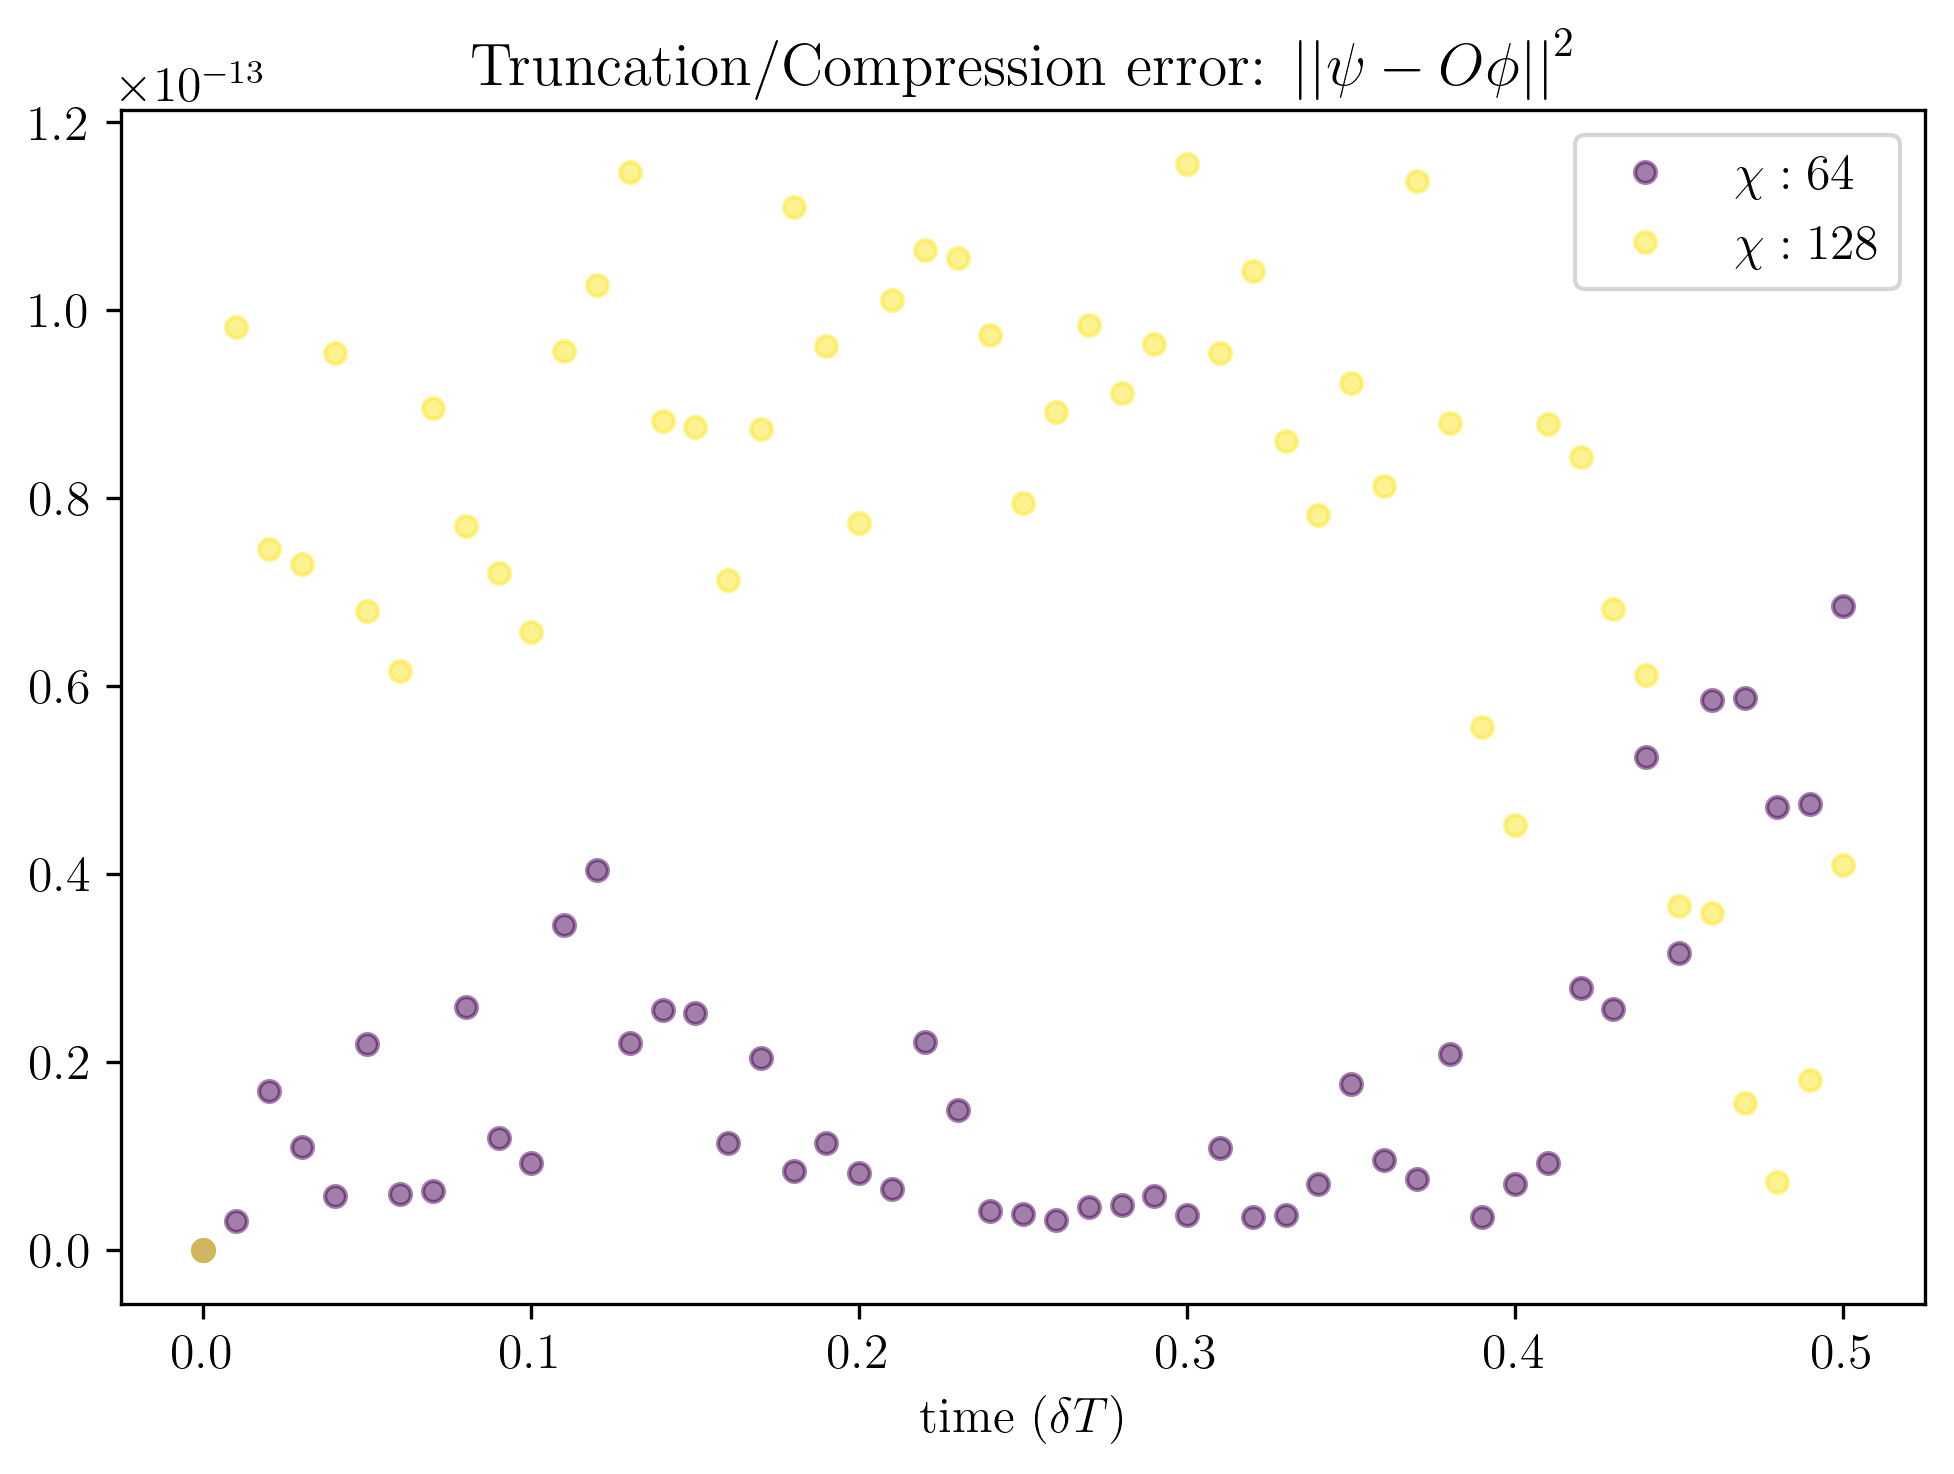

In [206]:
colors = create_sequential_colors(len(chis))
plt.title("Truncation/Compression error: ${||\psi - O \phi||}^2$")
for i, errs in enumerate(trunc_err):
    plt.plot(delta*np.asarray(range(steps+1)), errs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

## Entropy

In [207]:
entropies = []
for chi in chis:
    # entr_chi = load_list_of_lists(
    #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entr_chi = np.load(
        f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entropies.append(entr_chi)

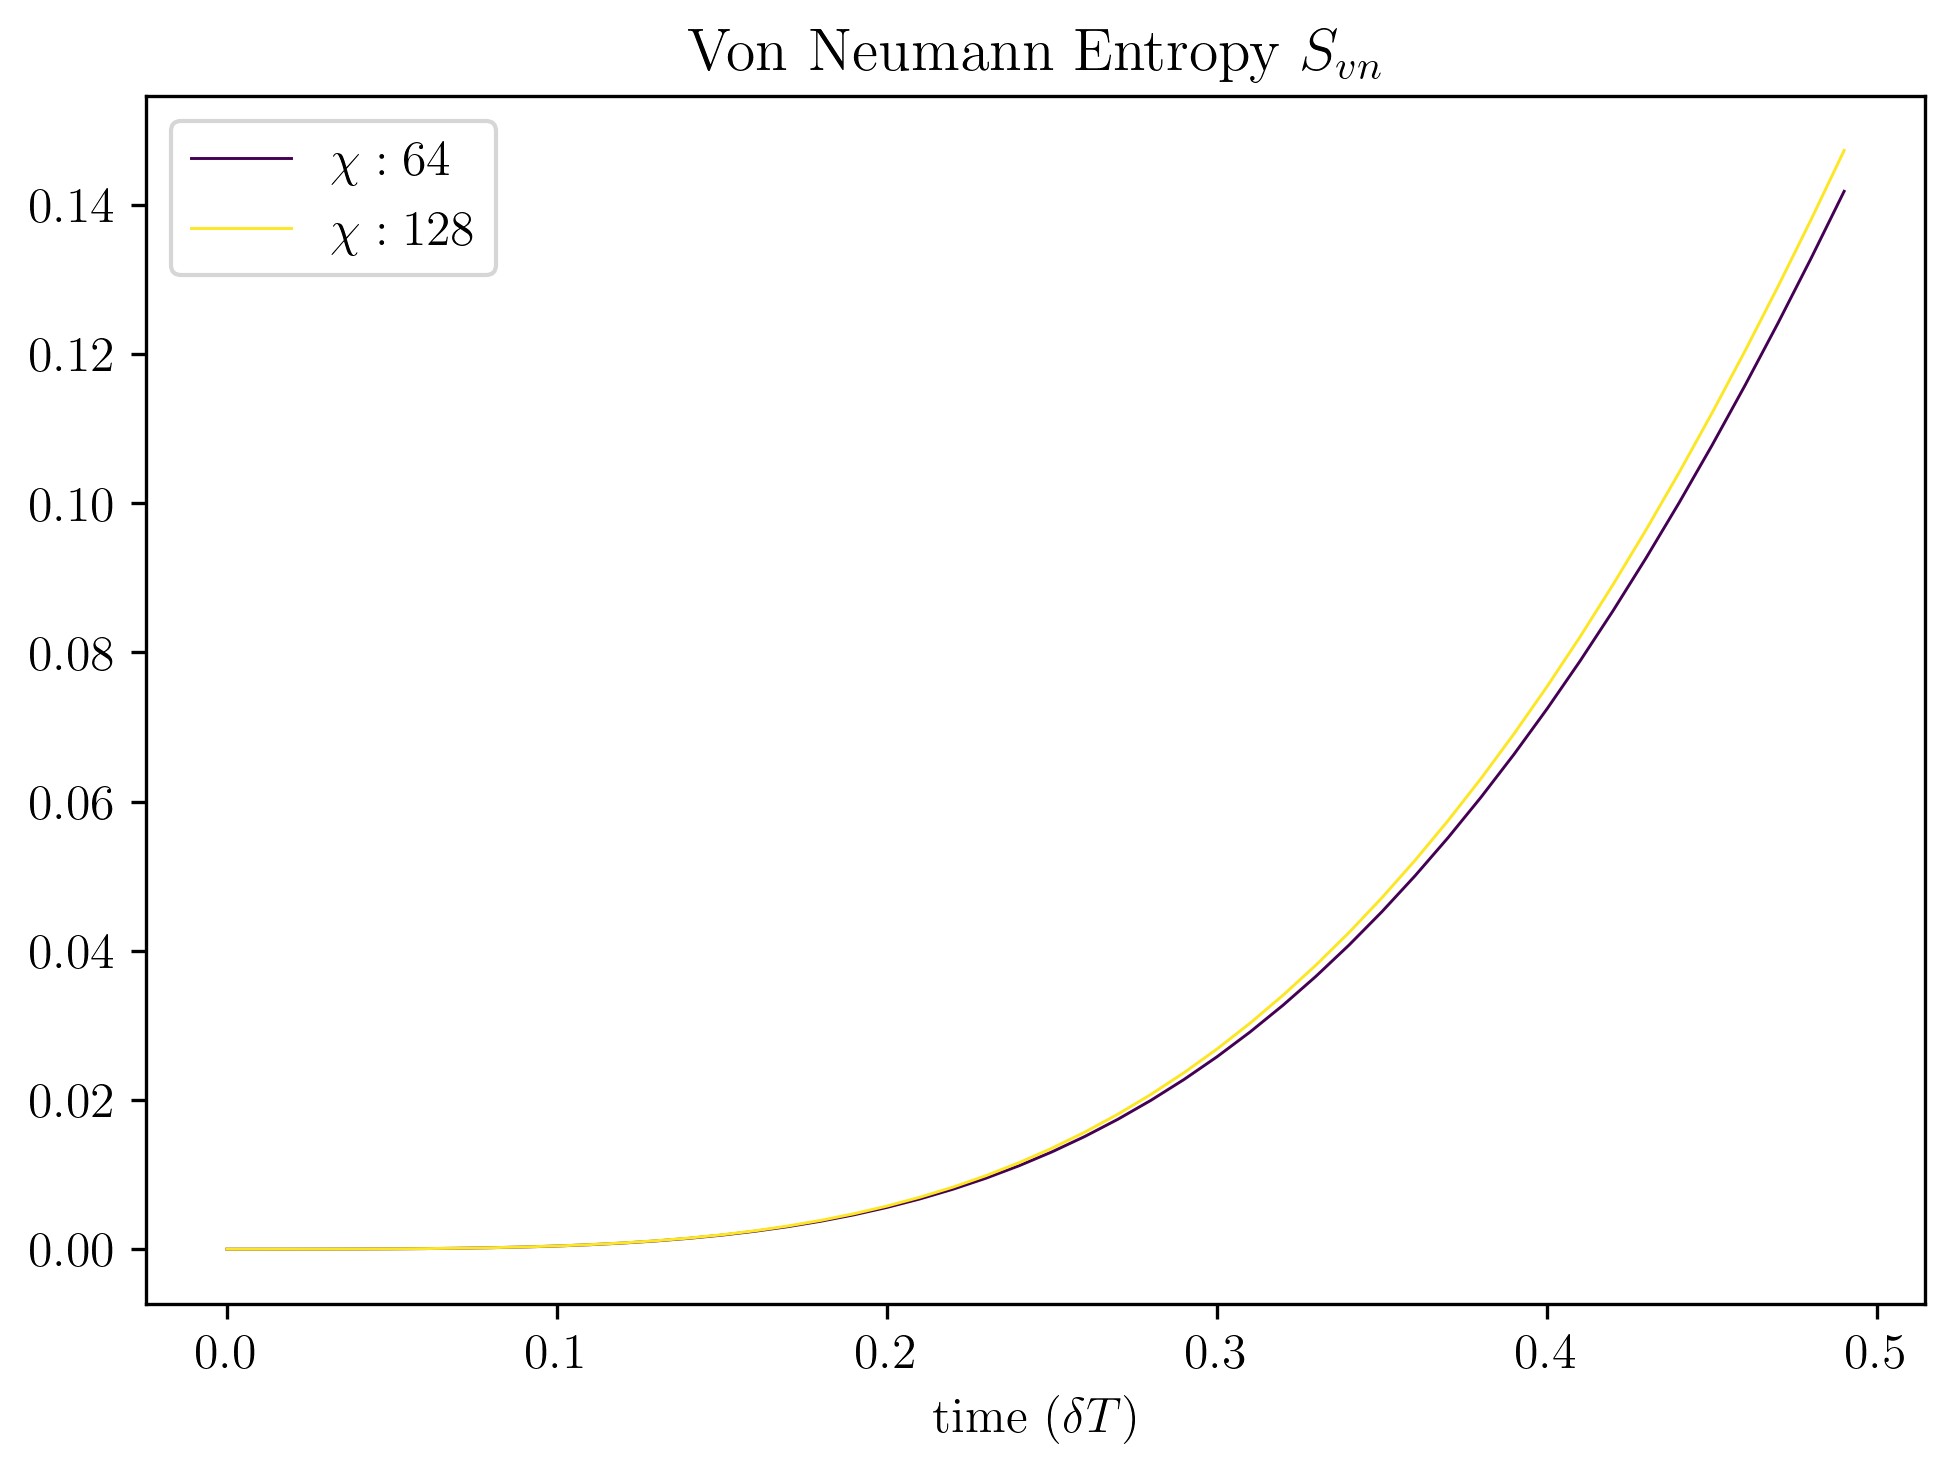

In [208]:
colors = create_sequential_colors(len(chis))
plt.title("Von Neumann Entropy $S_{vn}$")
for i, entrs in enumerate(entropies):
    obs = entrs[1:] - entrs[1]
    plt.plot(delta*np.asarray(range(steps)), obs, linestyle="-", linewidth=0.7, markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

[-1, 0, 1, 2]


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_907/1147169996.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_907/1147169996.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


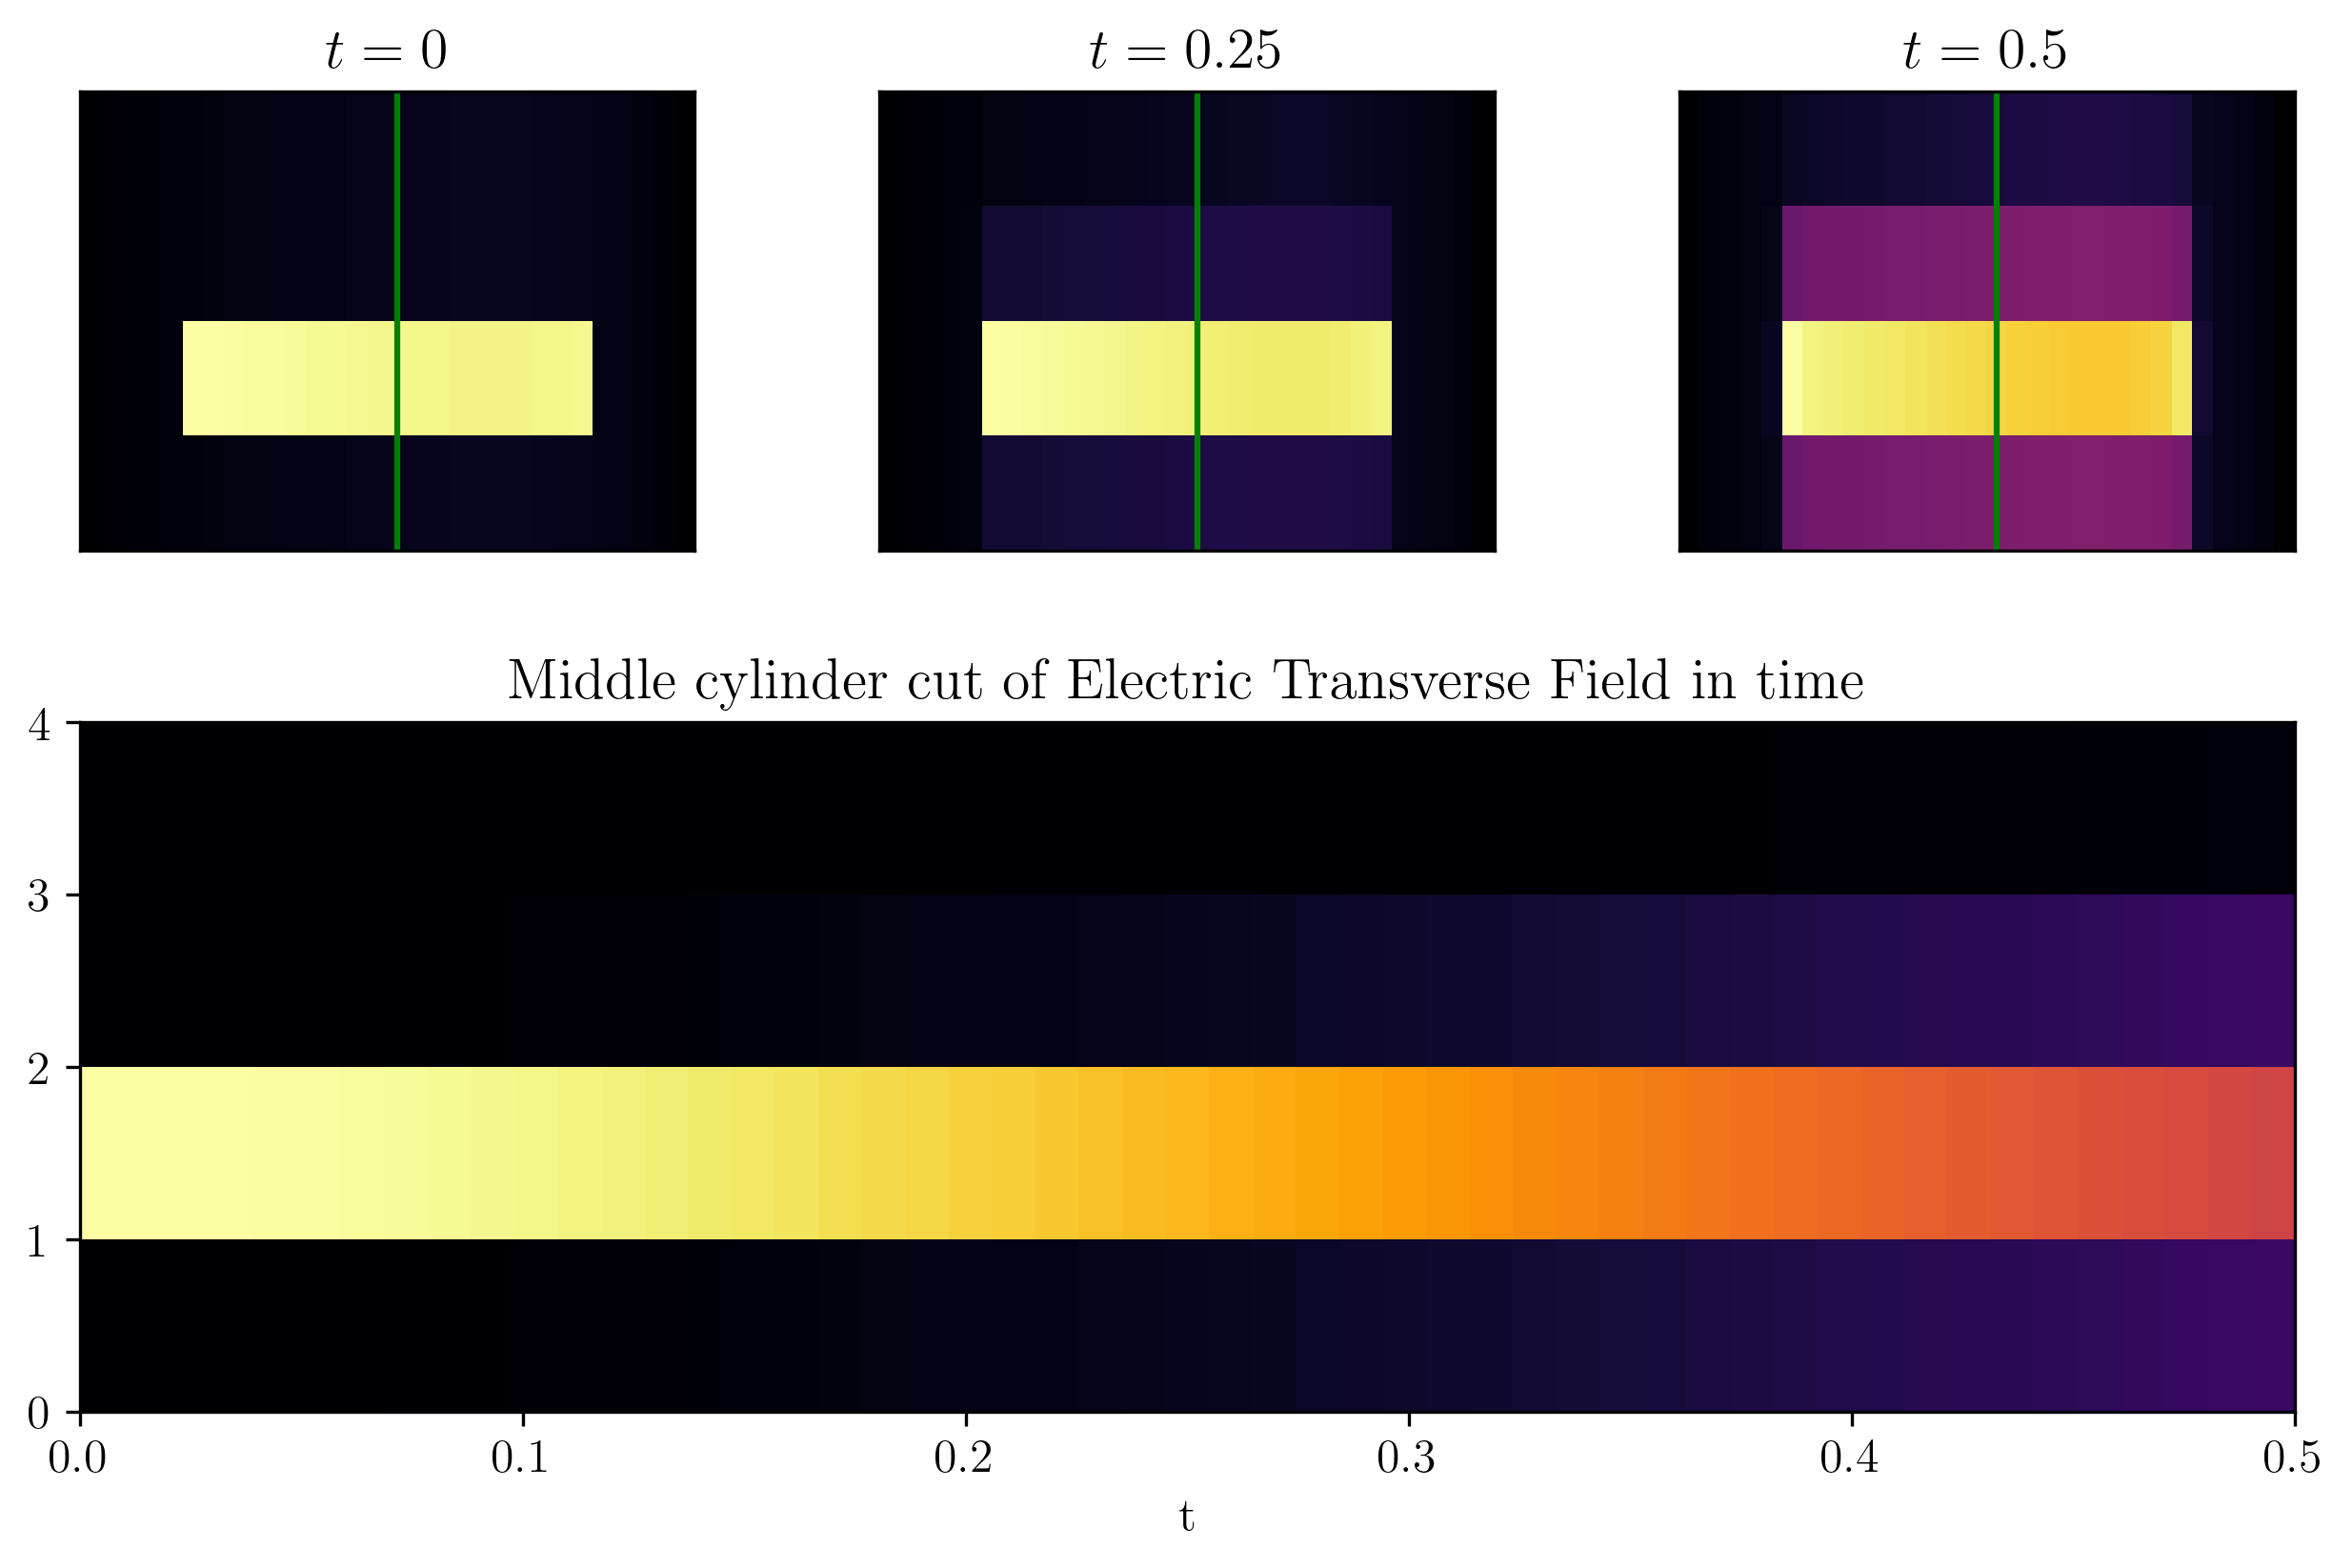

In [223]:
# fig, axs = plt.subplots(1,3, sharey=True)
# times = [0, 0.2, 0.5]
# steps = 50

# arr = [*range(-(l - 1)//2, l//2 + 1)]

# if (l%2) == 0:
#     arr.pop(0)
# print(arr)

# string_arr = [[(1-np.asarray(efields[i][0::2,1::2])[x])/2 for x in arr] for i in range(int(steps)+1)]

# for i, t in enumerate(times):
#     axs[i].set_title(f"$t= {times[i]}$")
#     axs[i].imshow(string_arr[int(t/delta)], aspect=5, cmap="inferno", vmin=0, vmax=1)

# plt.show()

# fig, axs = plt.subplots(1,3, sharey=True)

# string_arr = [[(1-np.asarray(efields[i])[x])/2 for x in arr] for i in range(int(steps)+1)]

# for i, t in enumerate(times):
#     axs[i].set_title(f"$t= {times[i]}$")
#     axs[i].imshow(string_arr[int(t/delta)], cmap="inferno", vmin=0, vmax=1)

# plt.show()

# fig, axs = plt.subplots(1,3, sharey=True)
# times = [0, 0.25, 0.5]

# arr = [*range(-(l - 1)//2, l//2 + 1)]

# if (l%2) == 0:
#     arr.pop(0)
# print(arr)

# string_arr = [[(1-np.asarray(elf[i][0::2,1::2])[x])/2 for x in arr] for i in range(int(steps*of)+1)]

# for i, t in enumerate(times):
#     axs[i].set_title(f"$t= {times[i]}$")
#     axs[i].imshow(string_arr[int(t/delta*of)], aspect=2, cmap="inferno", vmin=0, vmax=1) # vmin=0, vmax=1
#     axs[i].axvline(x=L//2, color='g', linewidth=2)
# plt.show()

# fig, ax = plt.subplots(1,1, sharey=True)

# string_arr = [[(1-np.asarray(elf[int(t/delta*of)][0::2,2*(L//2)+1])[x])/2 for x in arr] for t in times]

# ax.set_title("Middle cylinder cut of Electric Transverse Field in time")
# ax.set_xlabel(r"t")
# # ax.imshow(np.asarray(string_arr).T, cmap="inferno", aspect=3, norm=LogNorm())
# ax.imshow(np.asarray(string_arr).T, cmap="inferno", aspect=3, vmin=0, vmax=1)
# ax.set_xticks(np.array([0, 0.125, 0.250, 0.375, 0.50])/delta*of, [0, 0.125, 0.250, 0.375, 0.50])
# plt.show()

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Dummy data setup (replace with your actual data)
nx, ny = 30, 4  # grid size
times = [0, 0.25, 0.5]

arr = [*range(-(ny - 1)//2, ny//2 + 1)]
of = 1

if (ny%2) == 0:
    arr.pop(0)
print(arr)

data = [[(1-np.asarray(elf[int(t/delta*of)][0::2,1::2])[x])/2 for x in arr] for t in times]
cut_data = np.asarray([[(1-np.asarray(elf[i][0::2,2*(nx//2)+1])[x])/2 for x in arr] for i in range(int(steps*of)+1)]).T

# Create the figure and subplots
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.5], hspace=0.3)

# Top row: 3 snapshots
gs_top = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], wspace=0.3)
for i, (t, d) in enumerate(zip(times, data)):
    ax = fig.add_subplot(gs_top[i])
    im = ax.imshow(d, aspect='auto', origin='lower', cmap='inferno')
    ax.axvline(nx // 2, color='green')  # vertical cut line
    ax.set_title(rf"$t = {t}$")
    ax.set_xticks([])
    ax.set_yticks([])

# Bottom plot: evolution of the middle slice
ax_bottom = fig.add_subplot(gs[1])
im2 = ax_bottom.imshow(cut_data, aspect='auto', origin='lower',
                       extent=[times[0], times[-1], 0, ny], cmap='inferno')
ax_bottom.set_title("Middle cylinder cut of Electric Transverse Field in time")
ax_bottom.set_xlabel("t")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/fradm/Desktop/projects/1_Z2/results/entropy_data/15_bond_entropy_quench_dynamics_Z2_dual_direct_lattice_4x30_2_particle(s)_sector_bc_pbc_R_20_h_0.725-0.725_delta_0.01_trotter_steps_200_chi_128.npy'

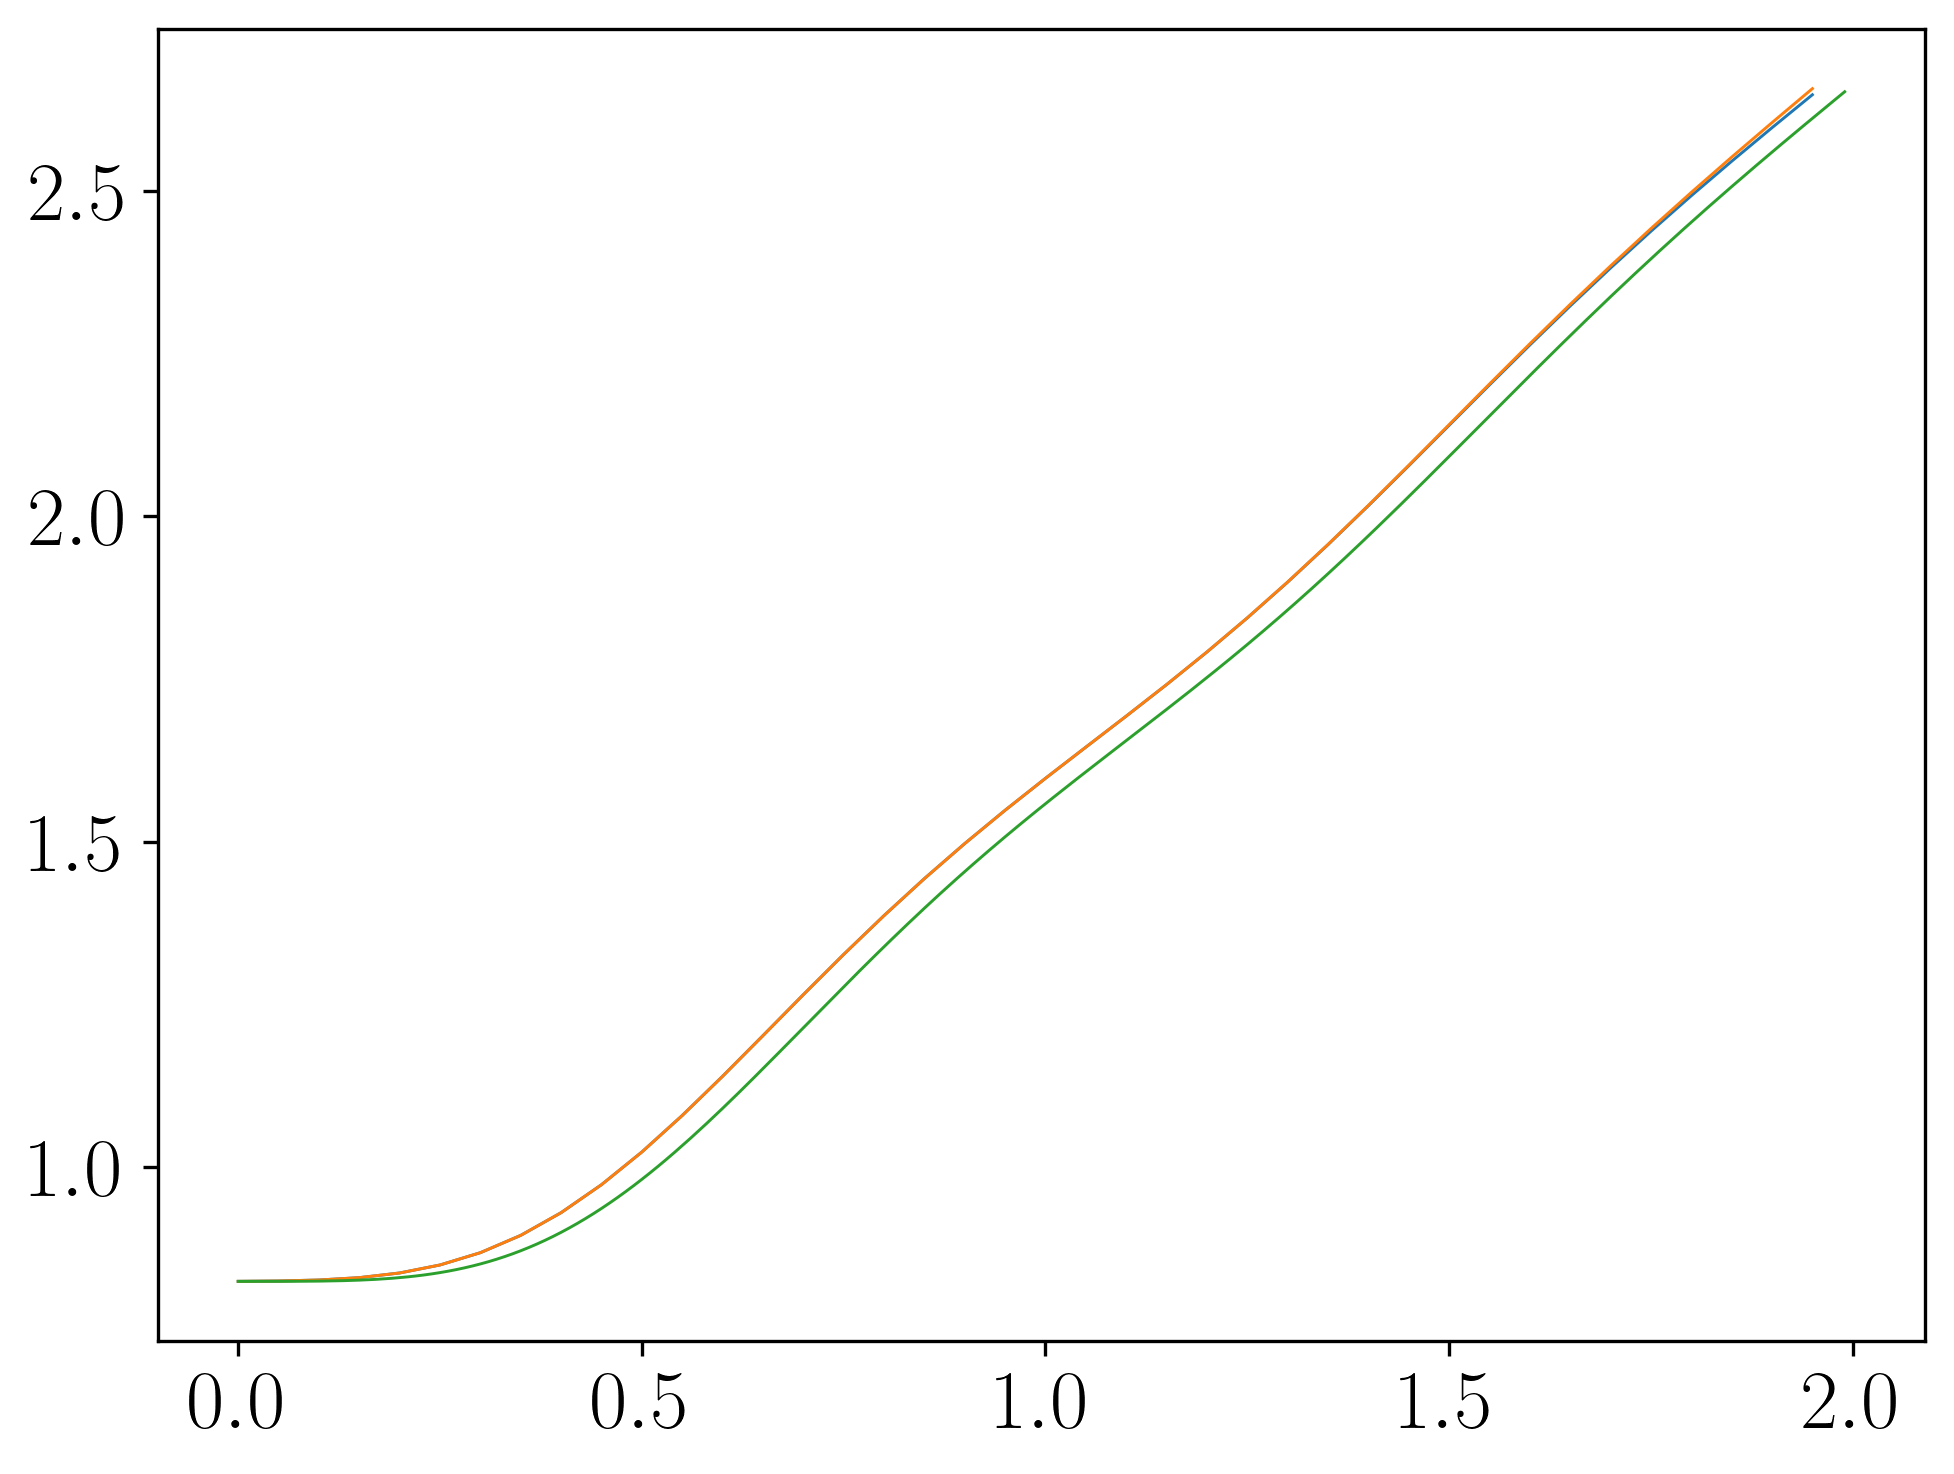

In [ ]:
chis = [64, 128]
deltas = [0.05, 0.01]
trotts = [20, 100, 200]
trotts = [40, 200, 400]
h_i, h_ev = 0.1, 0.1
h_i, h_ev = 0.725, 0.725
# h_i, h_ev = 2.0, 2.0
colors = create_sequential_colors(len(deltas))

for i, delta in enumerate(deltas):
    entropies = []
    label = f"$\\delta: {delta}$ $\\chi: {chis[-1]}$"
    for j, chi in enumerate(chis):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        entr_chi = np.load(
            f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{trotts[i]}_chi_{chi}.npy")
        plt.plot(delta*np.asarray(range(trotts[i])), entr_chi[1:], linestyle="-", linewidth=0.7, markersize=5, color=colors[i], alpha=0.2*(j+1), label=label if chi == chis[-1] else None)
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title("Entropy evolution for different $\\delta$")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend()

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/524126901.py:9: SyntaxWarning: invalid escape sequence '\c'
  label = f"$g: {h_ev}$ $\chi: {chis[-1]}$"


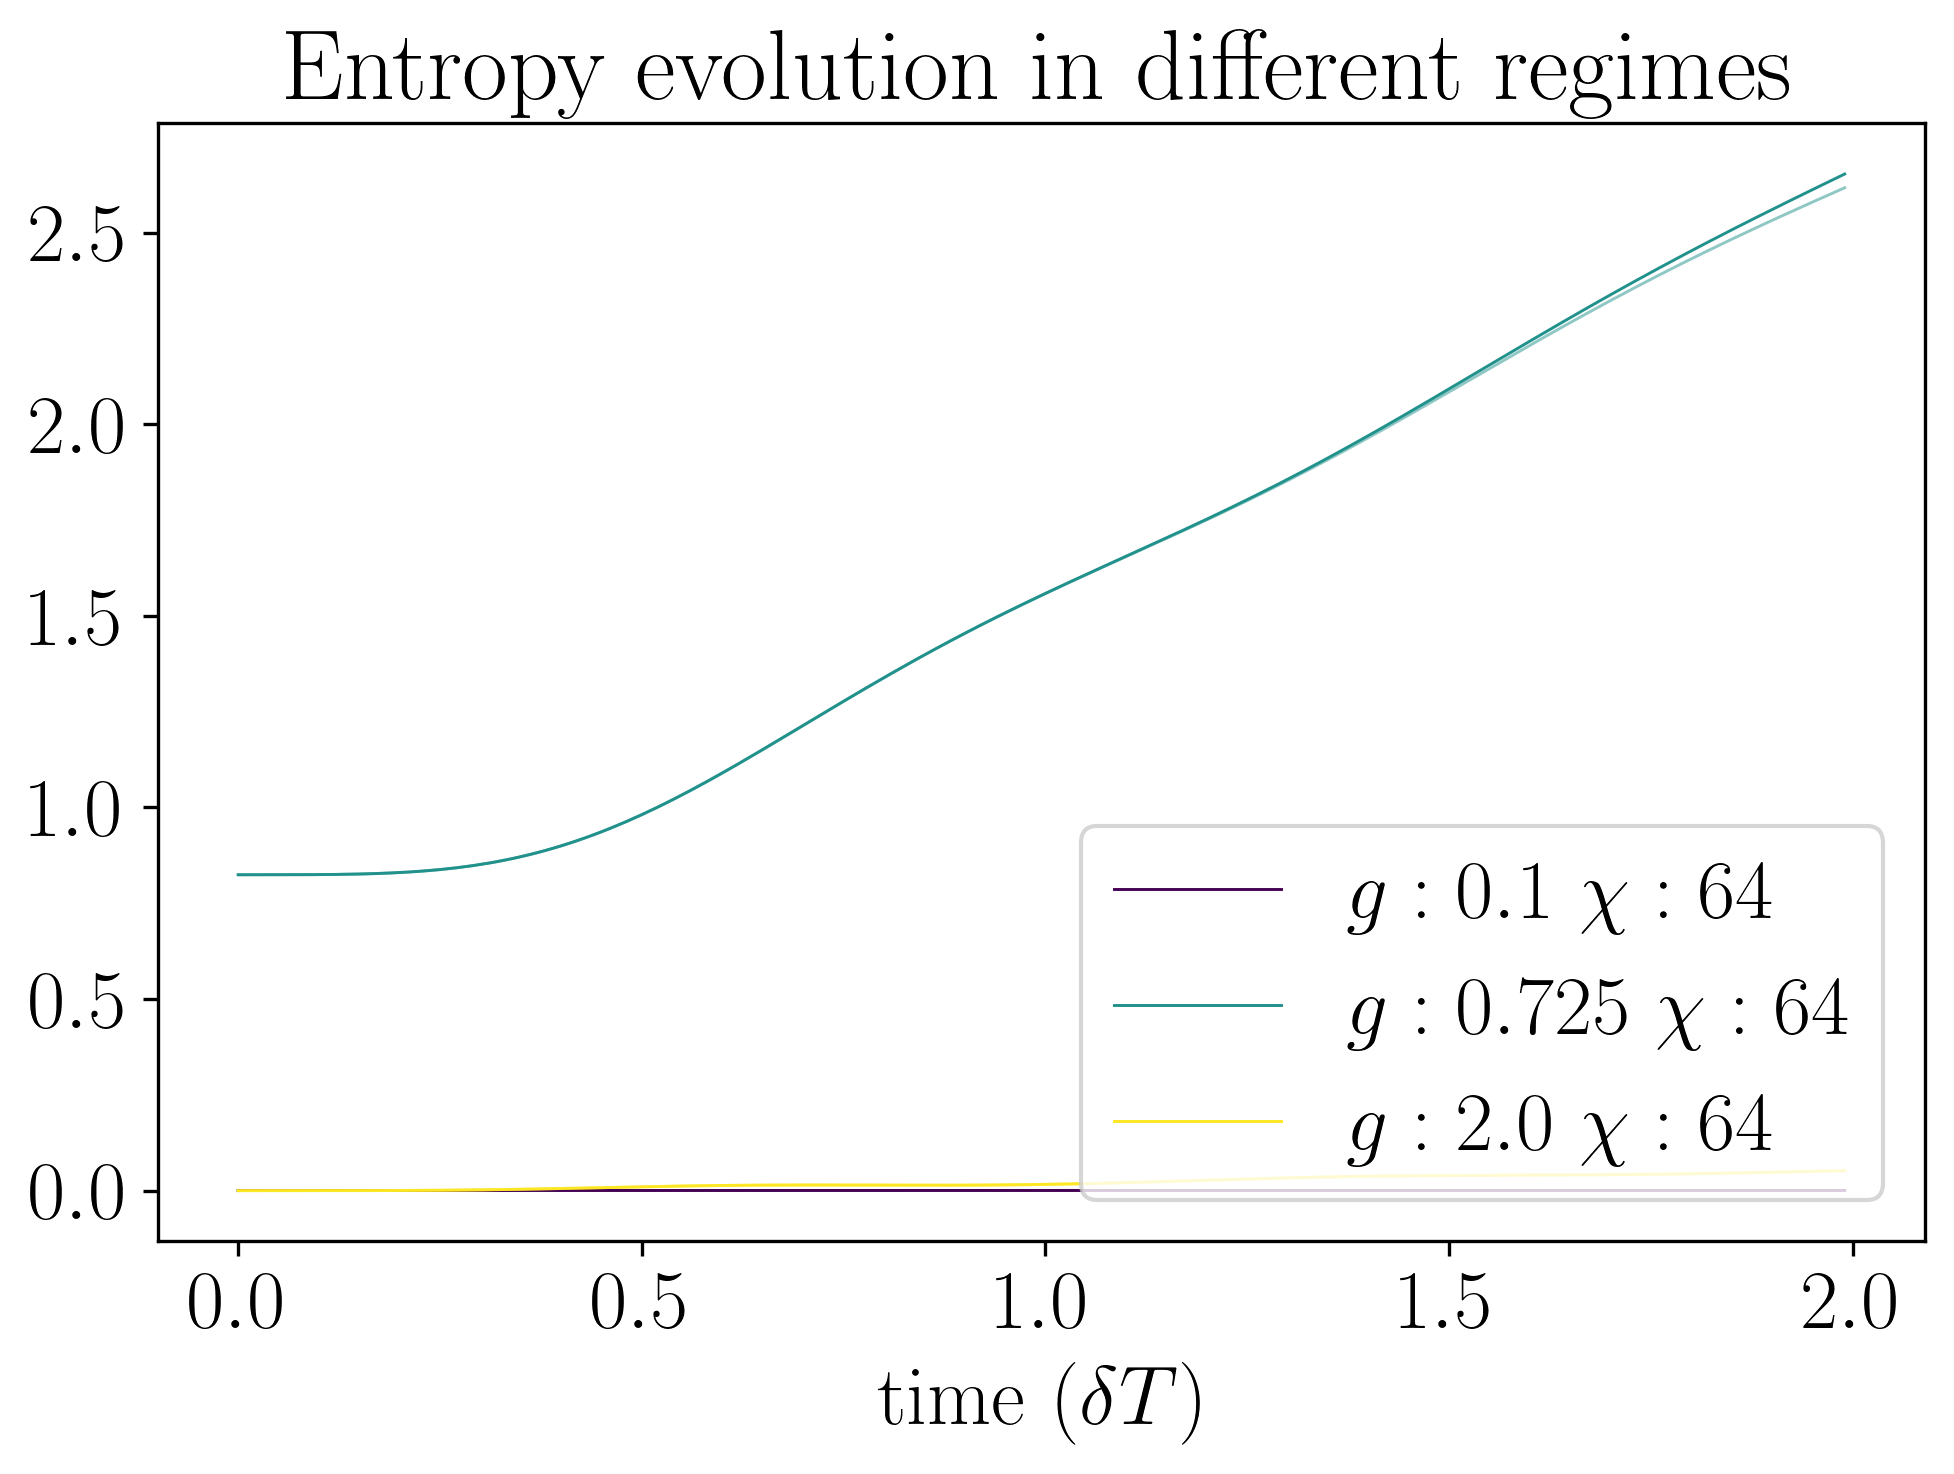

In [654]:
chis = [32, 64]
h_evs = [0.1, 0.725, 2.0]
delta, steps = 0.01, 200
colors = create_sequential_colors(len(h_evs))

for i, h_ev in enumerate(h_evs):
    h_i = h_ev
    entropies = []
    label = f"$g: {h_ev}$ $\chi: {chis[-1]}$"
    for j, chi in enumerate(chis):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        entr_chi = np.load(
            f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        plt.plot(delta*np.asarray(range(steps)), entr_chi[1:], linestyle="-", linewidth=0.7, markersize=5, color=colors[i], alpha=0.5*(j+1), label=label if chi == chis[-1] else None)
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title("Entropy evolution in different regimes")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend(loc="lower right")

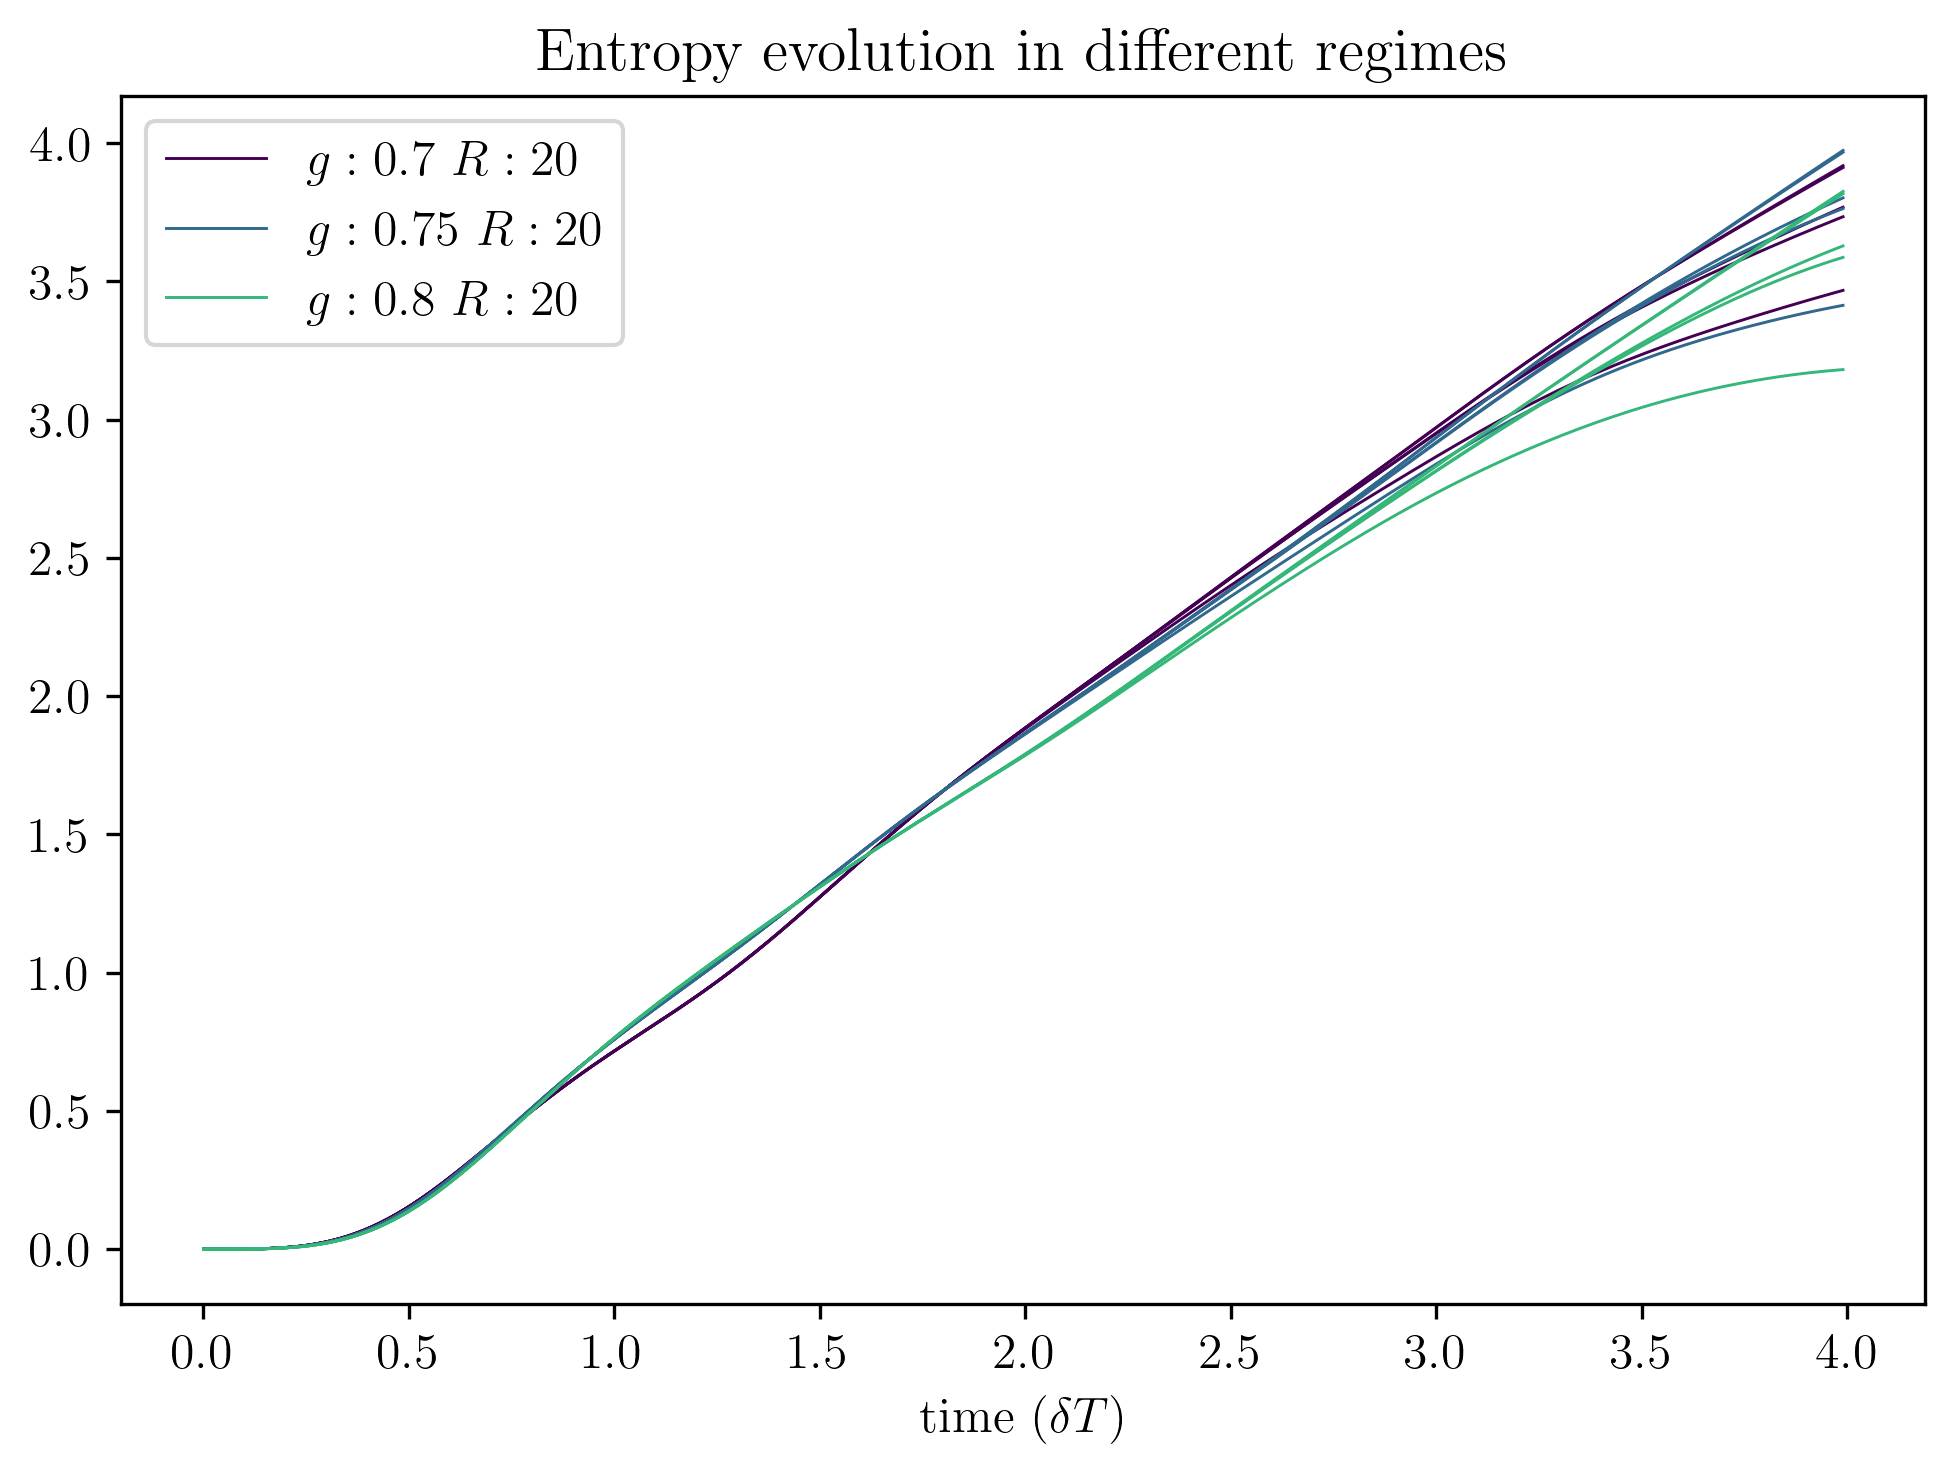

In [17]:
chi = 128
Rs = [10,11,12,15,20]
h_evs = [0.7,0.75,0.8]
delta, steps = 0.01, 400
colors = create_sequential_colors(colormap_name="viridis", num_colors=len(h_evs)+1)
# colors = create_sequential_colors(len(Rs))

for i, h_ev in enumerate(h_evs):
    h_i = h_ev
    entropies = []
    label = f"$g: {h_ev}$ $R: {Rs[-1]}$"
    # label = None
    for j, R in enumerate(Rs):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        entr_chi = np.load(
            f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        plt.plot(delta*np.asarray(range(steps)), entr_chi[1:]-entr_chi[1], linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=label if R == Rs[-1] else None)
        entropies.append(entr_chi[1:]-entr_chi[1])

plt.title("Entropy evolution in different regimes")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_31100/3473231436.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(delta*np.asarray(range(steps)), (entropies[-1] - entropies[i]), linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=f"$\Delta R: {Rs[-1]} - {Rs[i]}$")


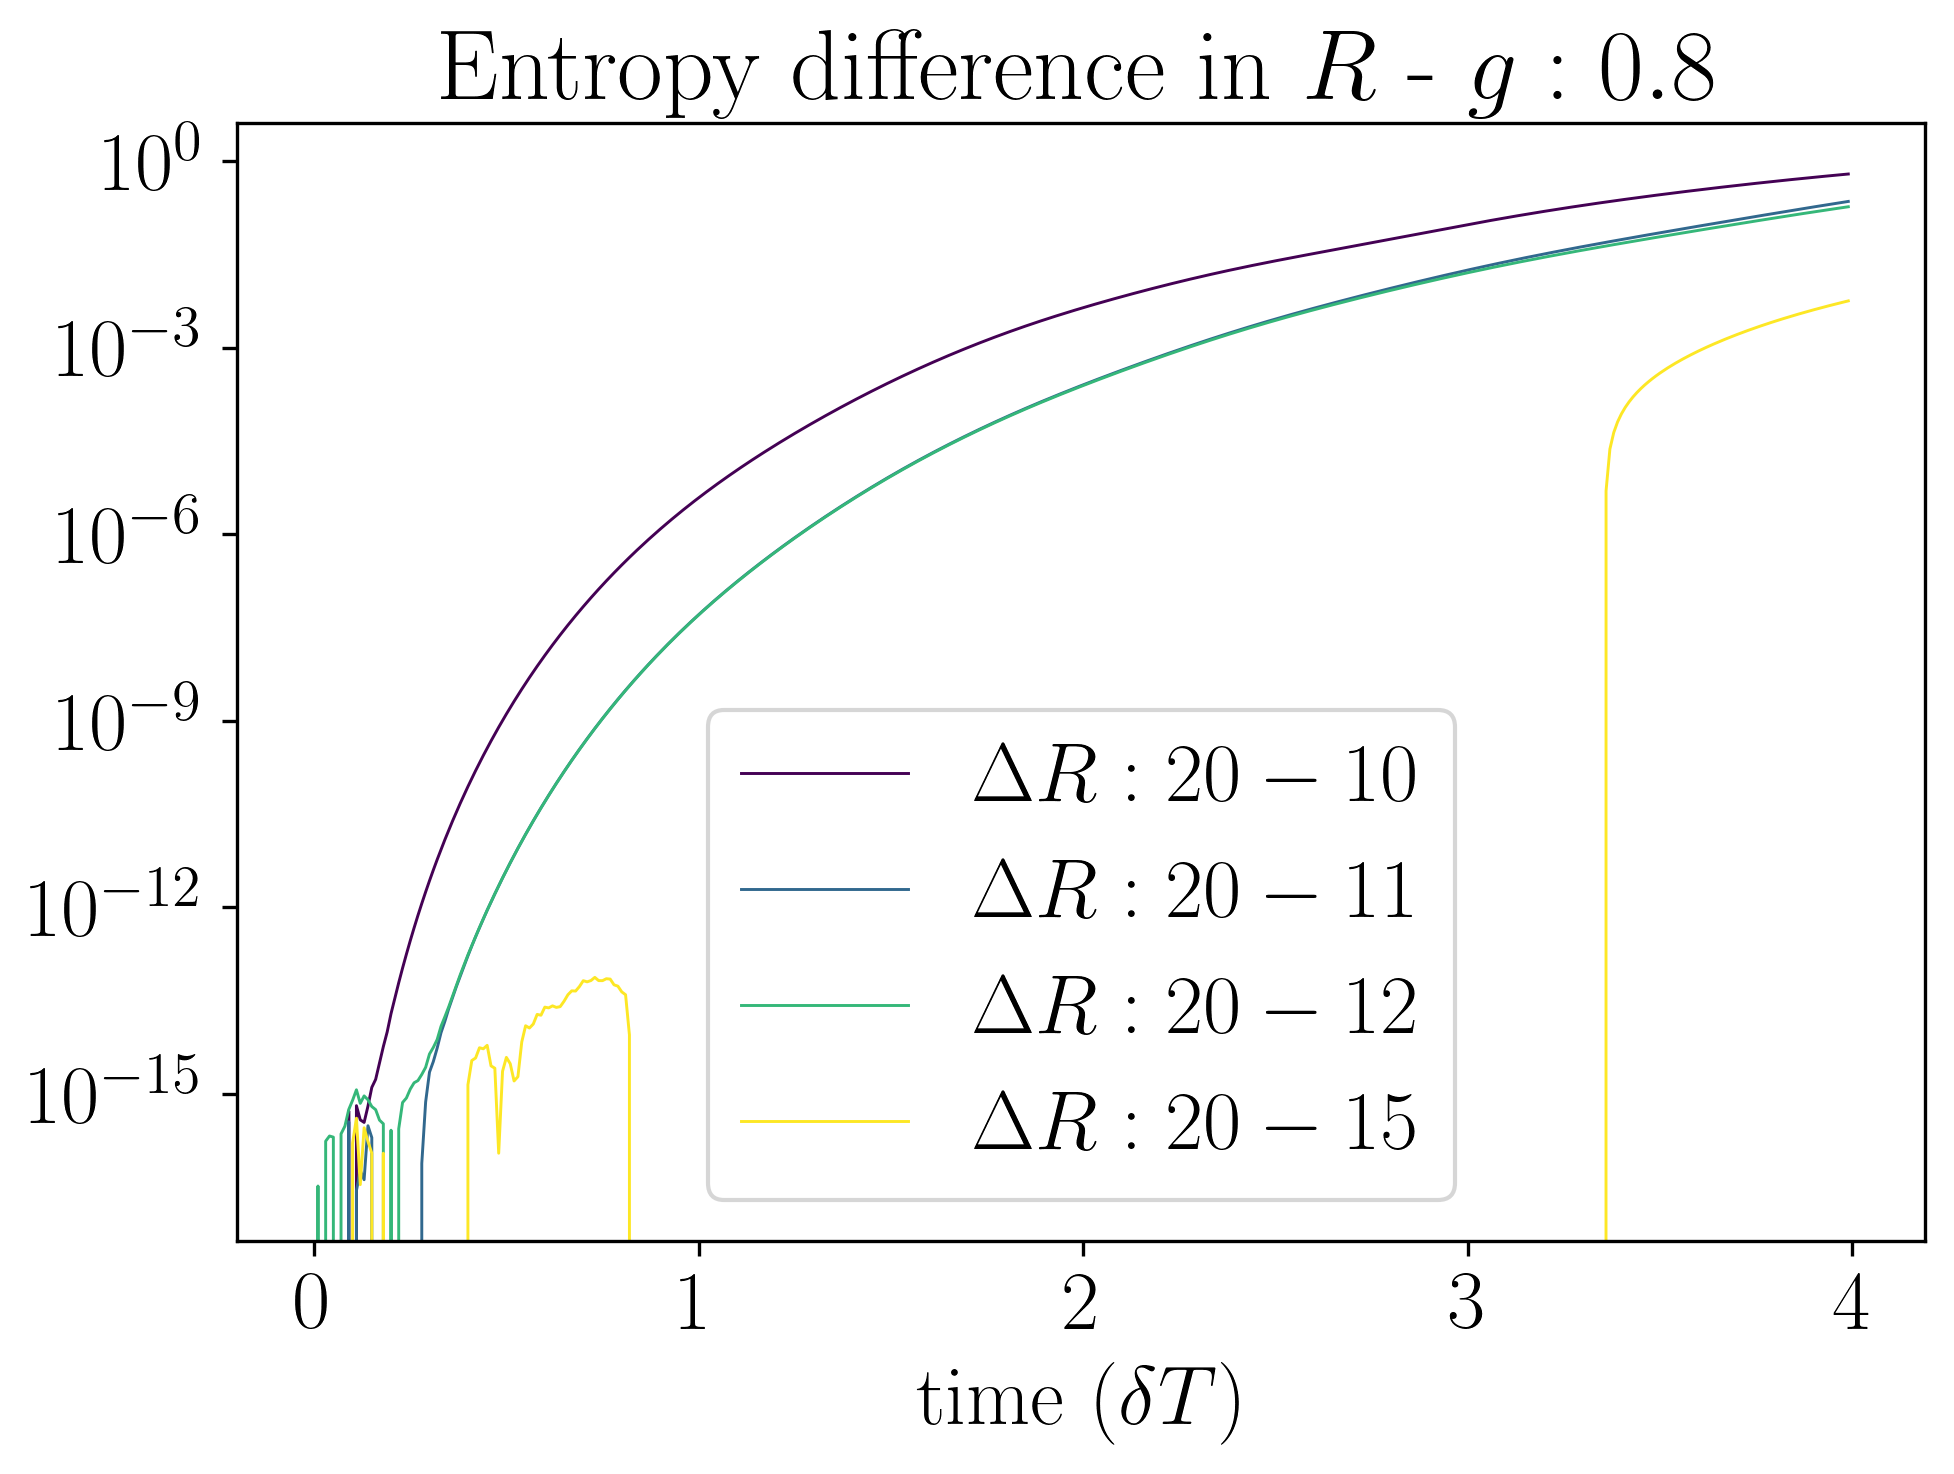

In [91]:
colors = create_sequential_colors(len(Rs)-1)

for i in range(len(entropies)-1):    
    plt.plot(delta*np.asarray(range(steps)), (entropies[-1] - entropies[i]), linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=f"$\Delta R: {Rs[-1]} - {Rs[i]}$")
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title(f"Entropy difference in $R$ - $g: {h_ev}$")
plt.xlabel("time $(\\delta T)$")
plt.yscale("log")
plt.legend()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/867062452.py:10: SyntaxWarning: invalid escape sequence '\c'
  label = f"$l: {l}$ $\chi: {chi}$"


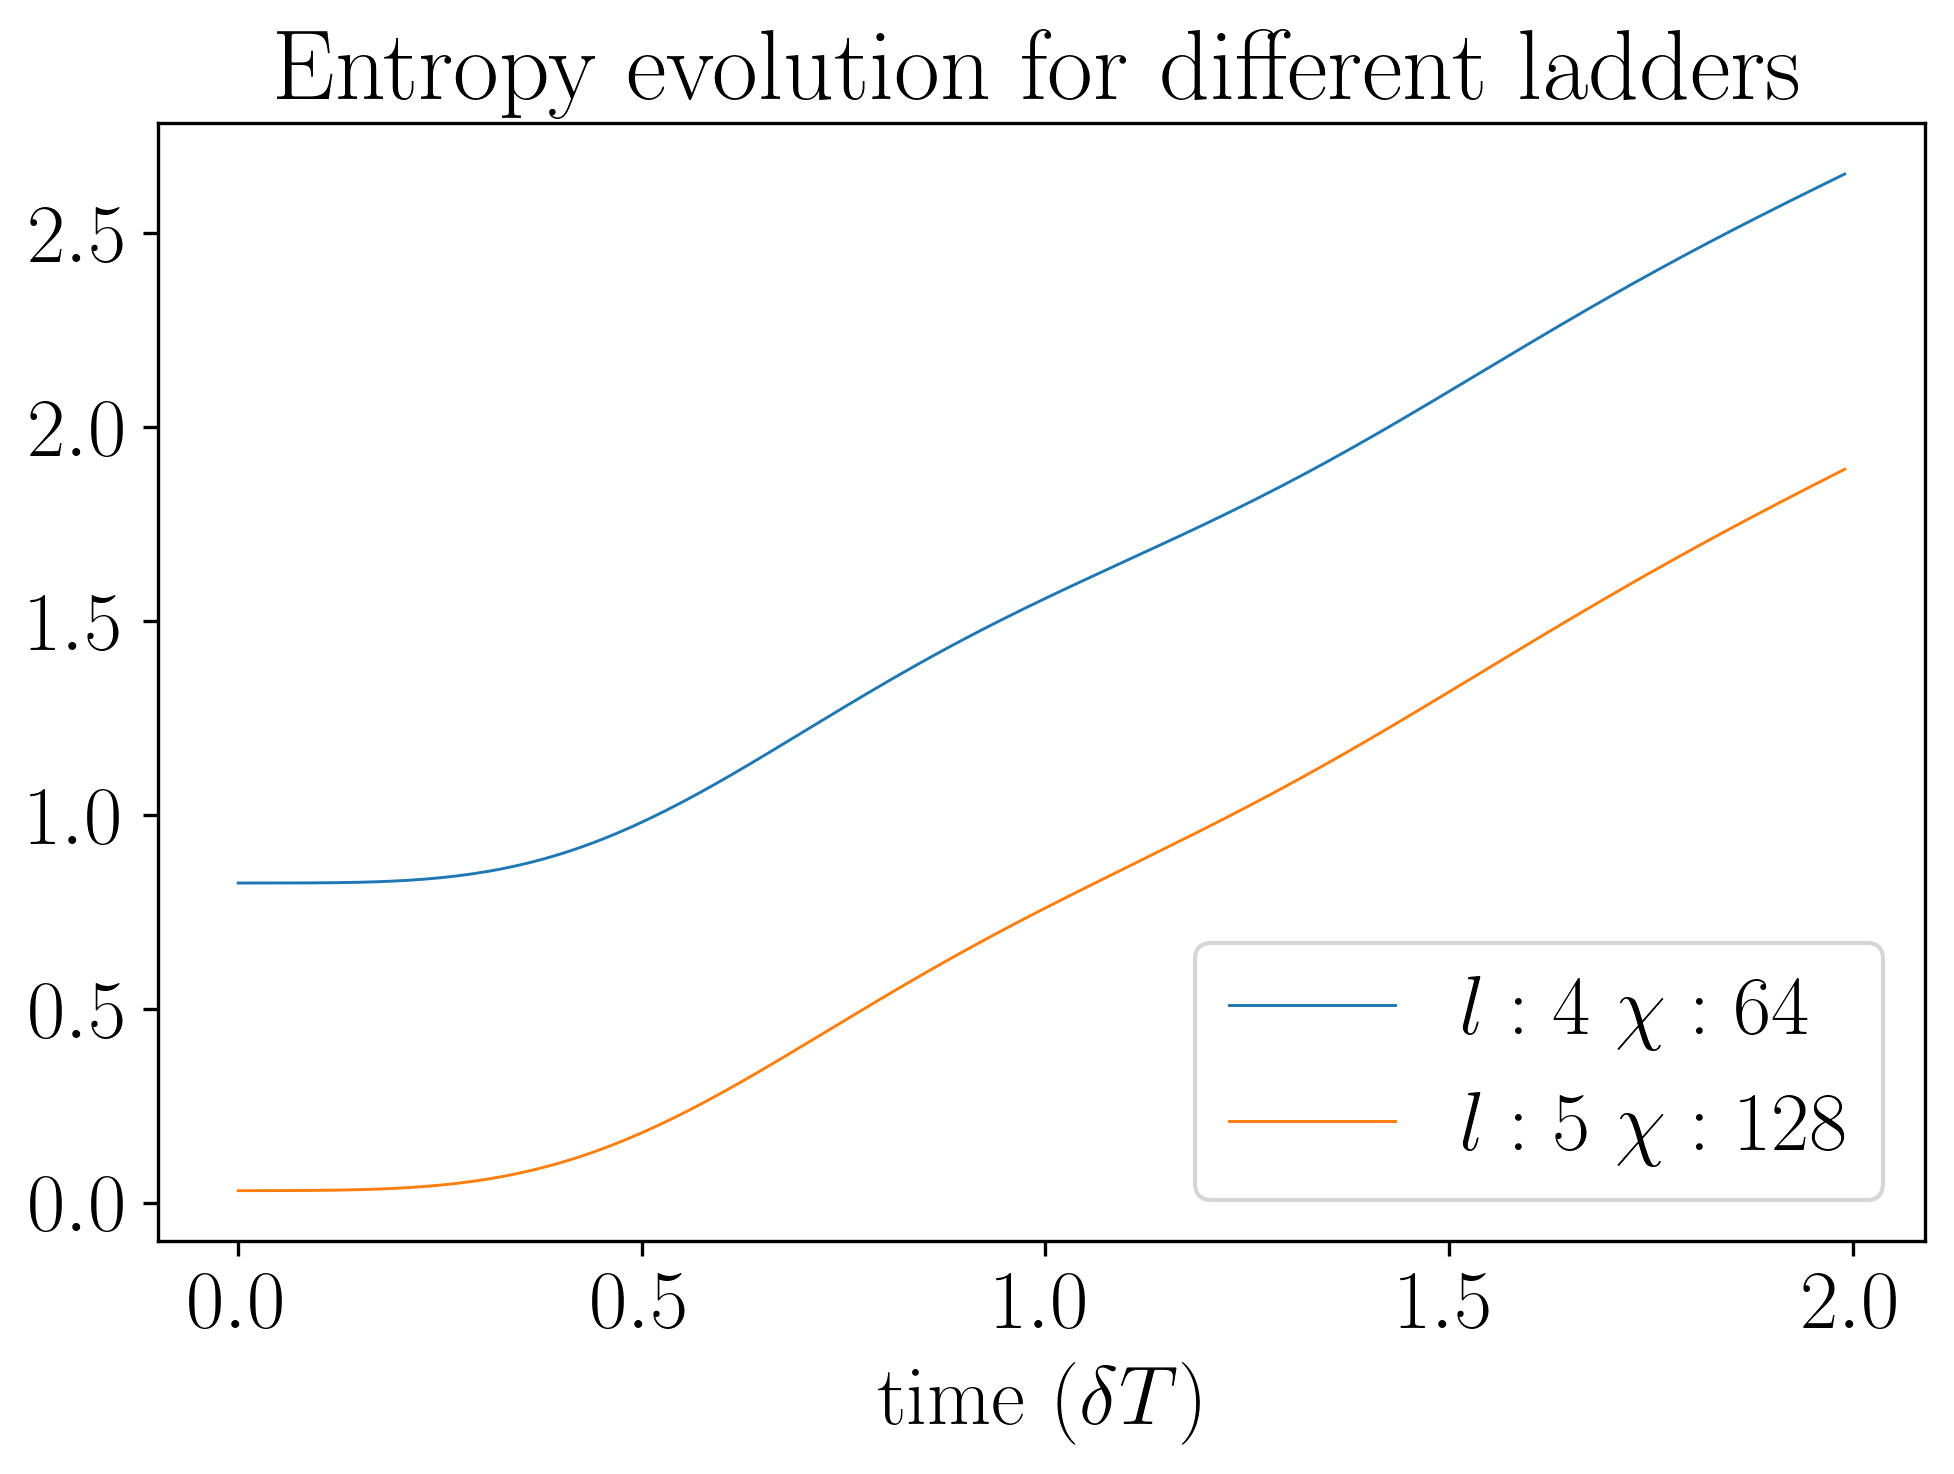

In [735]:
chis = [64,128]
ls = [4,5]
h_ev = 0.725
delta, steps = 0.01, 200
colors = create_sequential_colors(len(ls))

for l, chi in zip(ls, chis):
    h_i = h_ev
    entropies = []
    label = f"$l: {l}$ $\chi: {chi}$"
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entr_chi = np.load(
        f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    plt.plot(delta*np.asarray(range(steps)), entr_chi[1:], linestyle="-", linewidth=0.7, markersize=5, label=label)
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title("Entropy evolution for different ladders")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend(loc="lower right")

## Schmidt Values

In [ ]:
smvals = []
for chi in chis:
    # sv_chi = load_list_of_lists(
    #     f"{path_tensor}/results/entropy_data/{L//2}_schmidt_vals_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    sv_chi = load_list_of_lists(
        f"{path_tensor}/results/entropy_data/{where}_schmidt_vals_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    print(len(sv_chi), len(sv_chi[0]))
    smvals.append(sv_chi)
smvals.reverse()
chis.reverse()

In [ ]:
colors = create_sequential_colors(len(chis))
index = -1
plt.title(f"Schmidt values decay - $t: {delta*(range(steps)[index]+1)}$")
for i, sv in enumerate(smvals):
    plt.plot(sv[index], marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("schmidt values")
plt.yscale("log")
plt.legend()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/4031594994.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps)), arr, marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")


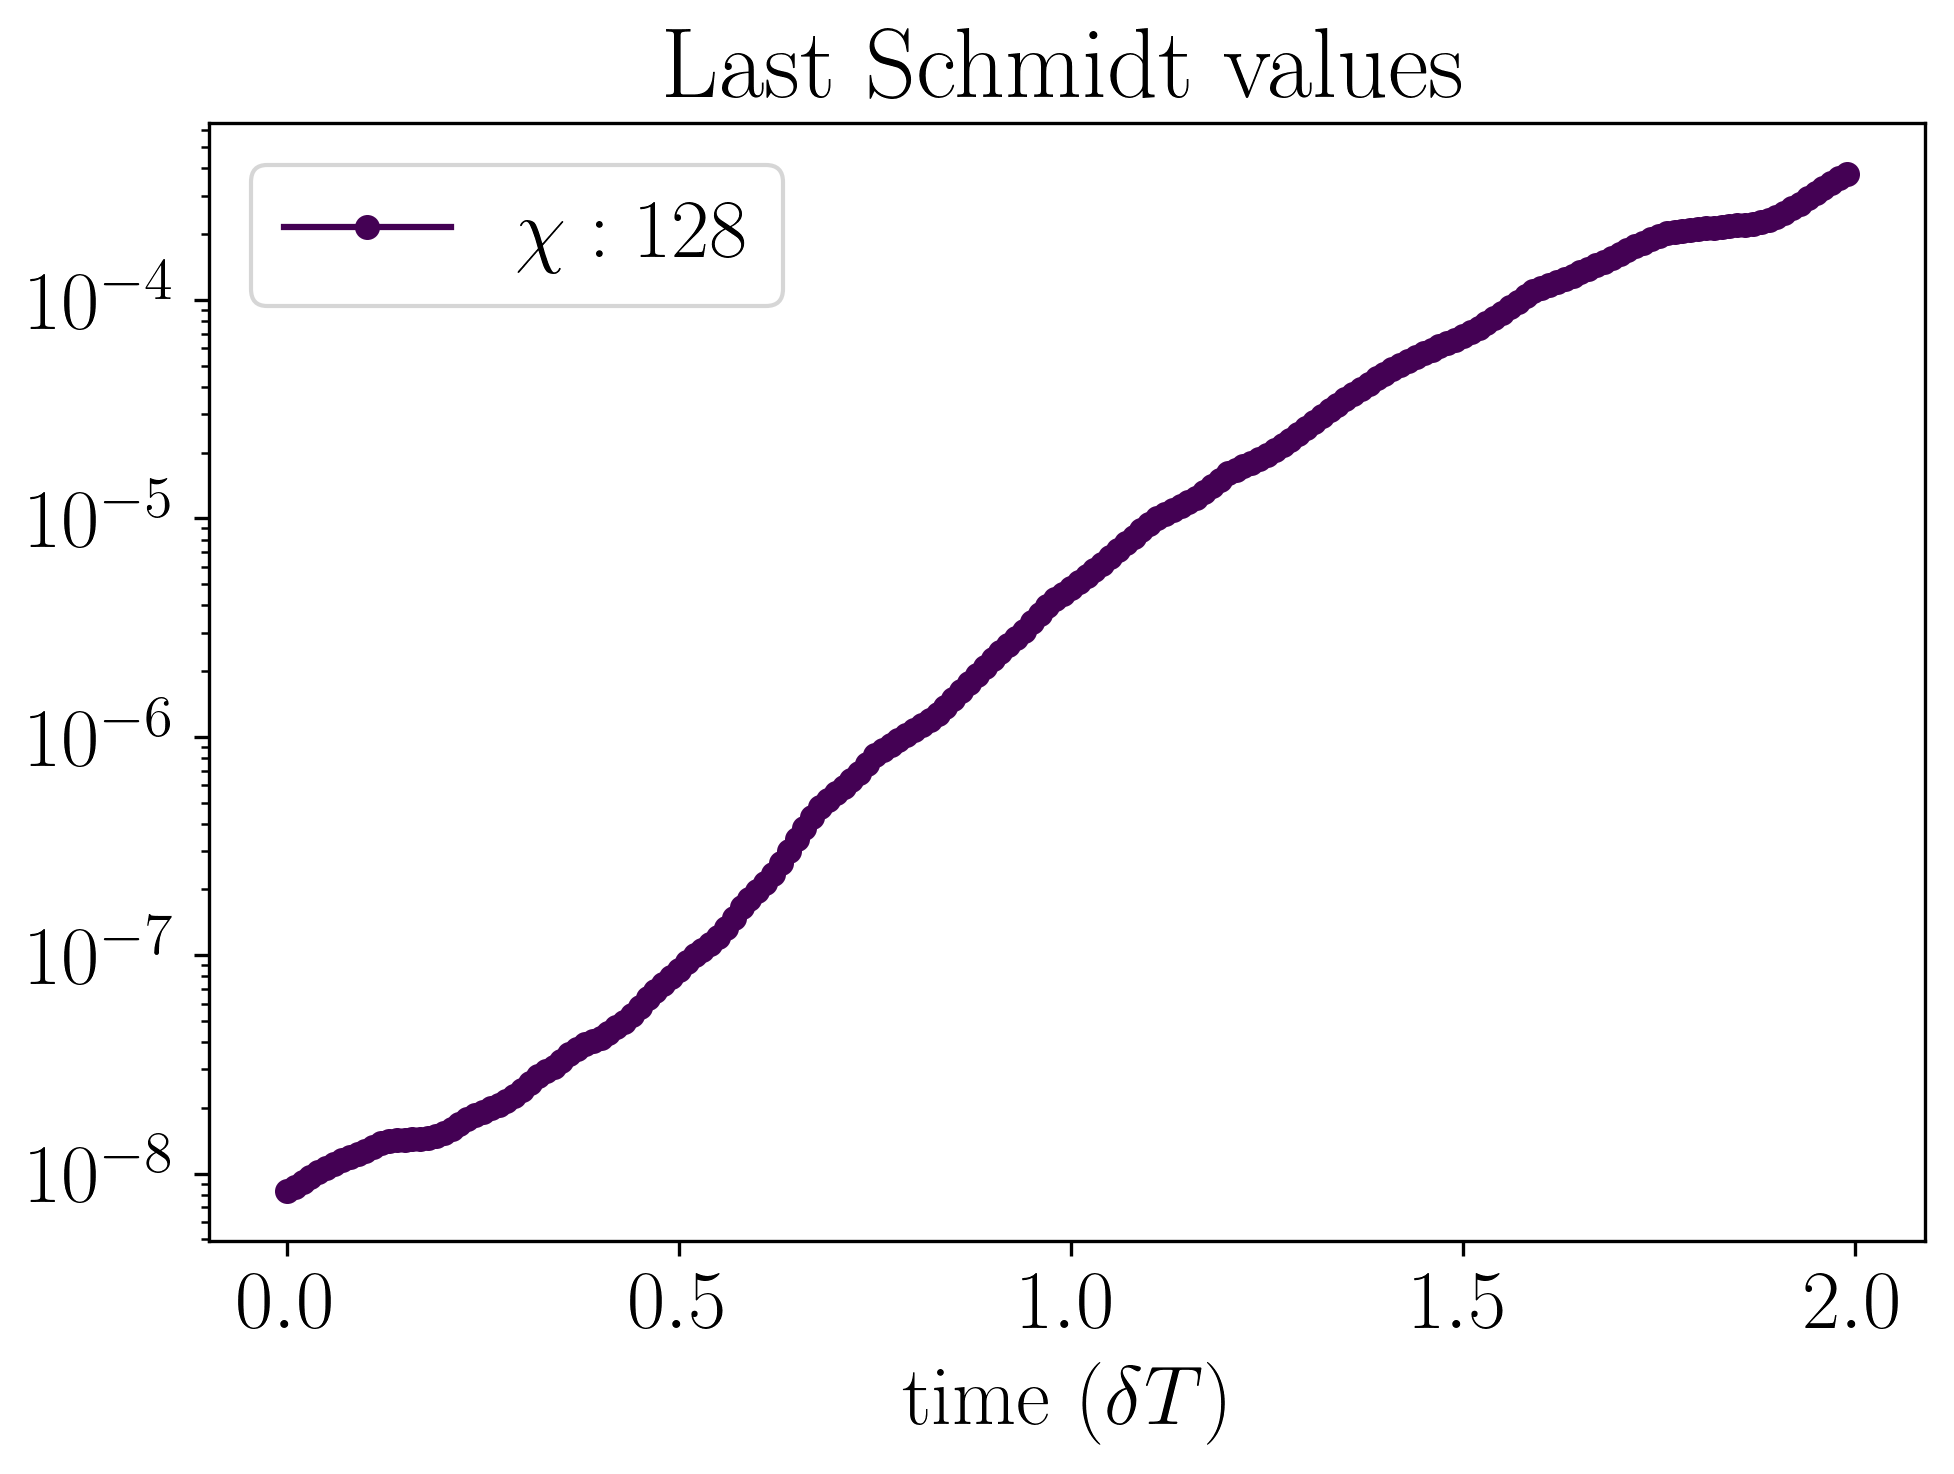

In [698]:
colors = create_sequential_colors(len(chis))
index = -1
plt.title(f"Last Schmidt values")
for i, sv in enumerate(smvals):
    arr = []
    for val in sv:
        arr.append(val[-1])
    plt.plot(delta*np.asarray(range(steps)), arr, marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.yscale("log")
plt.legend()

In [27]:
chis.reverse()

## Loschmidt amplitudes

In [700]:
losch = []
for chi in chis:
    losch_chi = np.load(
        f"{path_tensor}/results/overlap/loschmidt_amplitudes_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    losch.append(losch_chi)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/12930034.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Loschmidt Echo $\mathcal{L}(t)$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/12930034.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/12930034.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], lines

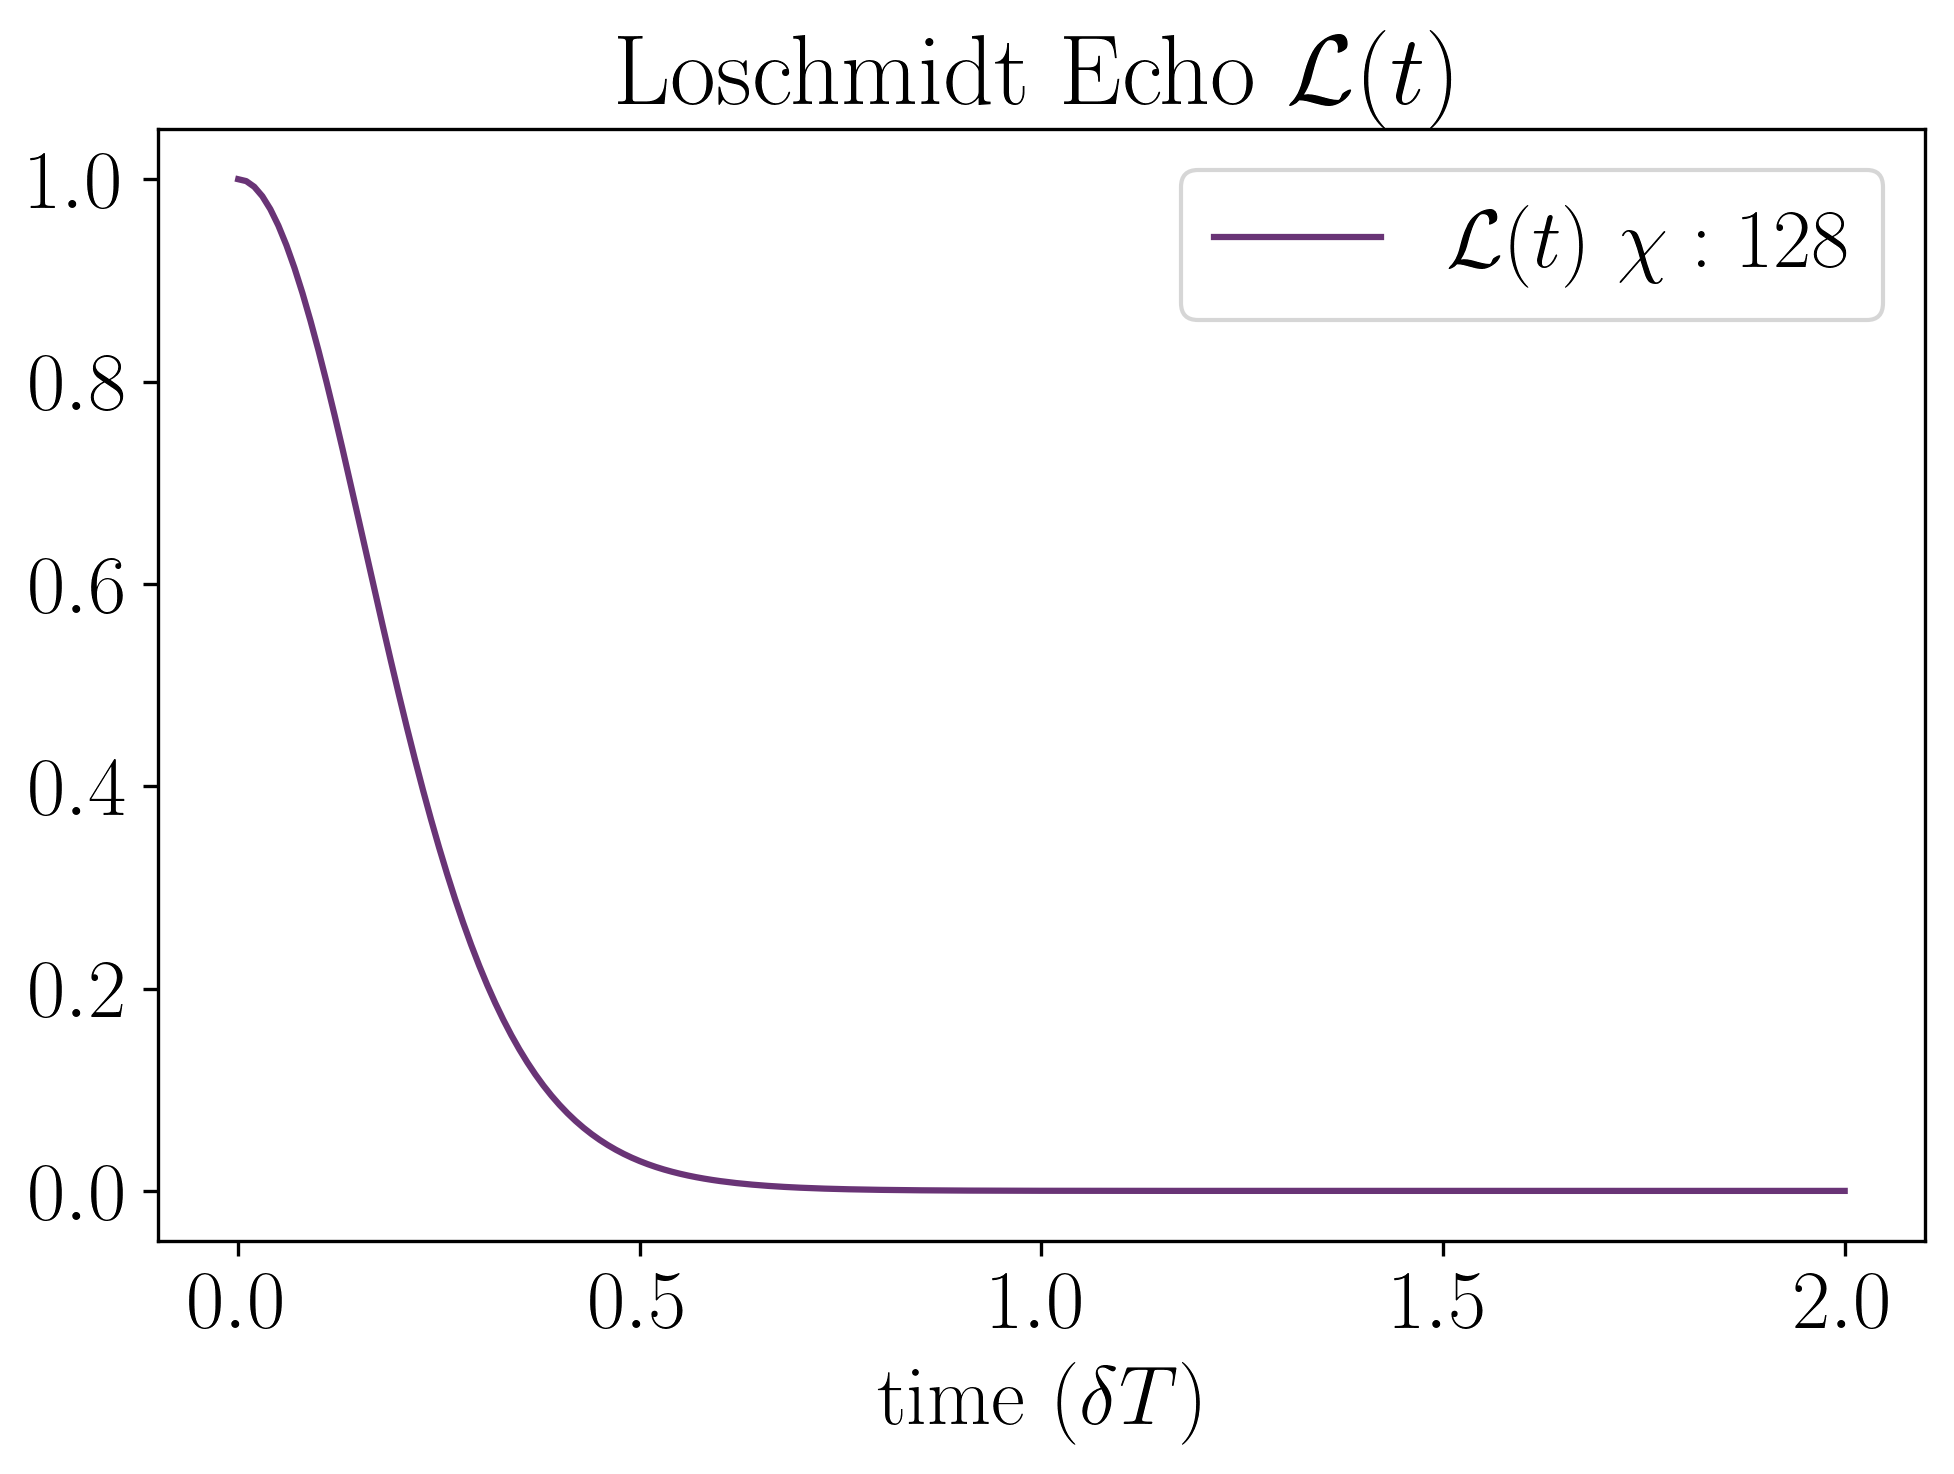

In [701]:
colors = create_sequential_colors(len(chis))
plt.title("Loschmidt Echo $\mathcal{L}(t)$")
for i, losch_amp in enumerate(losch):
    plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\I'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\I'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/3774349927.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Loschmidt Amplitude $\mathcal{G}(t)$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/3774349927.py:6: SyntaxWarning: invalid escape sequence '\R'
  plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
/var/folder

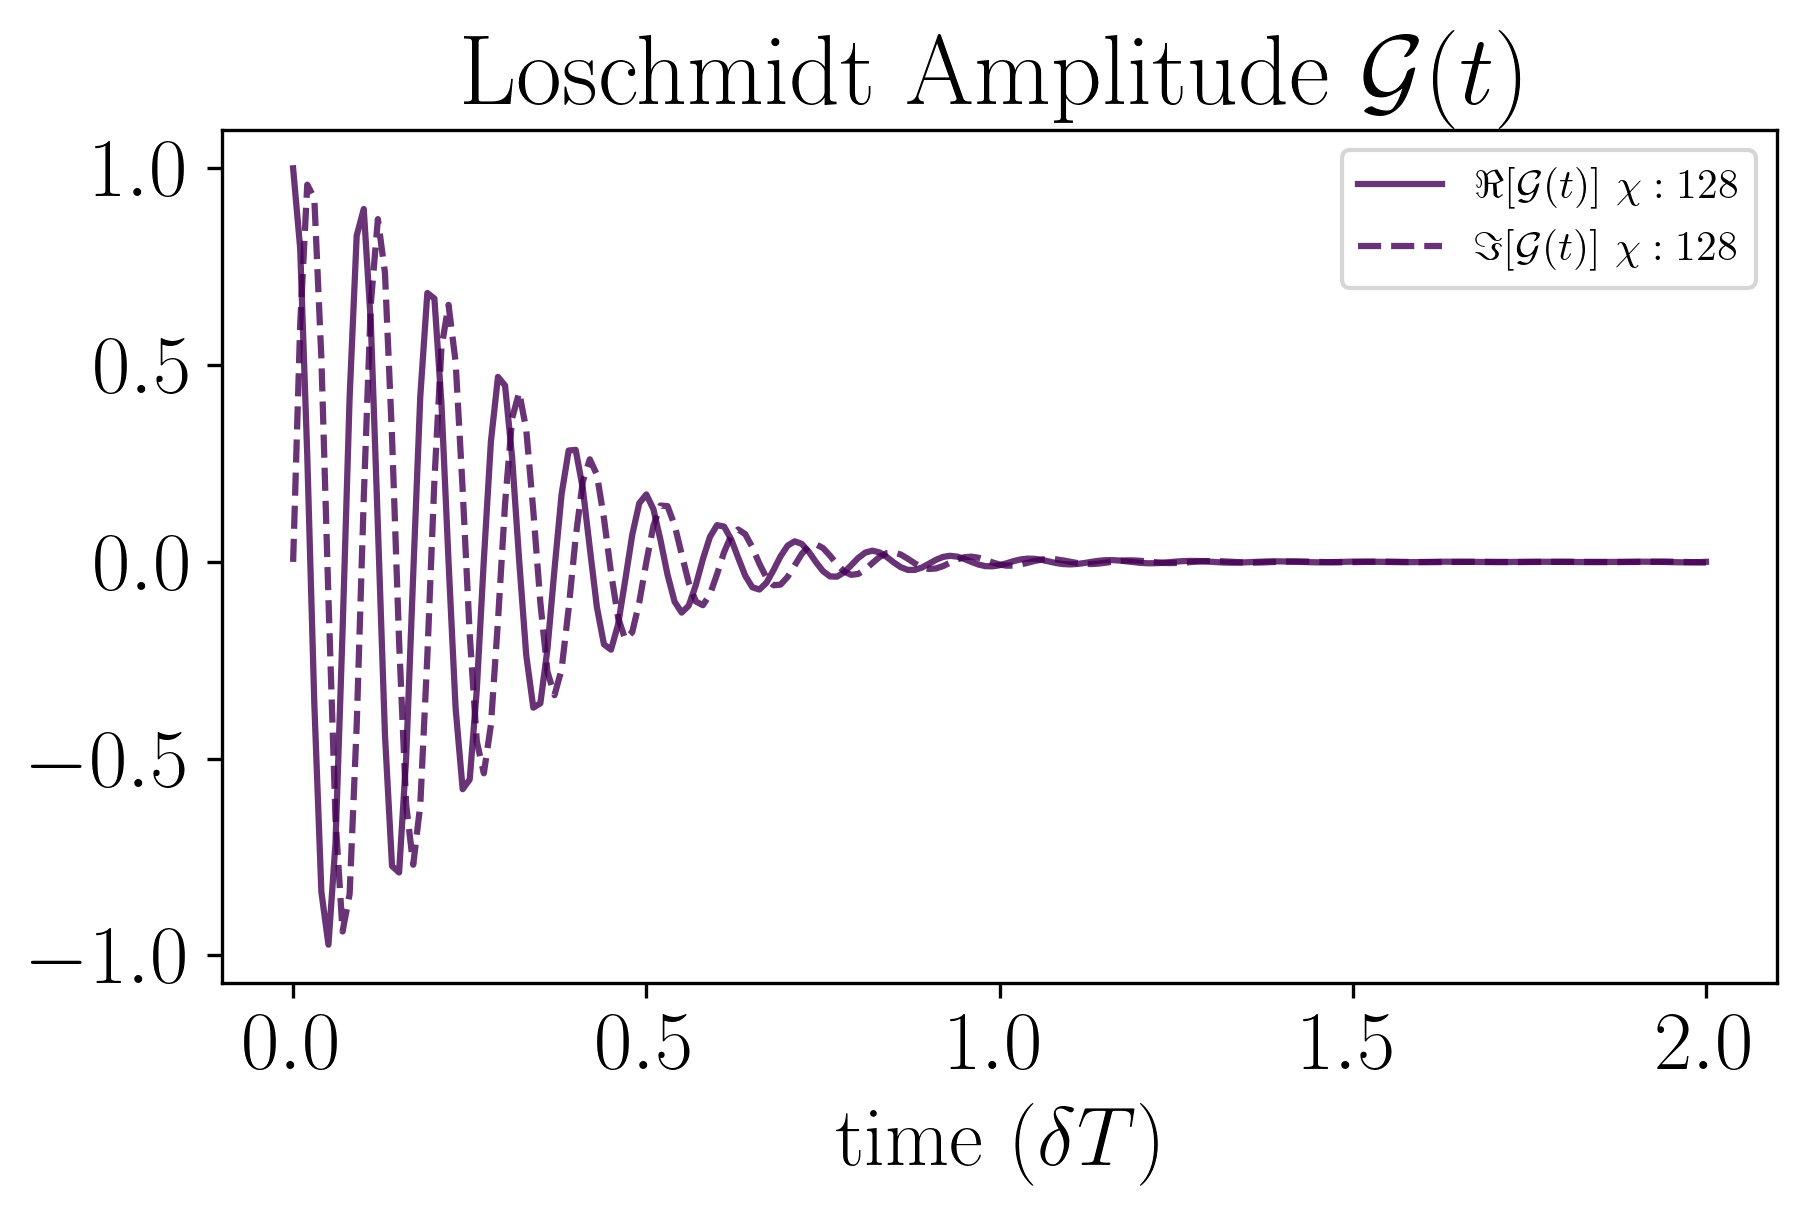

In [702]:
colors = create_sequential_colors(len(chis))
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(15*cm, 10*cm))
plt.title("Loschmidt Amplitude $\mathcal{G}(t)$")
for i, losch_amp in enumerate(losch):
    plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
    plt.plot(delta*np.asarray(range(steps+1)), [ov.imag for ov in losch_amp], linestyle="--", markersize=5, alpha=0.8, color=colors[i], label=f"$\Im[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2429821501.py:2: SyntaxWarning: invalid escape sequence '\R'
  plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch[-1]], linestyle="-", markersize=5, alpha=0.8, color="C1", label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2429821501.py:2: SyntaxWarnin

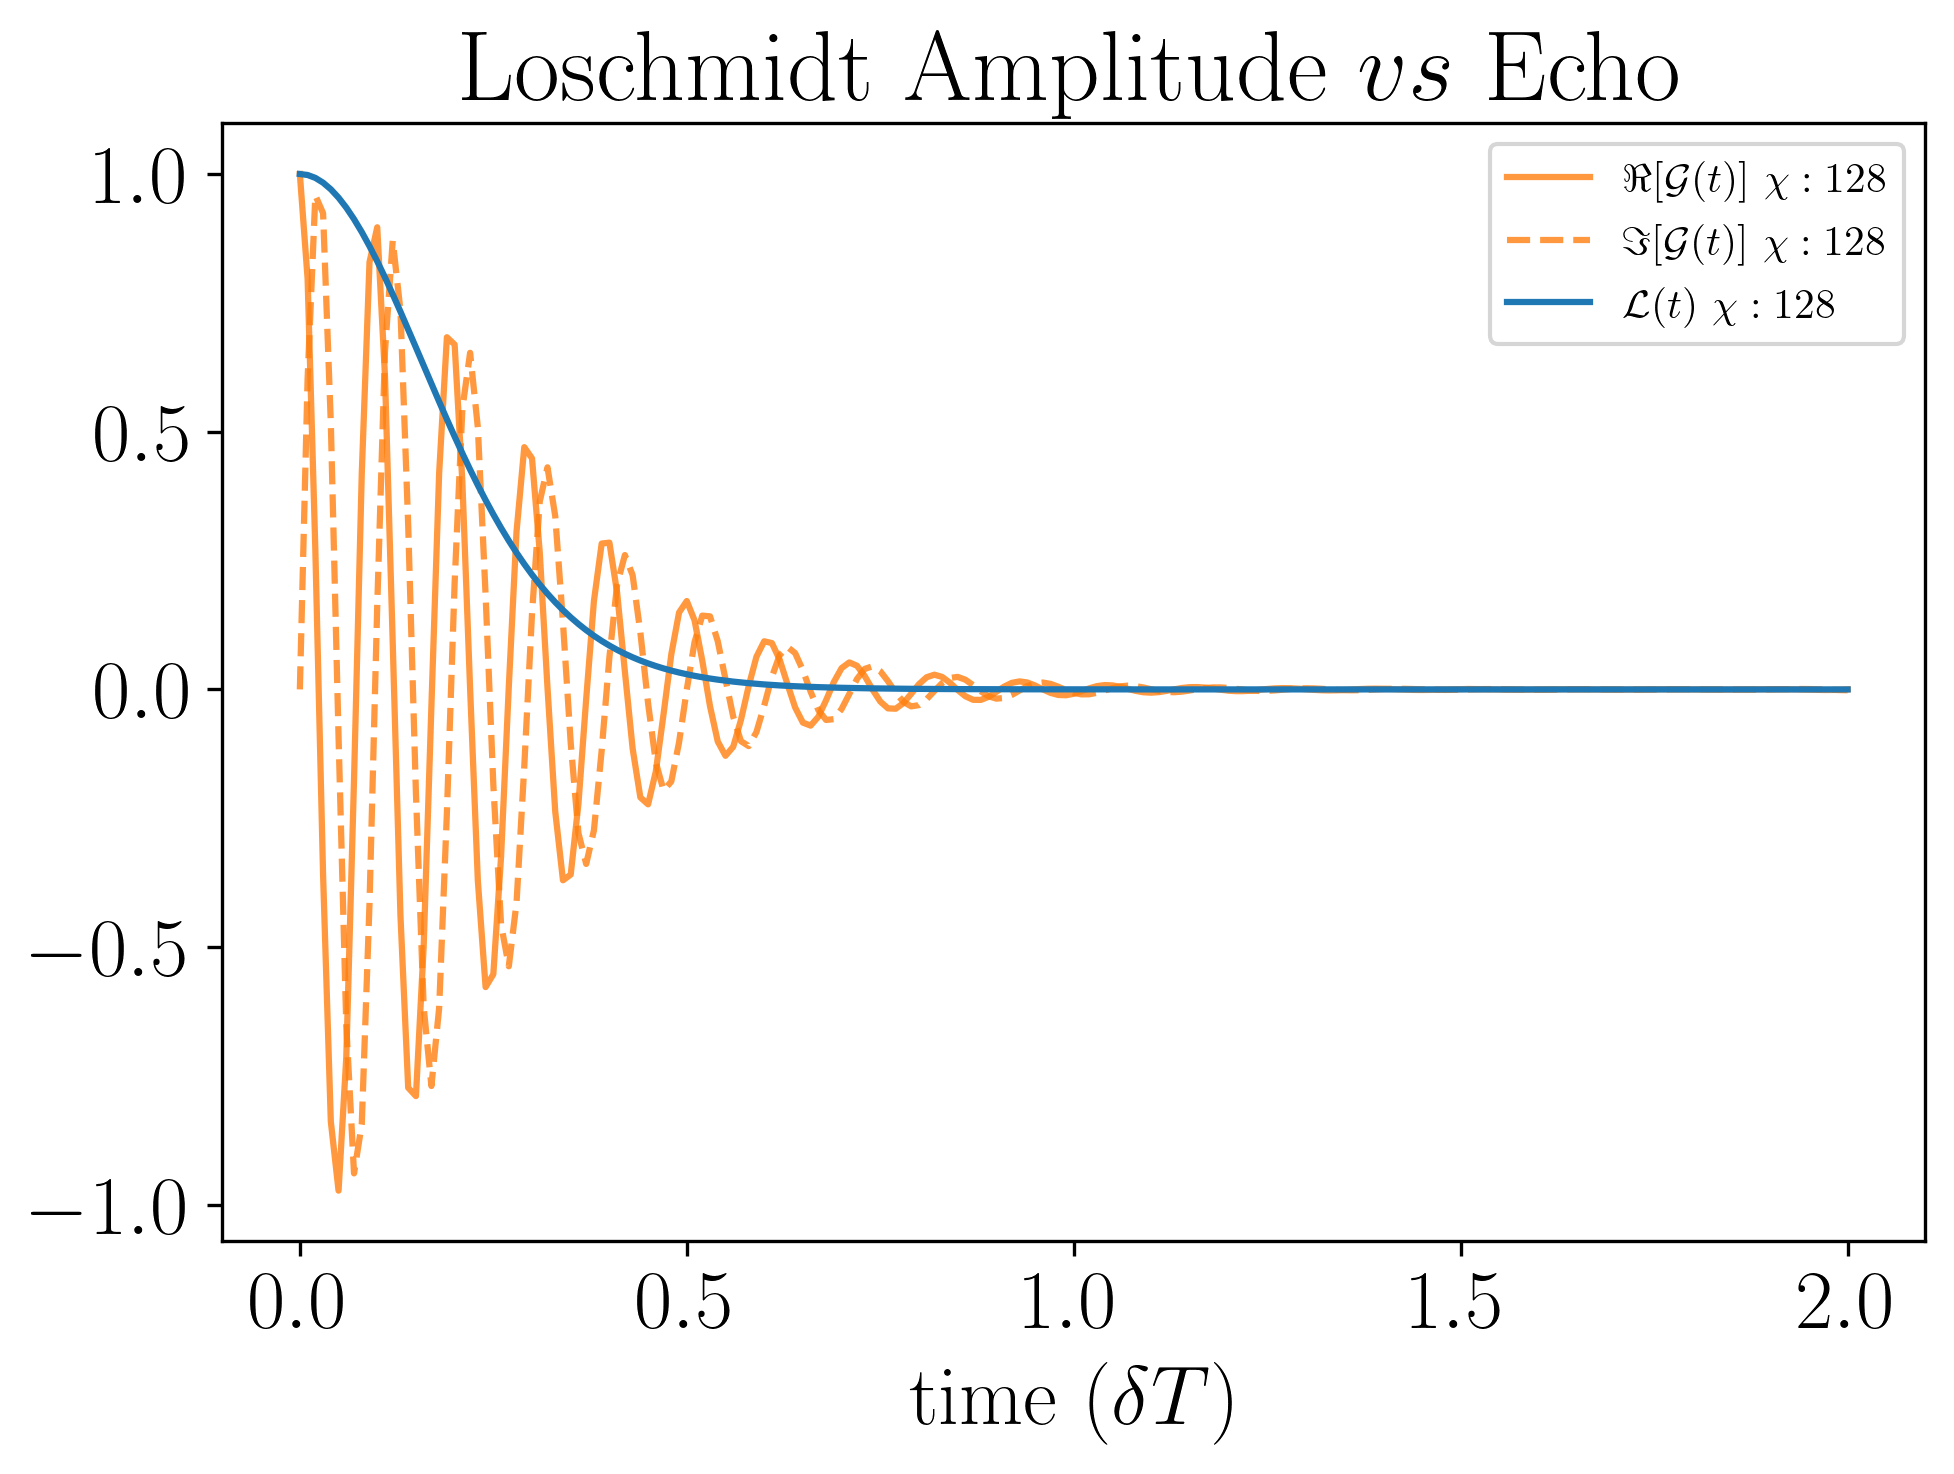

In [703]:
plt.title("Loschmidt Amplitude $vs$ Echo")
plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch[-1]], linestyle="-", markersize=5, alpha=0.8, color="C1", label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.plot(delta*np.asarray(range(steps+1)), [ov.imag for ov in losch[-1]], linestyle="--", markersize=5, alpha=0.8, color="C1", label=f"$\Im[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch[-1]], linestyle="-", markersize=5, alpha=1, color="C0", label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

## Electric field observables

In [224]:
ele_fields = []
# chis = [128]
# steps = 500
# steps = 400
# steps = 200
# delta = 0.05
# # delta = 0.01
# h_i, h_ev = 1.0, 1.0
# h_i, h_ev = 0.9, 0.9
# h_i, h_ev = 0.8, 0.8
# R = 10
of = 0.2
R = 10
steps = 400
delta = 0.01
h_i, h_ev = 0.75, 0.75
l = 5
of = 0.2
chis = [64,128]
for chi in chis:
    elf = np.load(
        f"{path_tensor}/results/electric_field/electric_field_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    ele_fields.append(elf)

[-2, -1, 0, 1, 2]


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_907/2199128586.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_907/2199128586.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


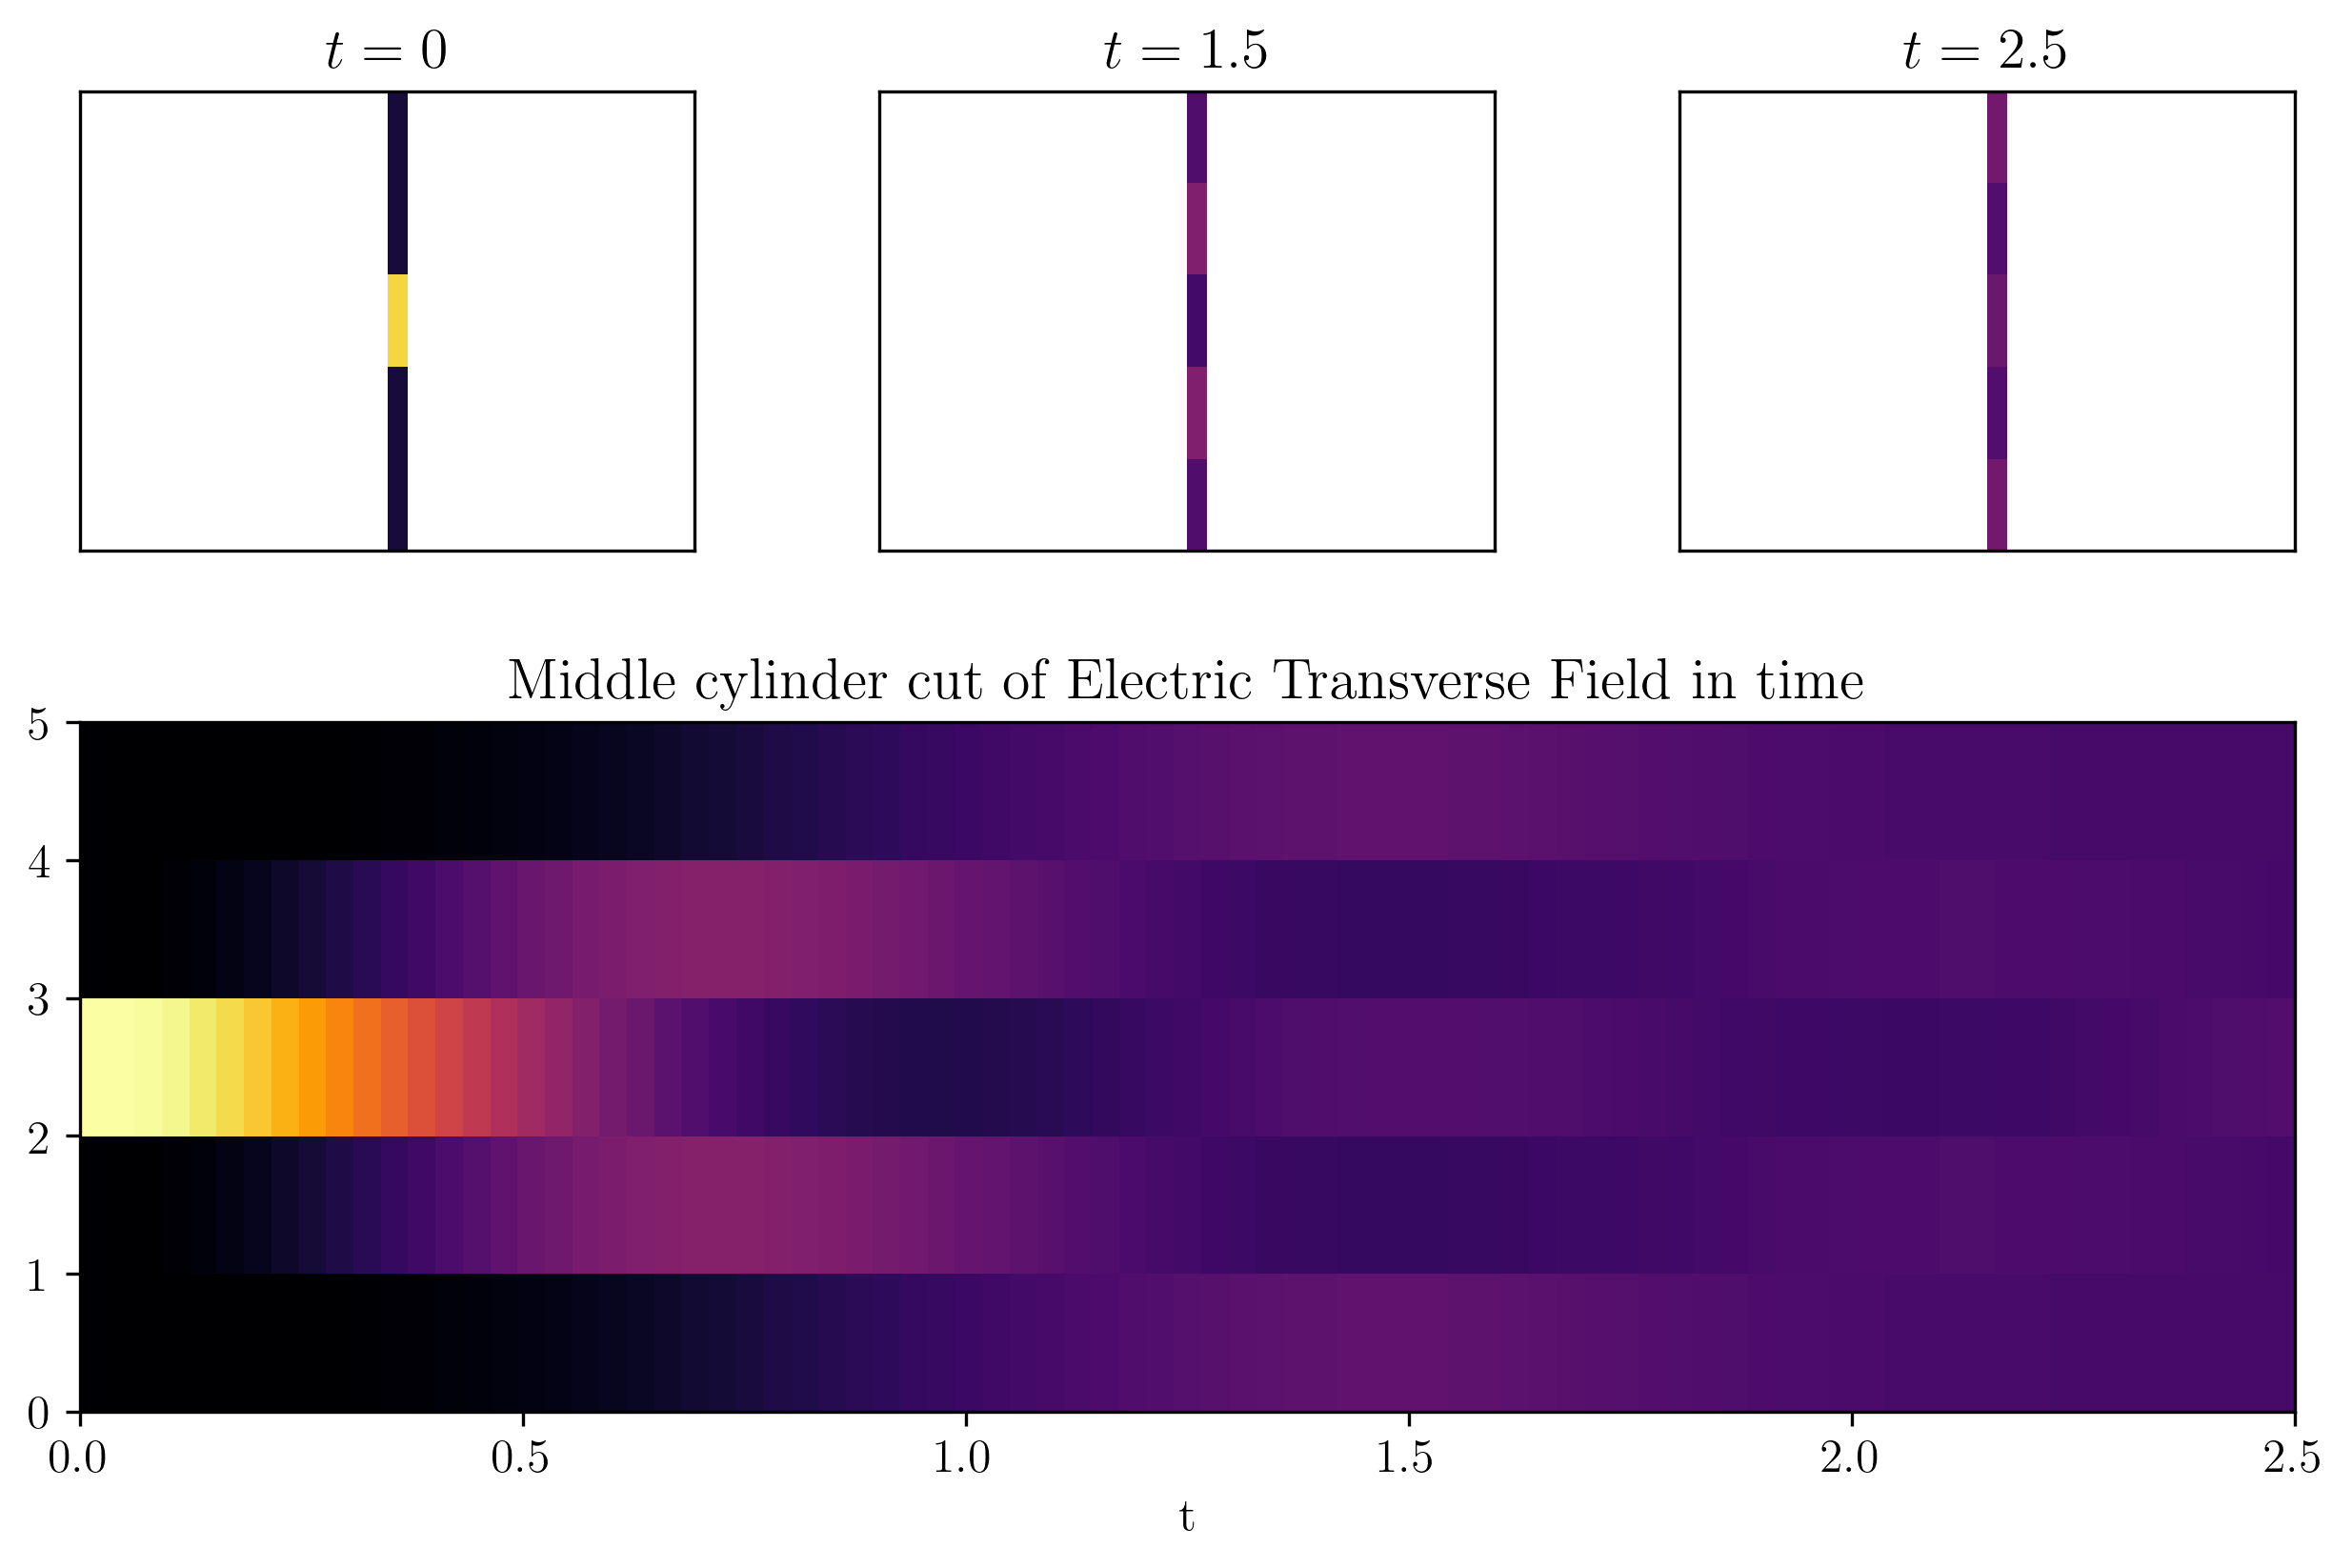

In [227]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Dummy data setup (replace with your actual data)
nx, ny = 30, 5  # grid size
times = [0, 1.5, 2.5]

arr = [*range(-(ny - 1)//2, ny//2 + 1)]
of = 0.2

if (ny%2) == 0:
    arr.pop(0)
print(arr)

data = [[(1-np.asarray(elf[int(t/delta*of)][0::2,1::2])[x])/2 for x in arr] for t in times]
cut_data = np.asarray([[(1-np.asarray(elf[i][0::2,2*(nx//2)+1])[x])/2 for x in arr] for i in range(int(steps*of)+1)]).T

# Create the figure and subplots
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.5], hspace=0.3)

# Top row: 3 snapshots
gs_top = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], wspace=0.3)
for i, (t, d) in enumerate(zip(times, data)):
    ax = fig.add_subplot(gs_top[i])
    im = ax.imshow(d, aspect='auto', origin='lower', cmap='inferno', vmin=0, vmax=1)
    # ax.axvline(nx // 2, color='green')  # vertical cut line
    ax.set_title(rf"$t = {t}$")
    ax.set_xticks([])
    ax.set_yticks([])

# Bottom plot: evolution of the middle slice
ax_bottom = fig.add_subplot(gs[1])
im2 = ax_bottom.imshow(cut_data, aspect='auto', origin='lower',
                       extent=[times[0], times[-1], 0, ny], cmap='inferno')
ax_bottom.set_title("Middle cylinder cut of Electric Transverse Field in time")
ax_bottom.set_xlabel("t")

plt.tight_layout()
plt.show()


In [162]:
[t/delta*of for t in times]

[0.0, 40.0, 80.0]

IndexError: index 81 is out of bounds for axis 0 with size 81

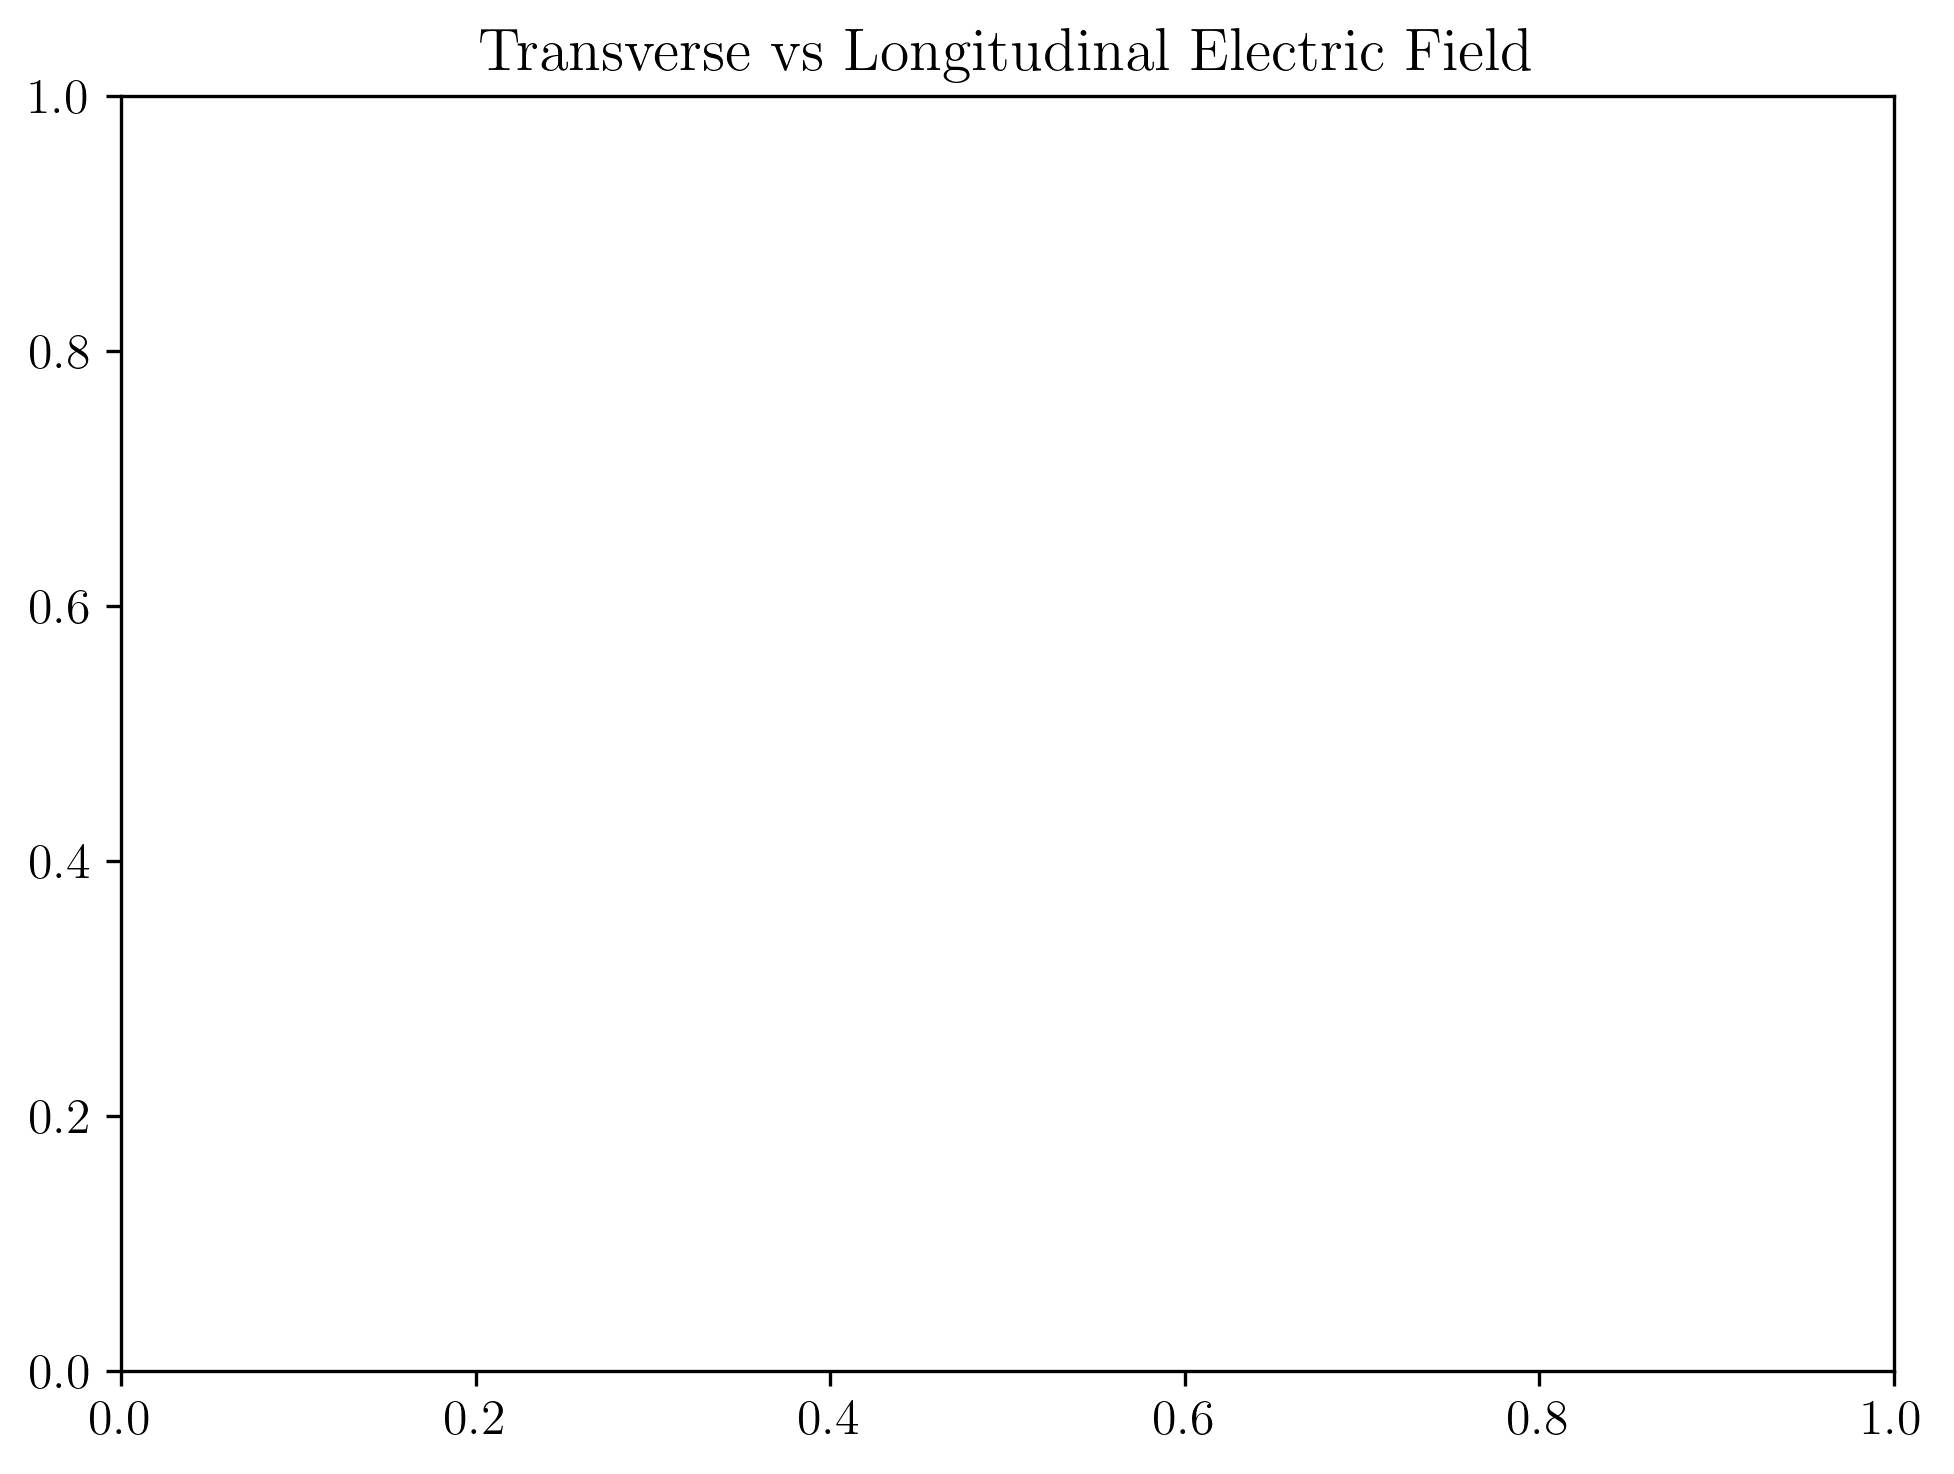

In [142]:
colorsb = create_sequential_colors(len(chis)*3, colormap_name="Blues")
colorso = create_sequential_colors(len(chis)*3, colormap_name="Oranges")
arr = list(range(-(l-1)//2,l//2+1))
arr.pop(l//2)

plt.title("Transverse vs Longitudinal Electric Field")
for k, efields in enumerate(ele_fields):
    # plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][0][1::2][cx[0]:cx[1]]) for i in range(steps+1)],linewidth=0.7, color=colorsb[j*2+5], label="$S_{\parallel}$ "+f"$\chi : {chis[j]}$")
    # plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][1::2,0::2], axis=0)[(L+1)//2] for i in range(steps+1)],linewidth=0.7, label="$S_{\perp}$ "+f"$\chi : {chis[j]}$")
    
    plt.plot(delta*np.arange((steps*of)+1), [np.mean([(1-np.asarray(efields[i][0::2,2*(L//2) + 1])[j])/2 for j in arr]) for i in range(int(steps*of)+1)],linewidth=0.7, label="$S_{\\perp}$ "+f"$\\chi : {chis[k]}$")

plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])

plt.grid(True)
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

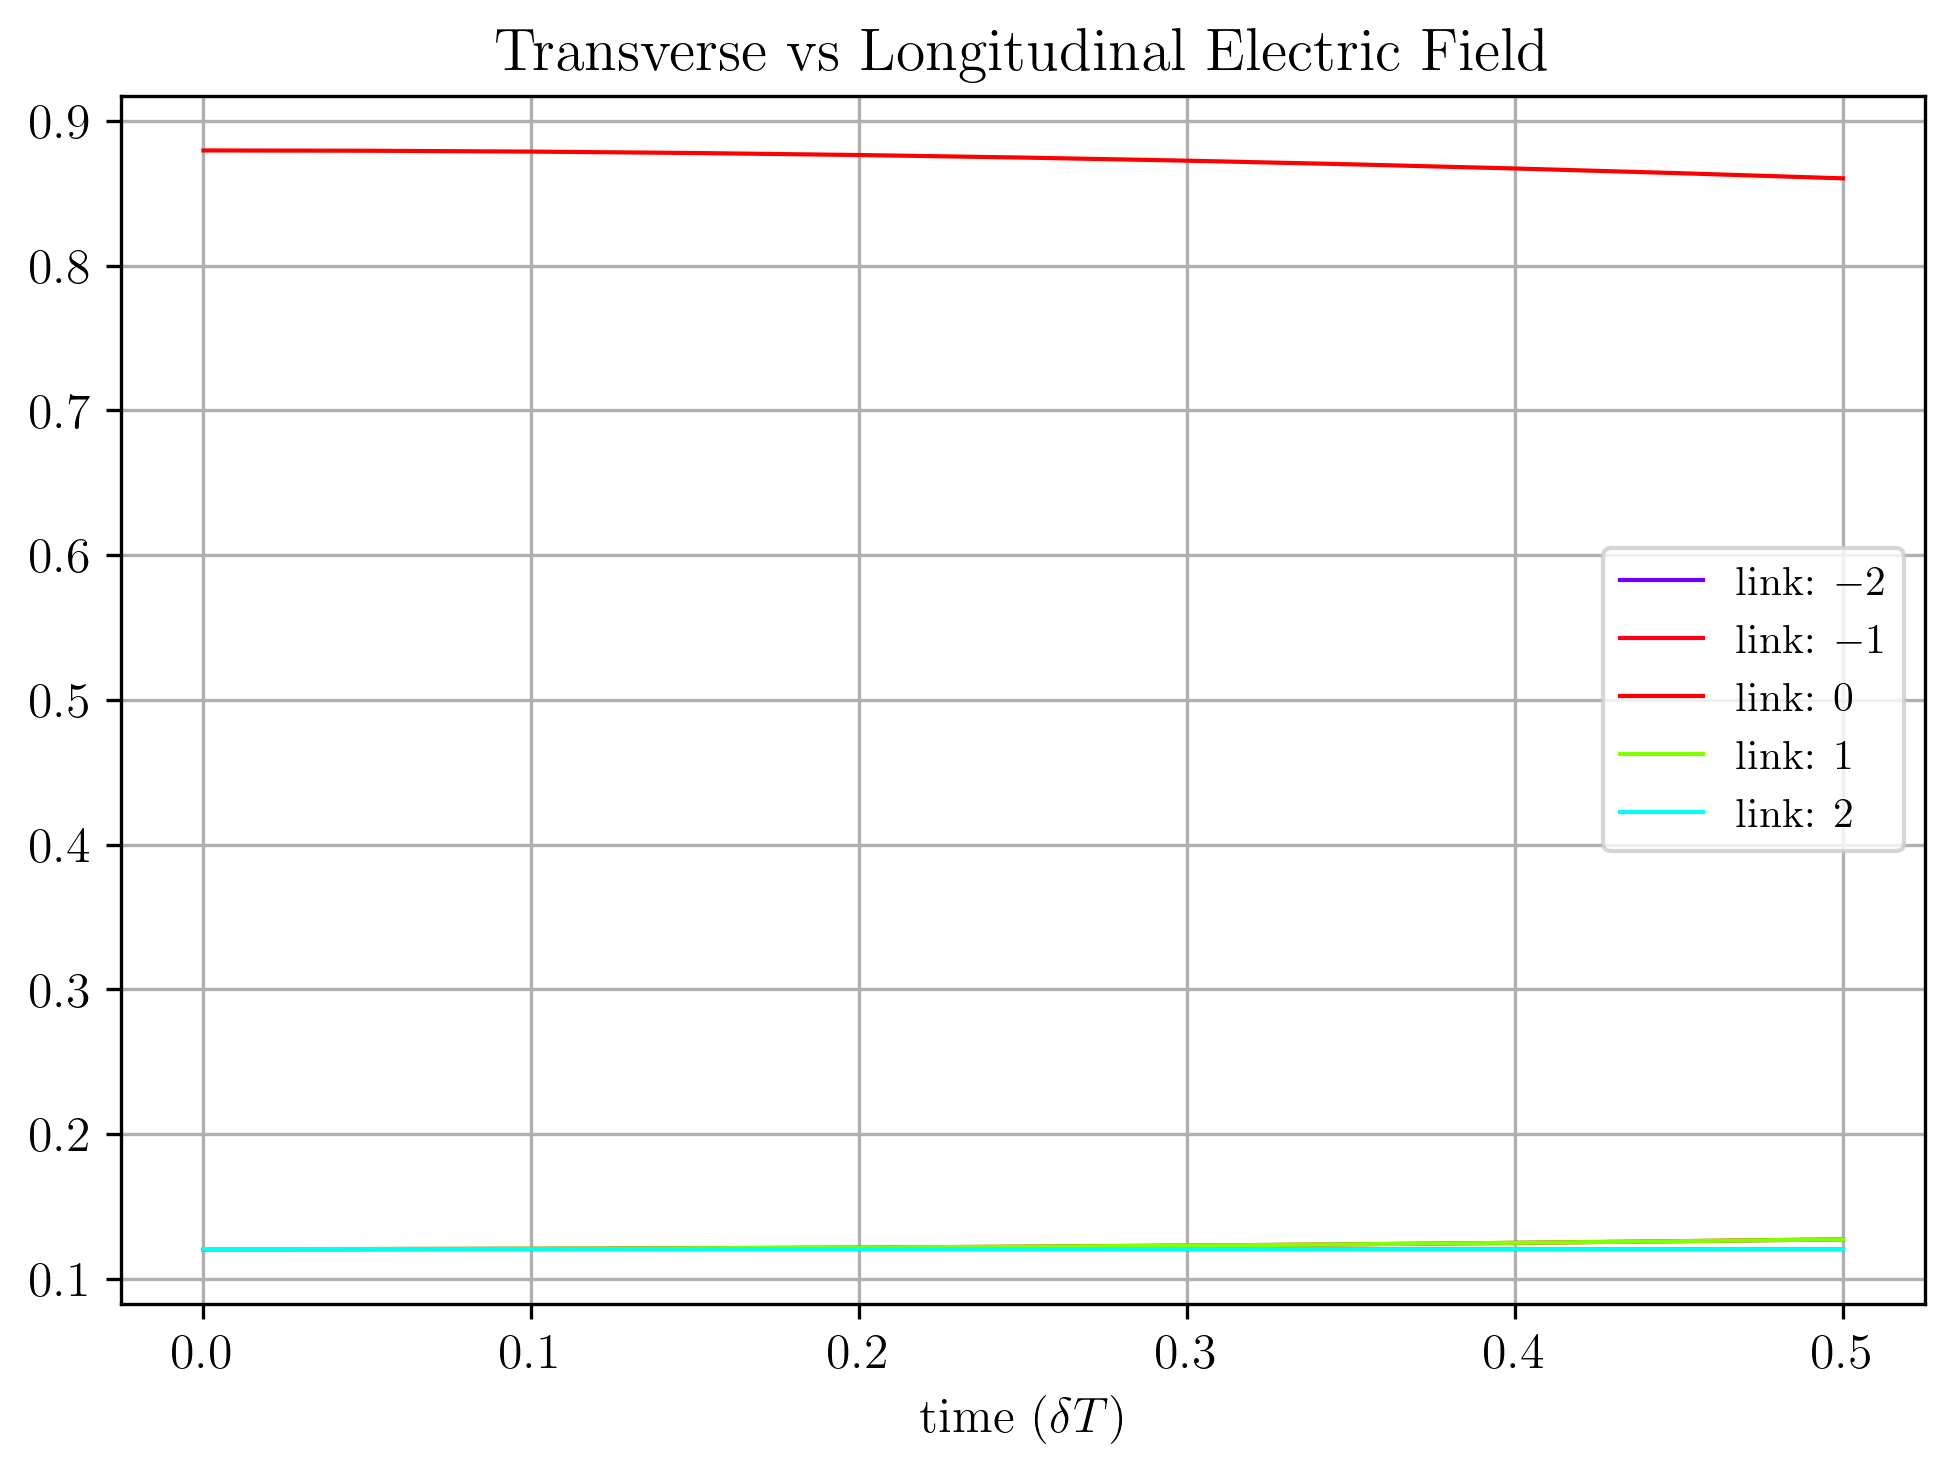

In [100]:
colorsb = create_sequential_colors(len(chis)*3, colormap_name="Blues")
colorso = create_sequential_colors(len(chis)*3, colormap_name="Oranges")
arr = list(range(-(l-1)//2,l//2+1))
marker = None
color = create_sequential_colors(num_colors=len(arr), colormap_name="hsv")
plt.title("Transverse vs Longitudinal Electric Field")
for k, efields in enumerate(ele_fields):
    # plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][0][1::2][cx[0]:cx[1]]) for i in range(steps+1)],linewidth=0.7, color=colorsb[j*2+5], label="$S_{\parallel}$ "+f"$\chi : {chis[j]}$")
    # plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][1::2,0::2], axis=0)[(L+1)//2] for i in range(steps+1)],linewidth=0.7, label="$S_{\perp}$ "+f"$\chi : {chis[j]}$")
    for j in arr:
        # if j < 0:
        #     marker = '1'
        # elif j == 0:
        #     marker = '2'
        # elif j > 0:
        #     marker = '3'
        plt.plot(delta*np.arange((steps*of)+1), [(1 - np.asarray(efields[i][0::2,2*(L//2) + 1])[j])/2 for i in range(int(steps*of)+1)],linewidth=1, color=color[j], marker=marker, label=f"link: ${j}$")

plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])

plt.grid(True)
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)
plt.savefig(f"{path_figures}/figures/fluxtube/electric_field_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{delta}_steps_{steps}.png")

/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_83292/3338224464.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


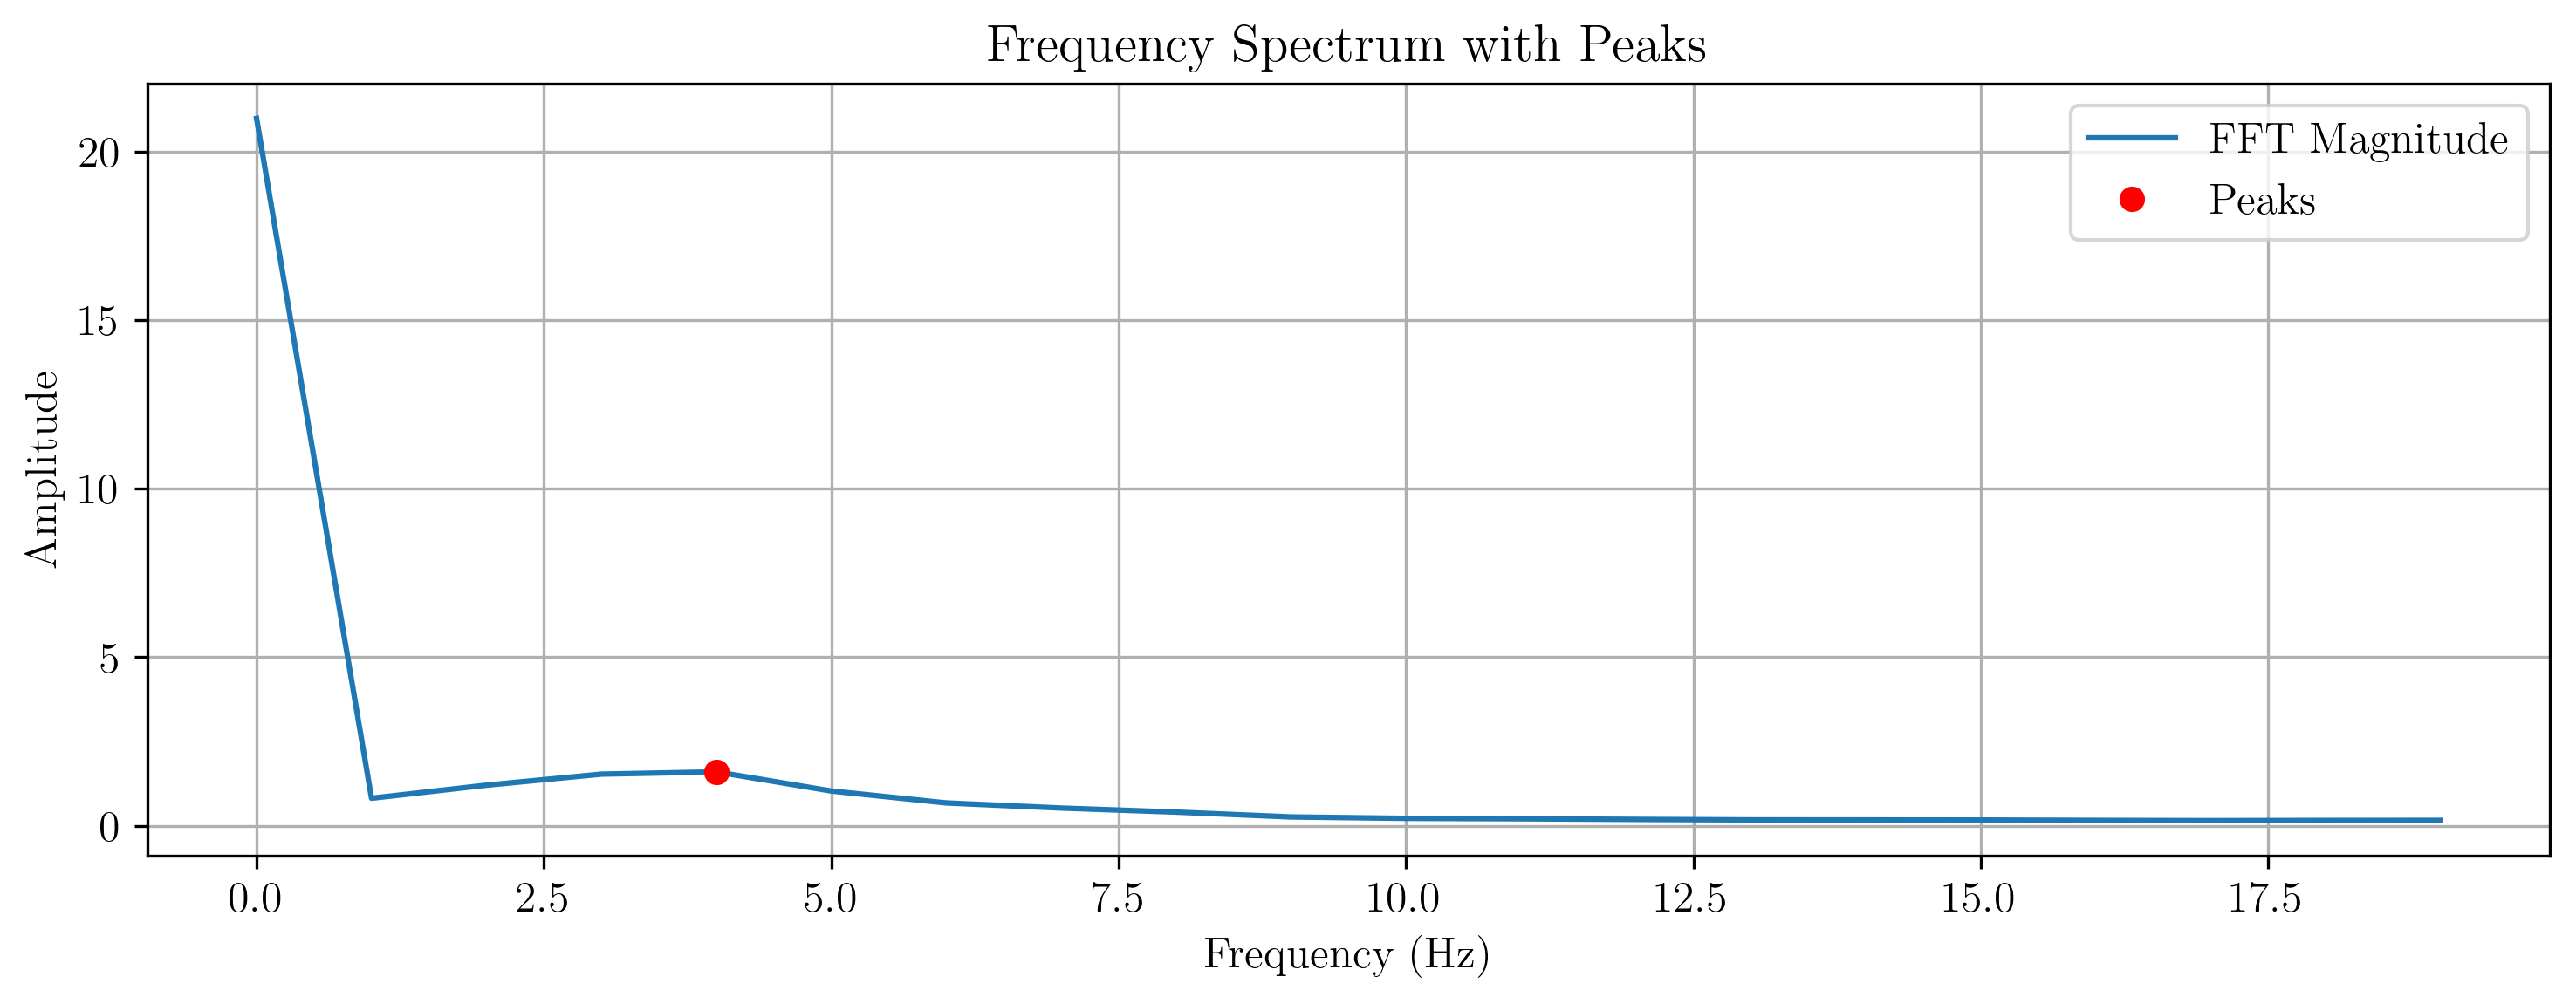

Peak frequencies (Hz): [4.]


In [173]:
from scipy.signal import find_peaks
j = 1
t = delta*np.arange((steps*of)+1)
signal = [np.asarray(efields[i][0::2,2*(L//2) + 1])[j] for i in range(int(steps*of)+1)]
fs = int(steps*of + 1)

# Step 1: Crop to oscillatory part (adjust as needed)
# For real data, you could threshold or visually pick the index
start_idx = fs  # Start after 0.5s (replace this with your own index)
osc_signal = signal

# Step 2: FFT
N = len(osc_signal)
fft_result = np.fft.fft(osc_signal)
fft_freqs = np.fft.fftfreq(N, d=1/fs)

# Keep only positive frequencies
positive_freqs = fft_freqs[:N//2]
magnitude = np.abs(fft_result[:N//2])

# Step 3: Find peaks
peaks, _ = find_peaks(magnitude, height=np.max(magnitude)*0.05)  # Adjust threshold if needed
peak_freqs = positive_freqs[peaks]
peak_amps = magnitude[peaks]

# Plot the FFT spectrum with peaks
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitude, label="FFT Magnitude")
plt.plot(peak_freqs, peak_amps, 'ro', label="Peaks")
plt.title("Frequency Spectrum with Peaks")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print peak frequencies
print("Peak frequencies (Hz):", peak_freqs)

Fitted frequency: -1.6635 Hz
1/2R: 0.0250 Hz
Damping factor: 2.6378
Amplitude: 0.4047
Phase: 6.5271
Offset: 0.4982


/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_83292/1407811305.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


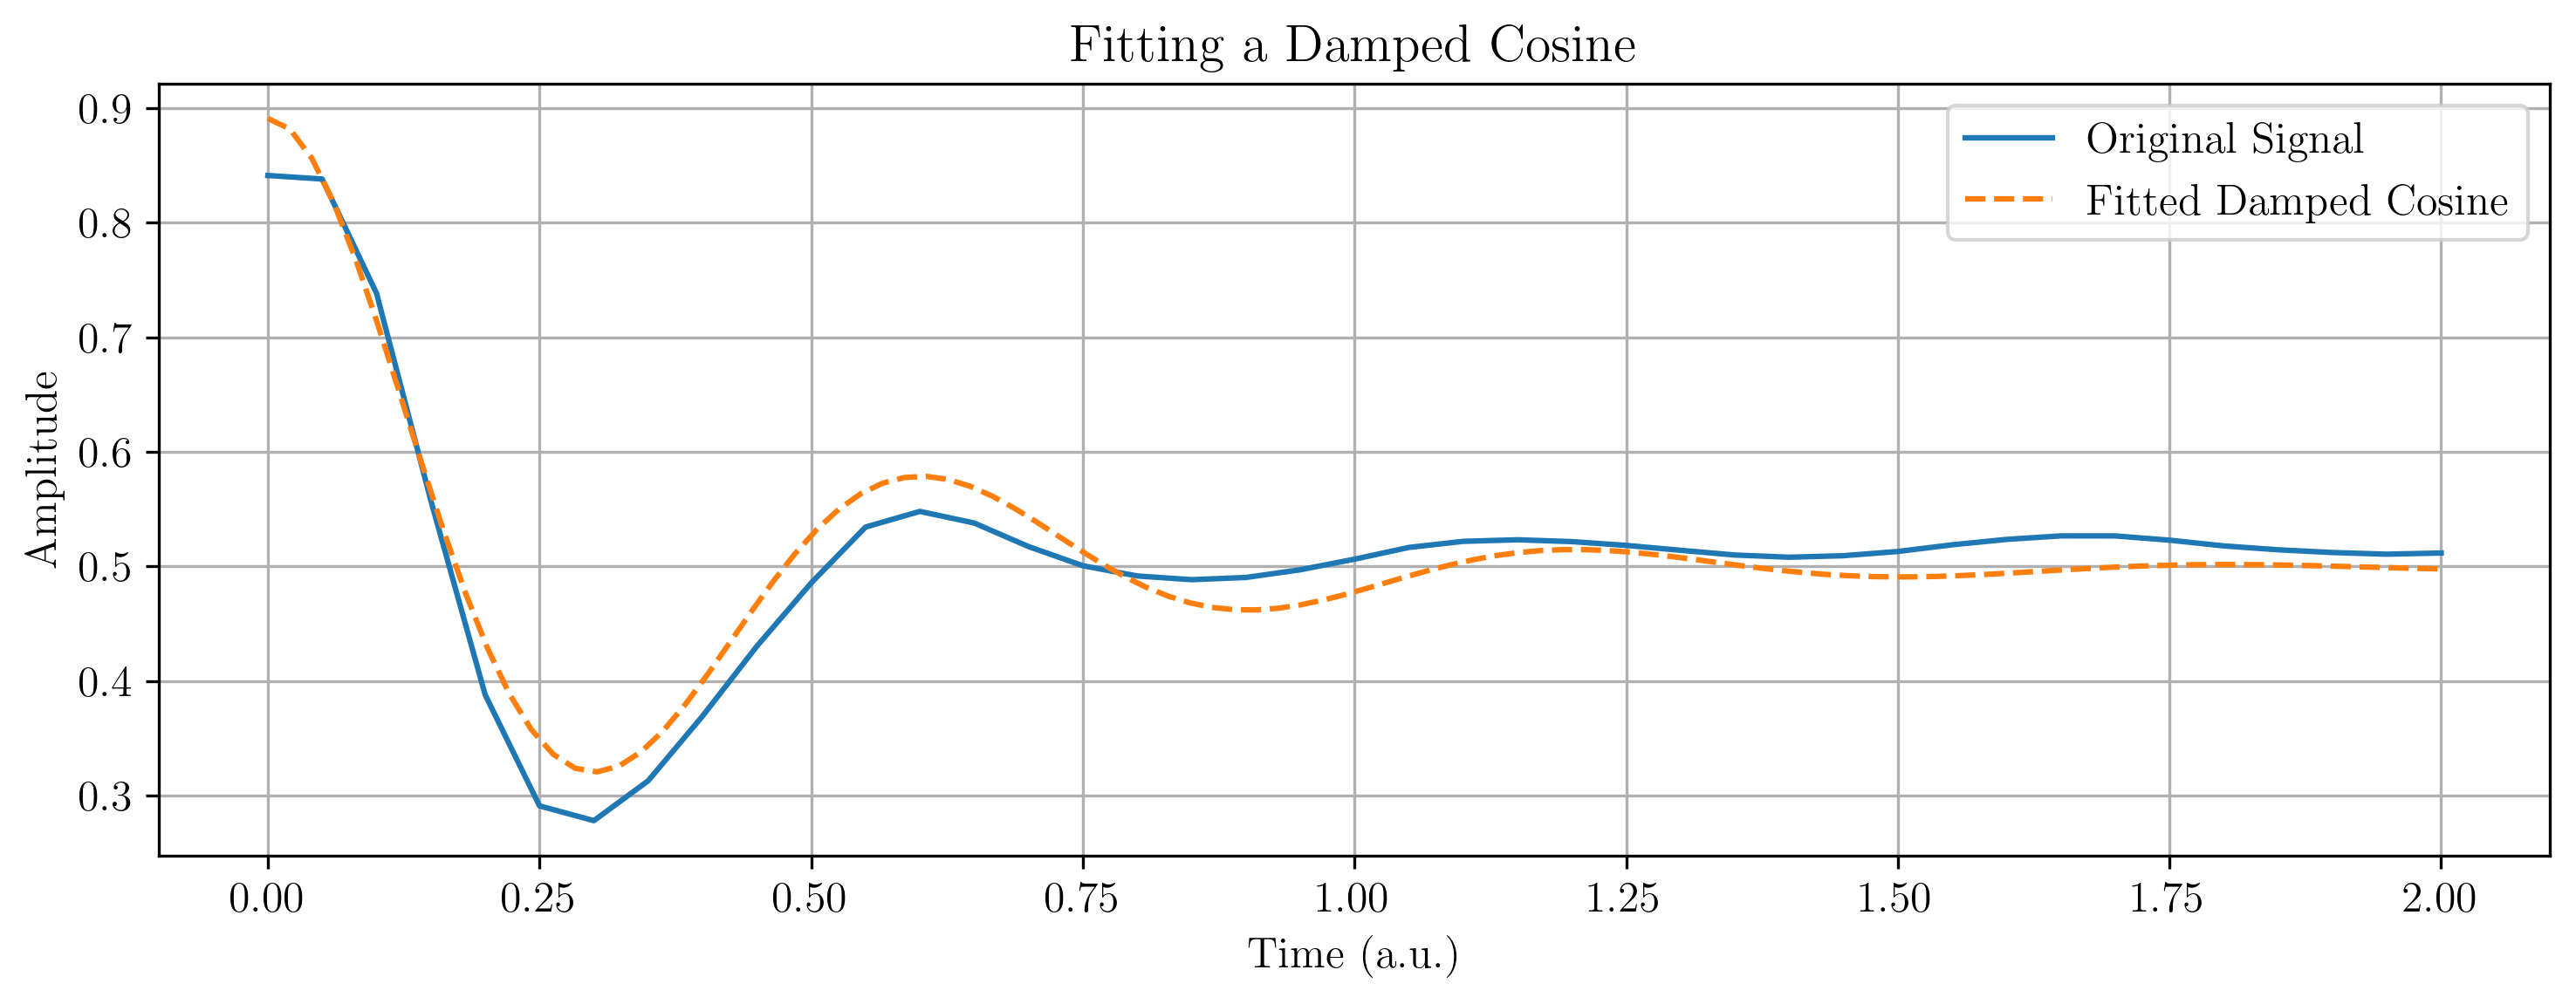

In [172]:
# Define the damped cosine model
def damped_cosine(t, A, gamma, f0, phi, offset):
    return A * np.exp(-gamma * t) * np.cos(2 * np.pi * f0 * t + phi) + offset

# Initial guess: [amplitude, damping rate, frequency, phase, offset]
A0 = np.max(signal) - np.min(signal)
gamma0 = 0.05
f0_0 = 0.1
phi0 = 0
offset0 = np.mean(signal)

p0 = [A0, gamma0, f0_0, phi0, offset0]

# Fit the model
popt, pcov = curve_fit(damped_cosine, t, signal, p0=p0)

# Extract fitted parameters
A_fit, gamma_fit, f0_fit, phi_fit, offset_fit = popt
print(f"Fitted frequency: {f0_fit:.4f} Hz")
print(f"1/2R: {1/(2*R):.4f} Hz")
print(f"Damping factor: {gamma_fit:.4f}")
print(f"Amplitude: {A_fit:.4f}")
print(f"Phase: {phi_fit:.4f}")
print(f"Offset: {offset_fit:.4f}")

# Generate the fitted signal
xs = np.linspace(t[0],t[-1],100)
fitted_signal = damped_cosine(xs, *popt)

# Plot original and fitted signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Original Signal")
plt.plot(xs, fitted_signal, label="Fitted Damped Cosine", linestyle='--')
plt.title("Fitting a Damped Cosine")
plt.xlabel("Time (a.u.)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# np.save("C:/Users/HP/Desktop/signal.npy", signal)

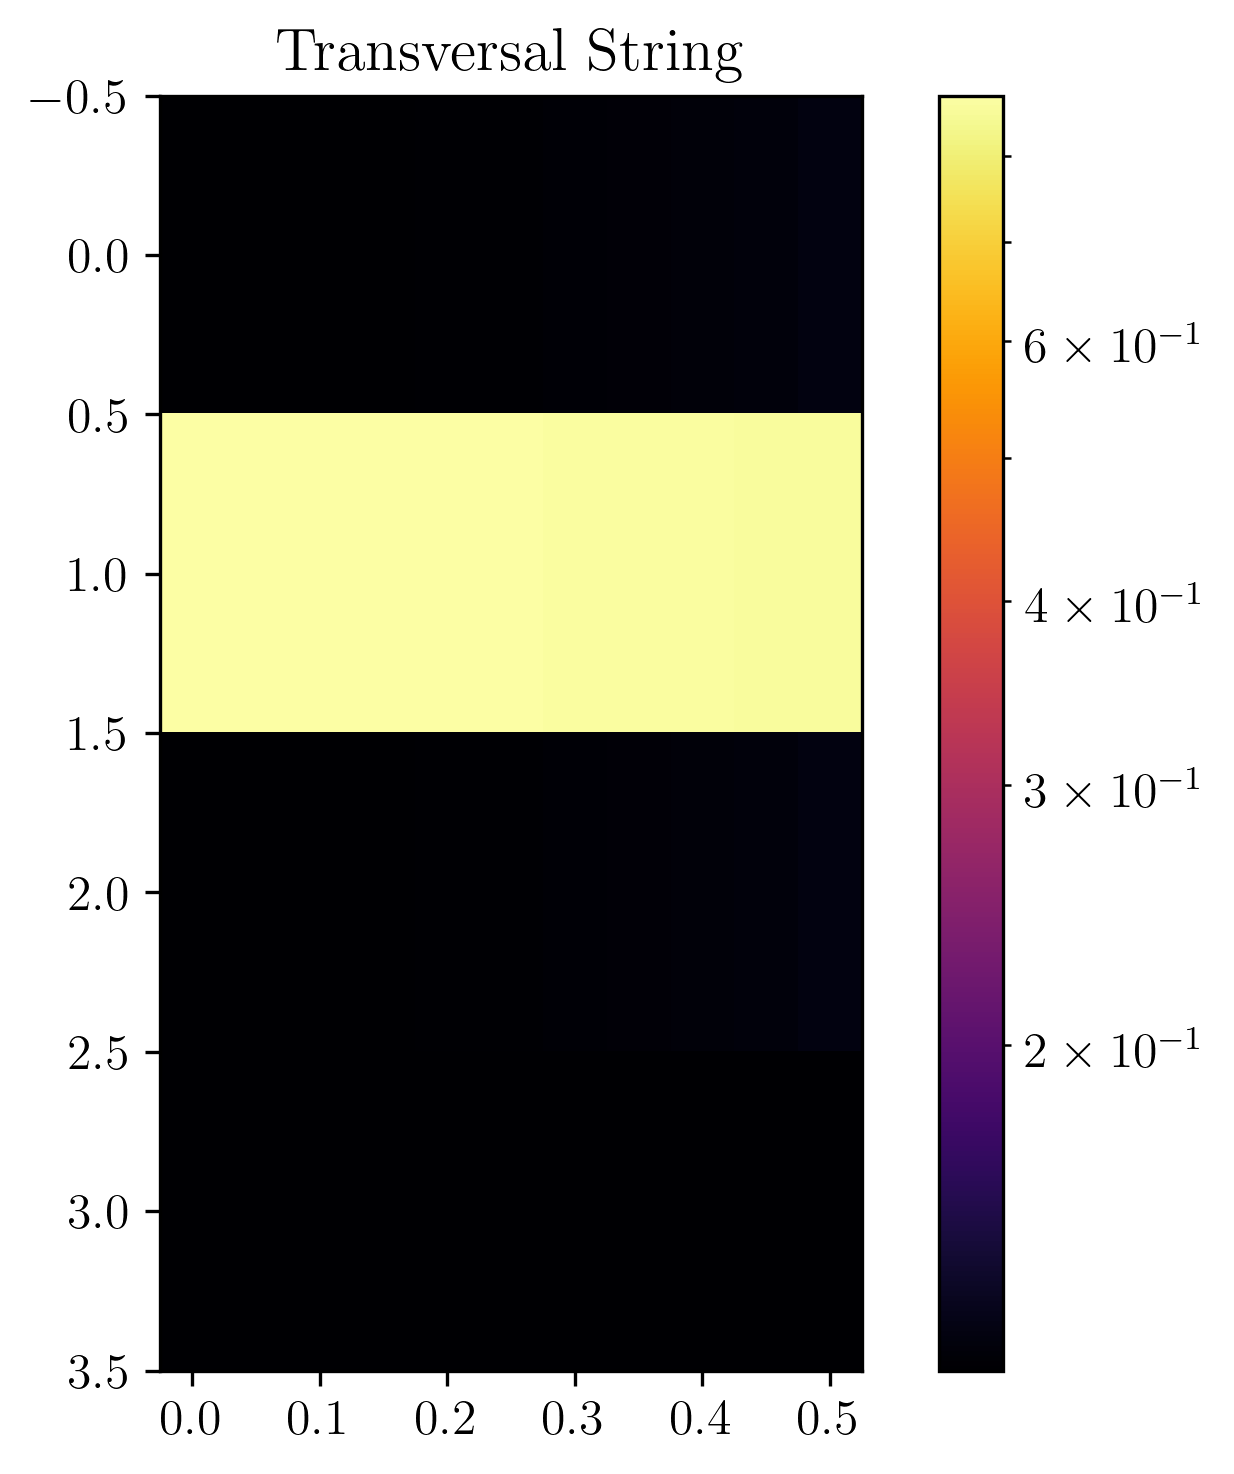

In [101]:
# string_arr = [((1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-3])/2, 
#                   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-2])/2,
#                   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-1])/2,
#                   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[0])/2,
#                   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[1])/2,
#                   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[2])/2,
#                   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[3])/2) for i in range(int(steps*of)+1)]
string_arr = [(   (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-1])/2,
                  (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[0])/2,
                  (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[1])/2,
                  (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[2])/2) for i in range(int(steps*of)+1)]
plt.title("Transversal String")
plt.imshow(np.asarray(string_arr).T, cmap="inferno", aspect=5, norm=LogNorm()) # vmin=0, vmax=1,
plt.xticks(ticks=(np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.colorbar()
plt.savefig(f"{path_figures}/figures/fluxtube/electric_field_evolution_colormap_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{delta}_steps_{steps}.png")

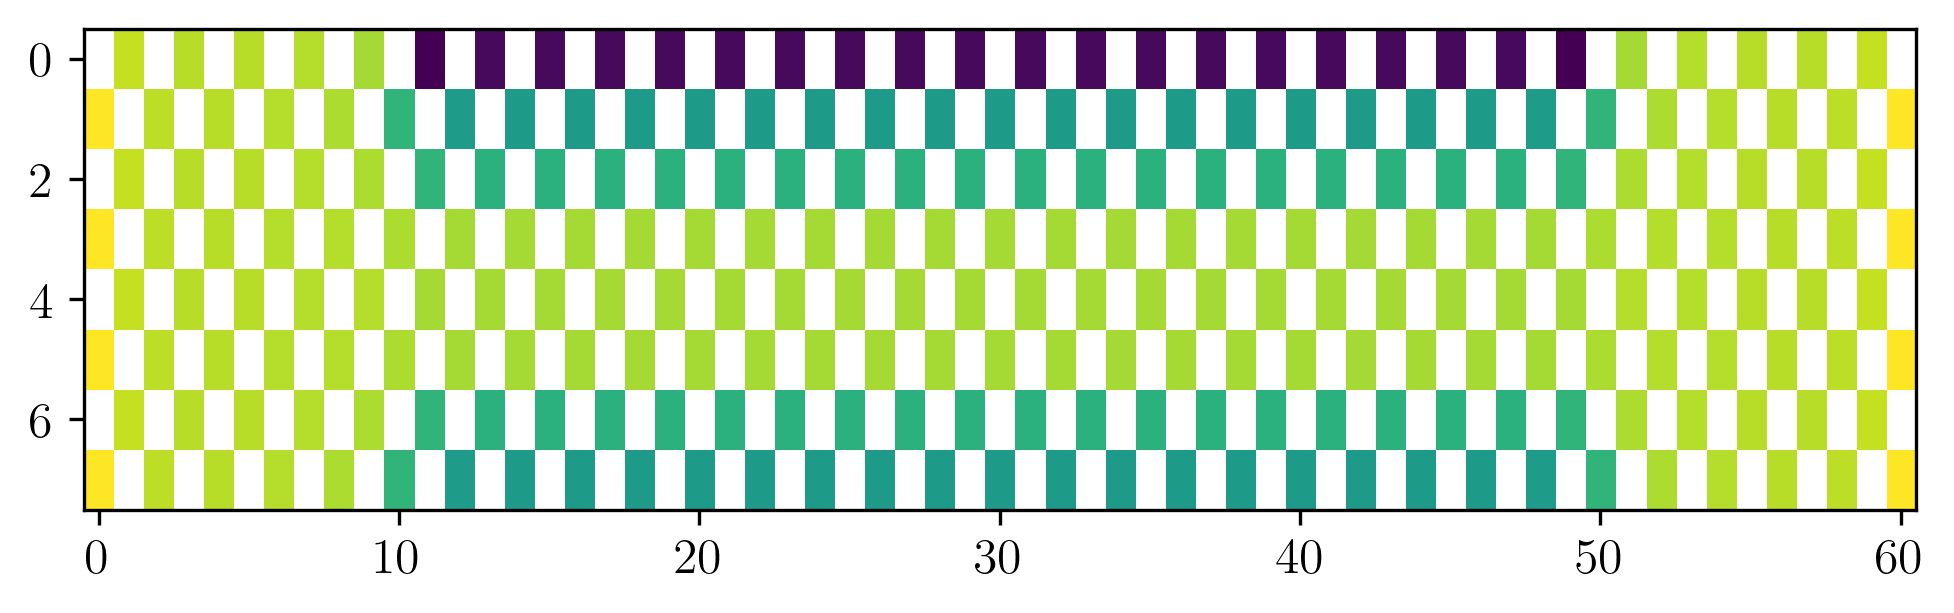

In [105]:
plt.imshow(efields[-1], aspect=2)

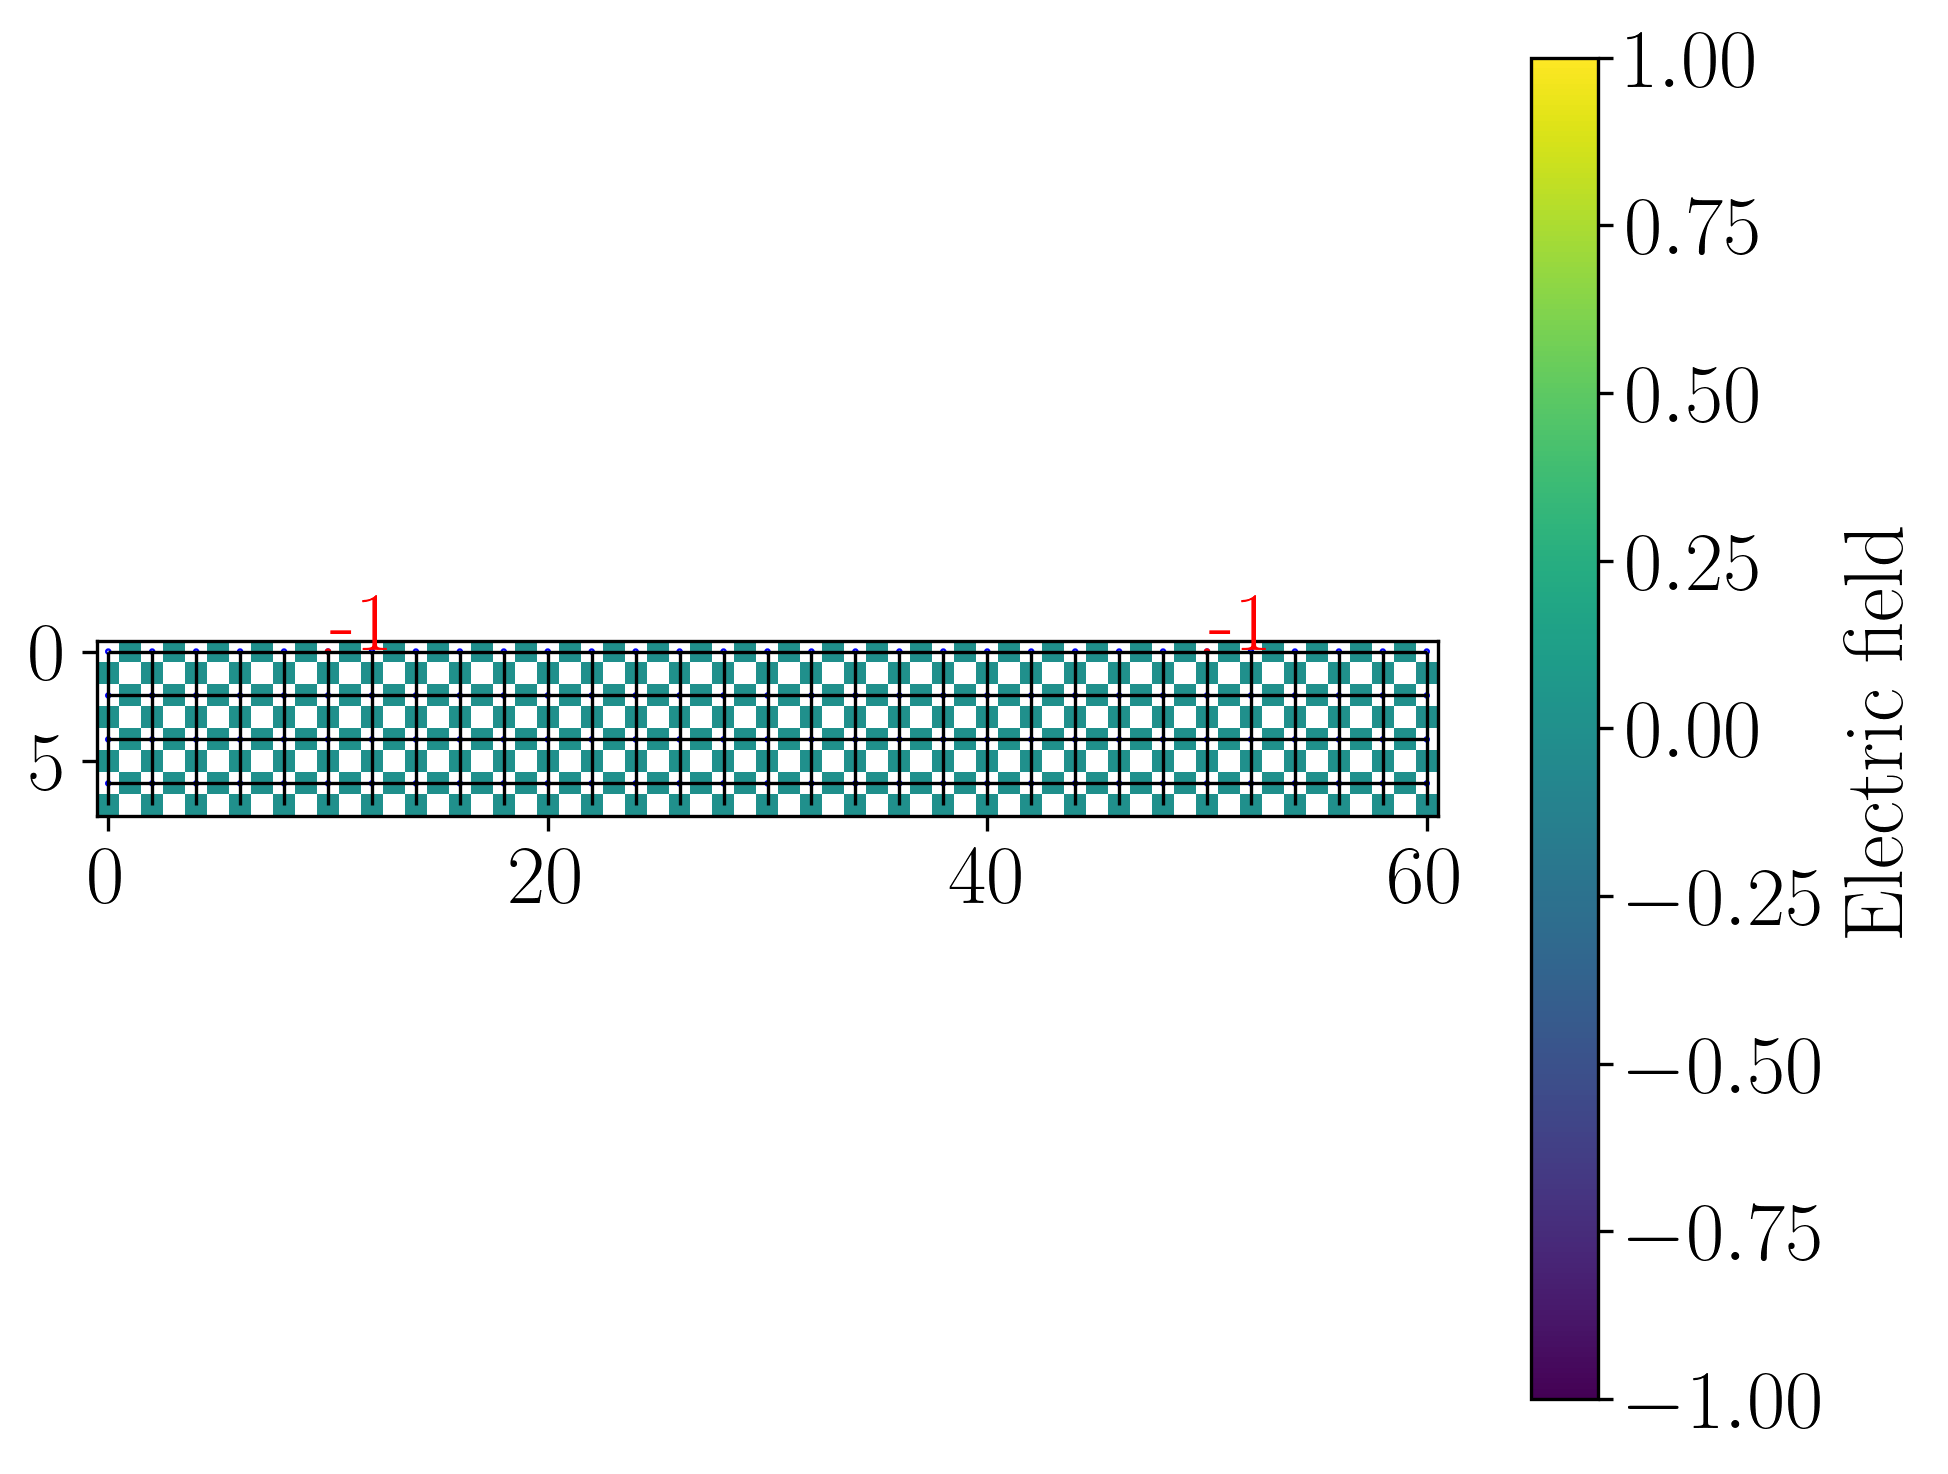

In [455]:
if save_gif:
    movie = anim(frames=steps+1, interval=200, data=efields, params=np.linspace(0,steps*delta,steps+1), show=True, charges_x=cx, charges_y=cy, precision=2, time=True)
    movie.save(filename=f"quench_mpo_{l}x{L}_g_start_{h_i}_g_ev_{h_ev}_trott_steps_{steps}_delta_{delta}_chi_{chi}.gif")

In [ ]:
def string_width_in_time_occupation():
  efields = np.load(
      f"{path_tensor}/results/electric_field/electric_field_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")

  h_f = h_i
  npoints = 1
  try:
    vac = None
    efields_vacuum = np.load(
                f"{path_tensor}/results/energy_data/electric_energy_density_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
            )
  except:
    vac = np.nan
    efields_vacuum = np.load(
                f"{path_tensor}/results/energy_data/electric_energy_density_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{bc}_{vac}-{vac}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"
            )
  string_arr = [((1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-3])/2, 
                    (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-2])/2,
                    (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[-1])/2,
                    (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[1])/2,
                    (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[2])/2,
                    (1-np.asarray(efields[i][0::2,2*(L//2) + 1])[3])/2) for i in range(int(steps*of)+1)]
  arr = list(range(-(l-1)//2,l//2+1))
  arr.pop(l//2)
  print(arr)
  w_t = []
  for i, ladd in enumerate(string_arr):
      w_t.append(np.sum([(x**2) * (ladd[i] - (1-np.abs(efields_vacuum[0][i]))/2) for i, x in enumerate(arr)]) / (np.sum(ladd) - (1-np.sum(np.abs(efields_vacuum)))/2))


[-0.8411102 -0.8411102 -0.8411102 -0.8411102 -0.8411102 -0.8411102]
[-3, -2, -1, 1, 2, 3]


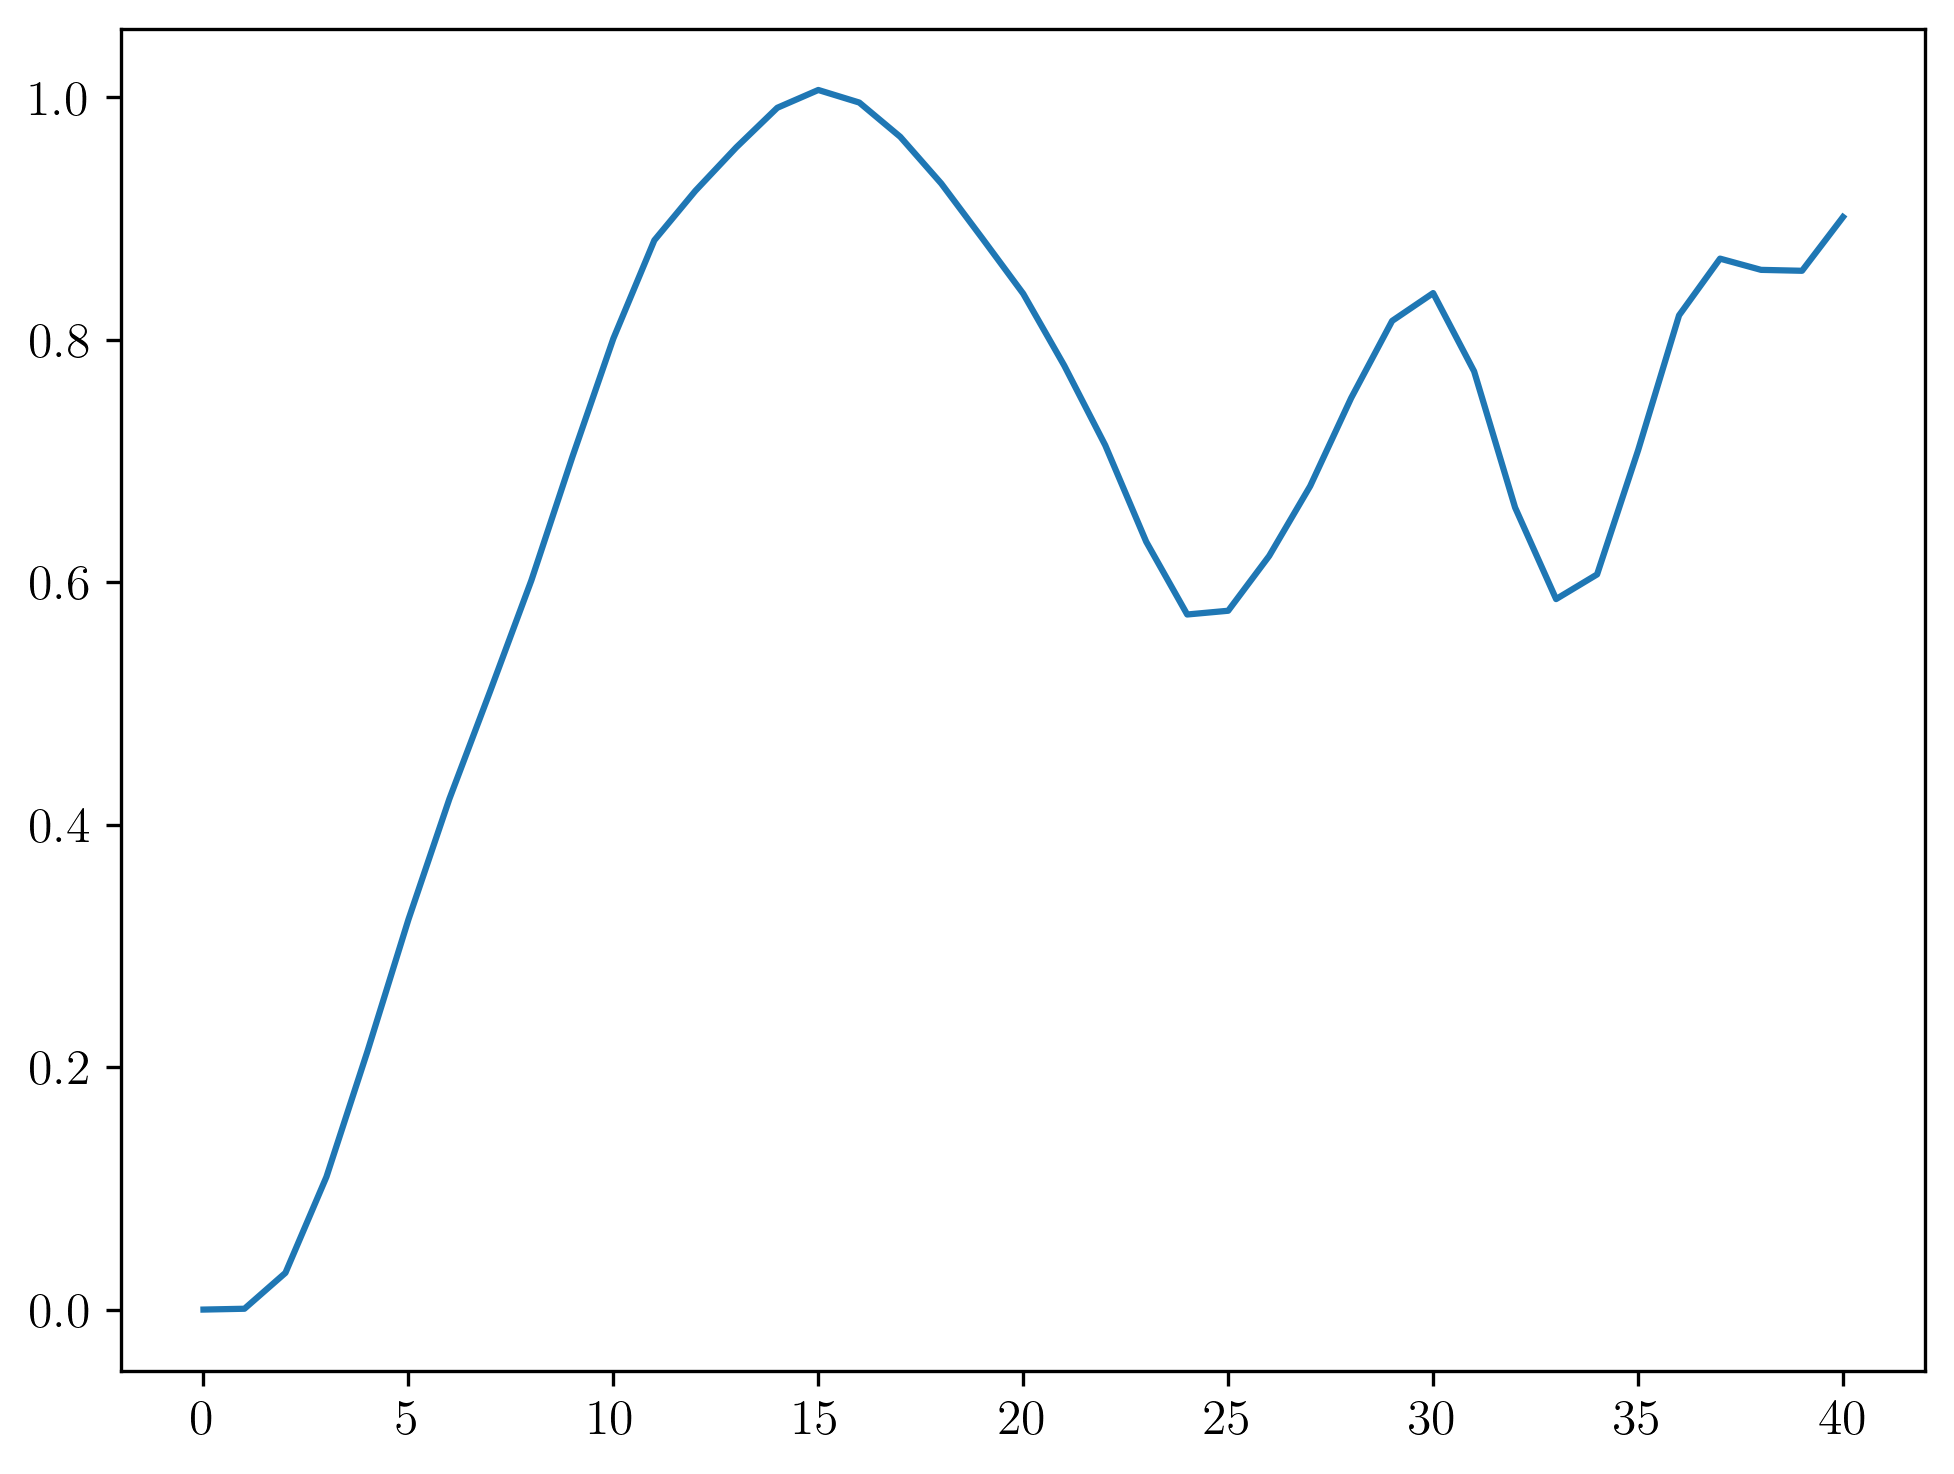

In [53]:
plt.plot(w_t)

## String Width

In [6]:
ws_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)

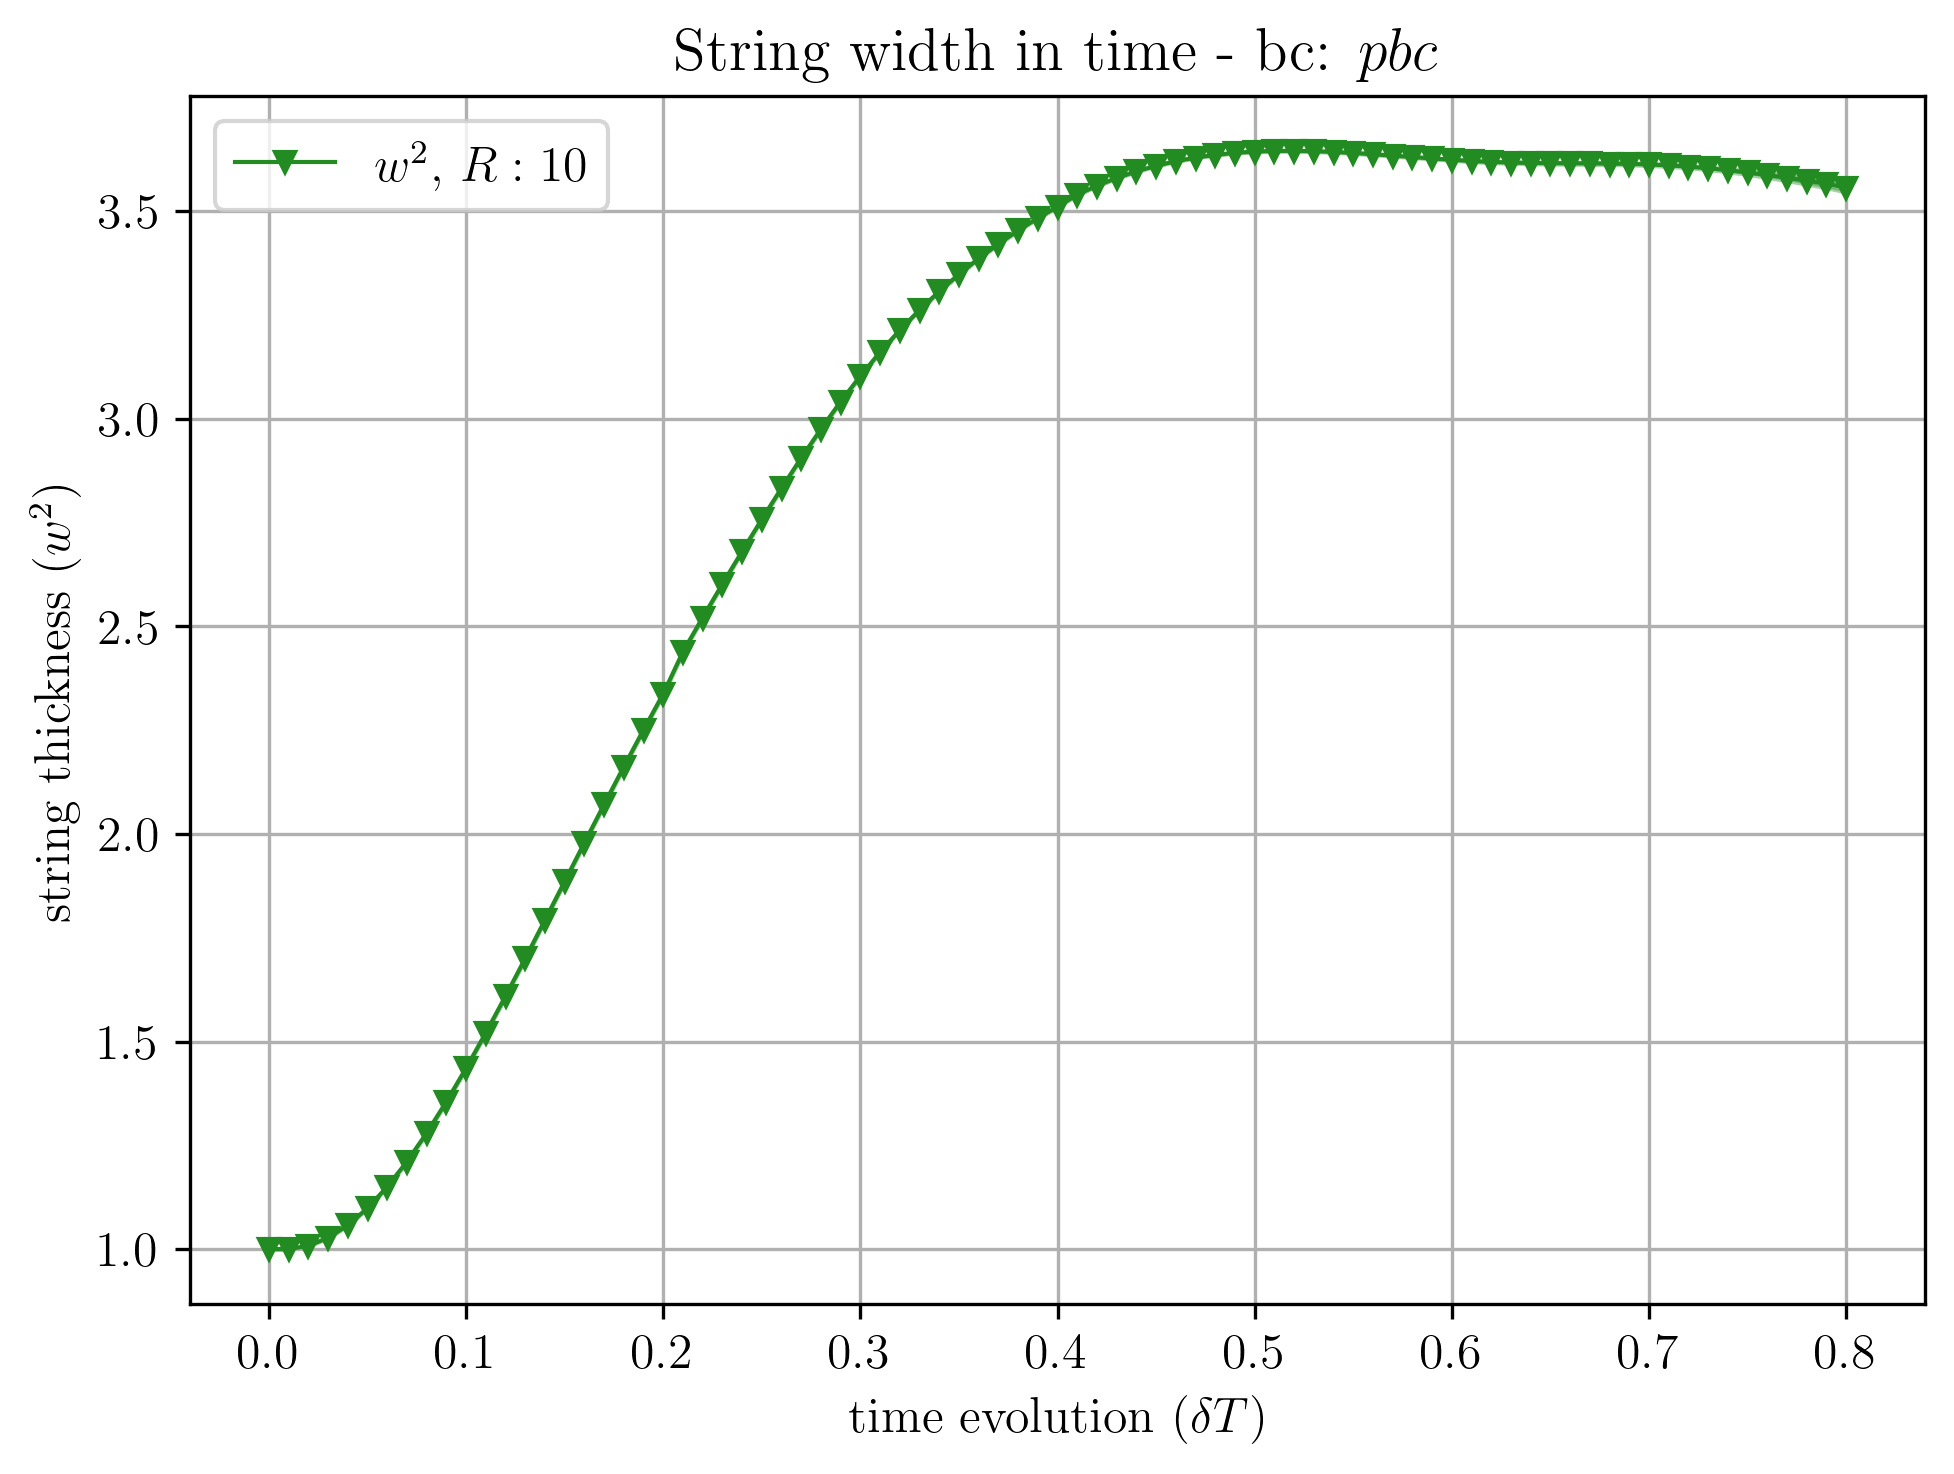

In [7]:
plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color="forestgreen", linestyle="-", linewidth=1, label="$w^2$"+f", $R: {R}$")
plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color="forestgreen", alpha=0.4)
plt.title(f"String width in time - bc: ${bc}$")
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")
plt.grid(True)
plt.legend()

# Fix g, vary R analysis

### String width

[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]


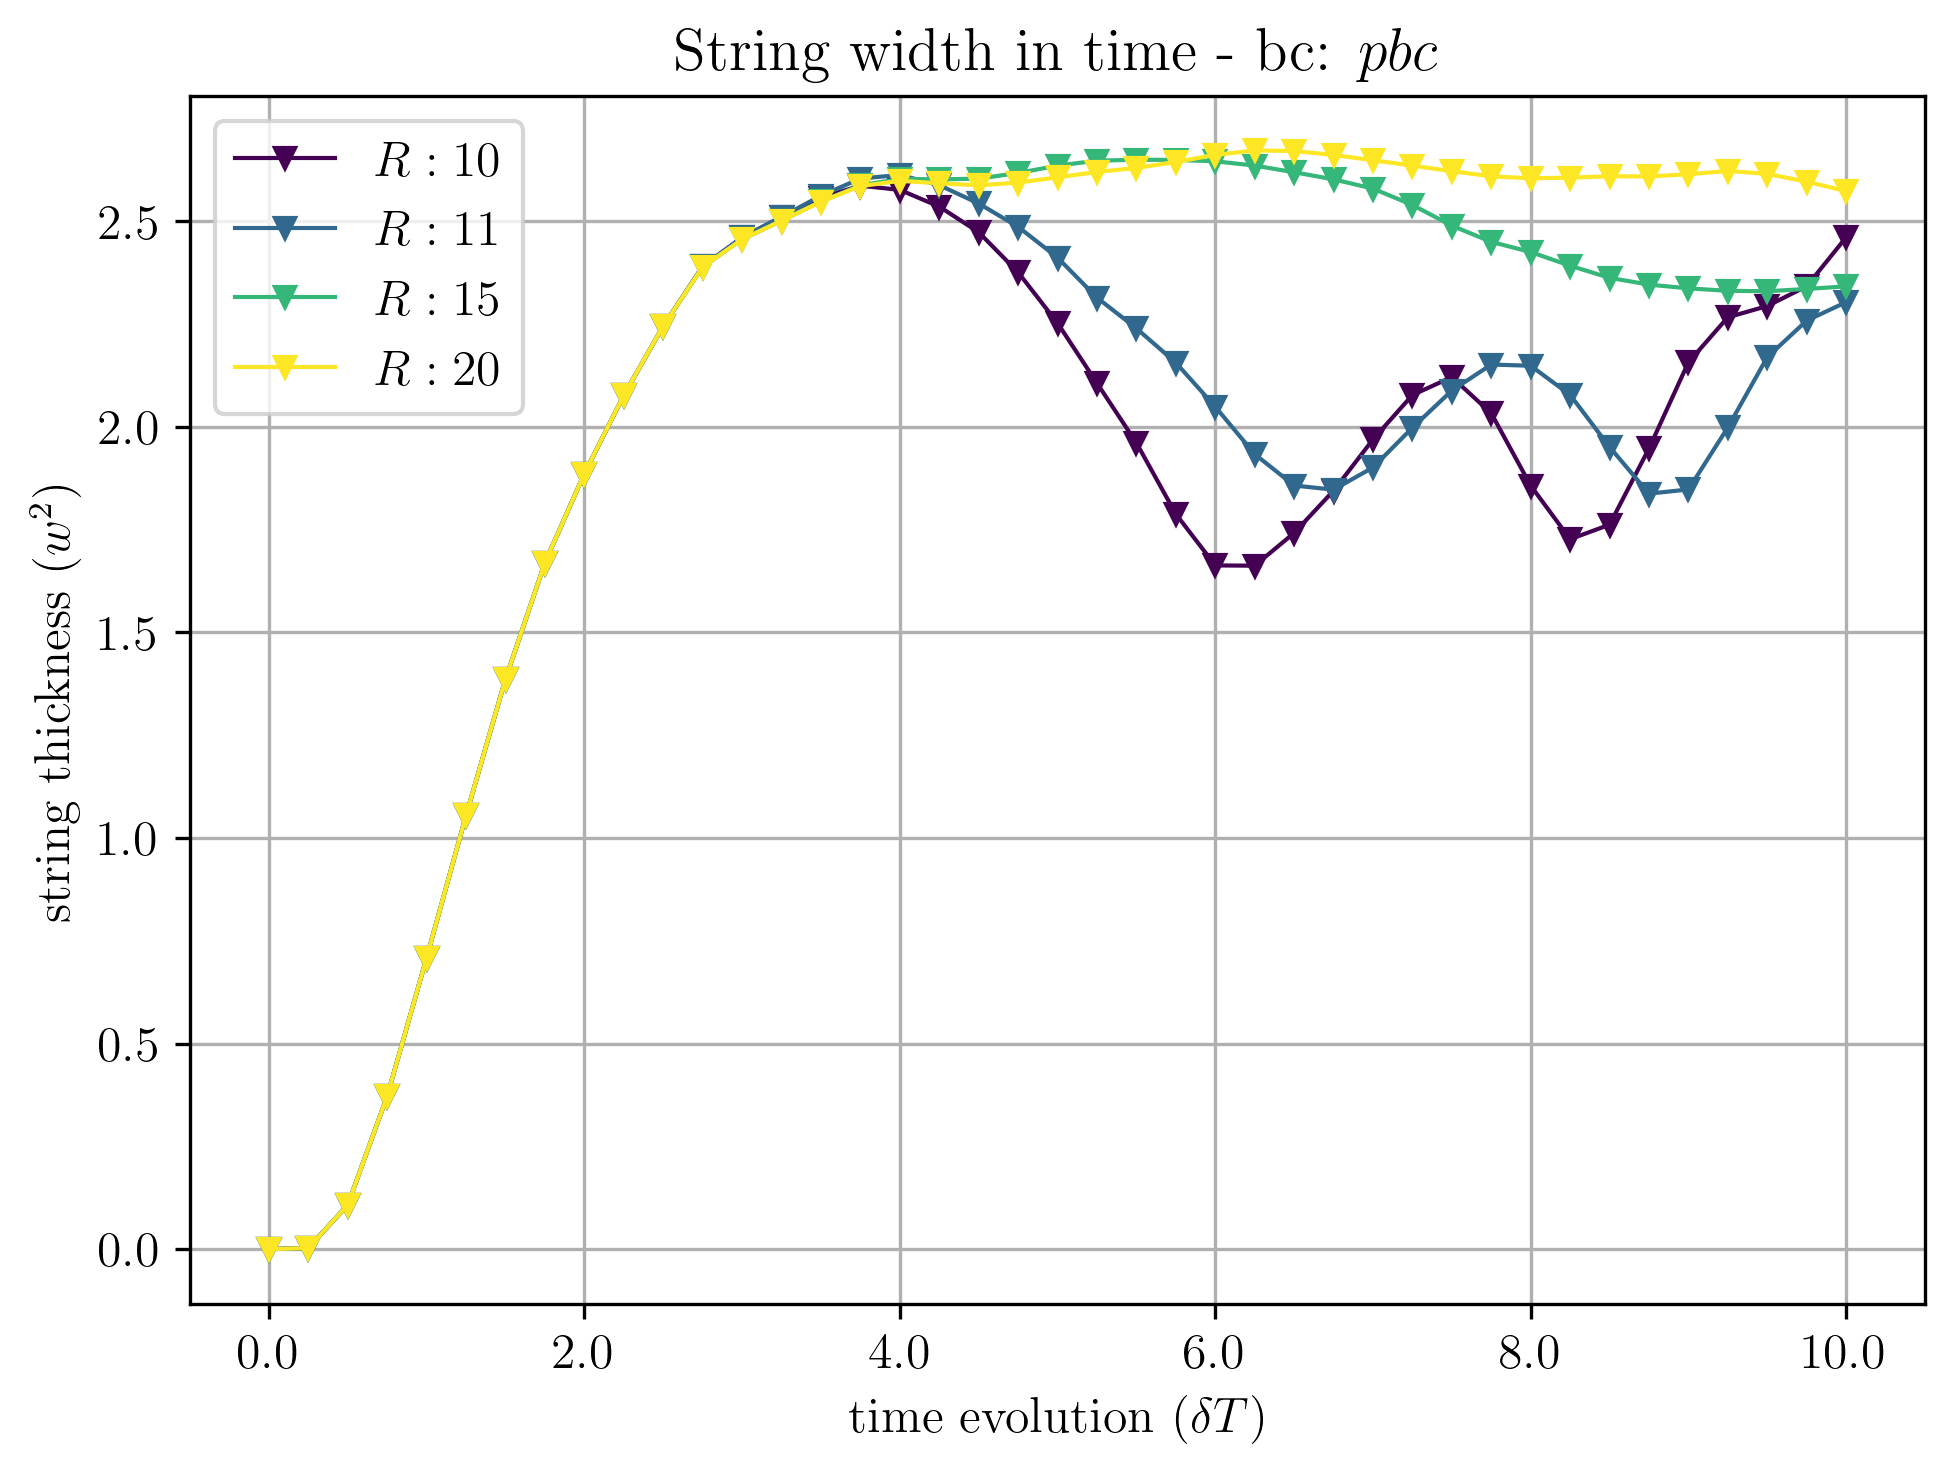

In [231]:
h_i, h_ev = 0.70, 0.70
h_i, h_ev = 0.80, 0.80
delta, steps = 0.05, 200
chi = 128
of = 0.2
# of = 0.4
Rs = [10,11,15,20]
# Rs = [12,13,14]
colors = create_sequential_colors(len(Rs))

for i, R in enumerate(Rs):
    # ws_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
    # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
    ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$R: {R}$")
    # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
plt.title(f"String width in time - bc: ${bc}$")
plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/string_width_evolution_different_Rs_{model}_{l}x{L}_{bc}_{sector}_R_{Rs}_h_ev_{h_ev}_delta_{delta}_steps_{steps}.png")


### Entropy

In [232]:
npoints, h_i, h_f = 1, 0.8, 0.8
interval = np.linspace(h_i,h_f,npoints)
gs = interval
l = 6
R_vac = 0
chis = [128]
Rss = [10,11,15,20]
colors = create_sequential_colors(len(Rss))
g = 0.8
idx = 0
# g, idx = find_closest_value(interval=gs, g=g)
entr_g_chi = []
for chi in chis:
    entr_g = []
    for i, R in enumerate(Rss):
        # bc = "obc"
        # s_obc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path_tensor)
        bc = "pbc"
        s_pbc = entropy(R,l,L,chi,bc,sector,h_i,h_f,npoints,path_tensor)
        # plt.plot(gs,s_obc, marker="p", color=colors[i], linewidth=1, markersize=5, linestyle='-', label=f"$l \\times L: {l}\\times{L}$")
        # plt.plot(gs,s_pbc, color=colors[i], linewidth=1, markersize=5, linestyle='-', label=f"$l \\times L: {l}\\times{L}$")
        entr_g.append(s_pbc[idx])
    entr_g_chi.append(entr_g)

entr_g_chi

[[0.45458425308508255,
  0.47653099505033963,
  0.5567349903666801,
  0.6302066931700909]]

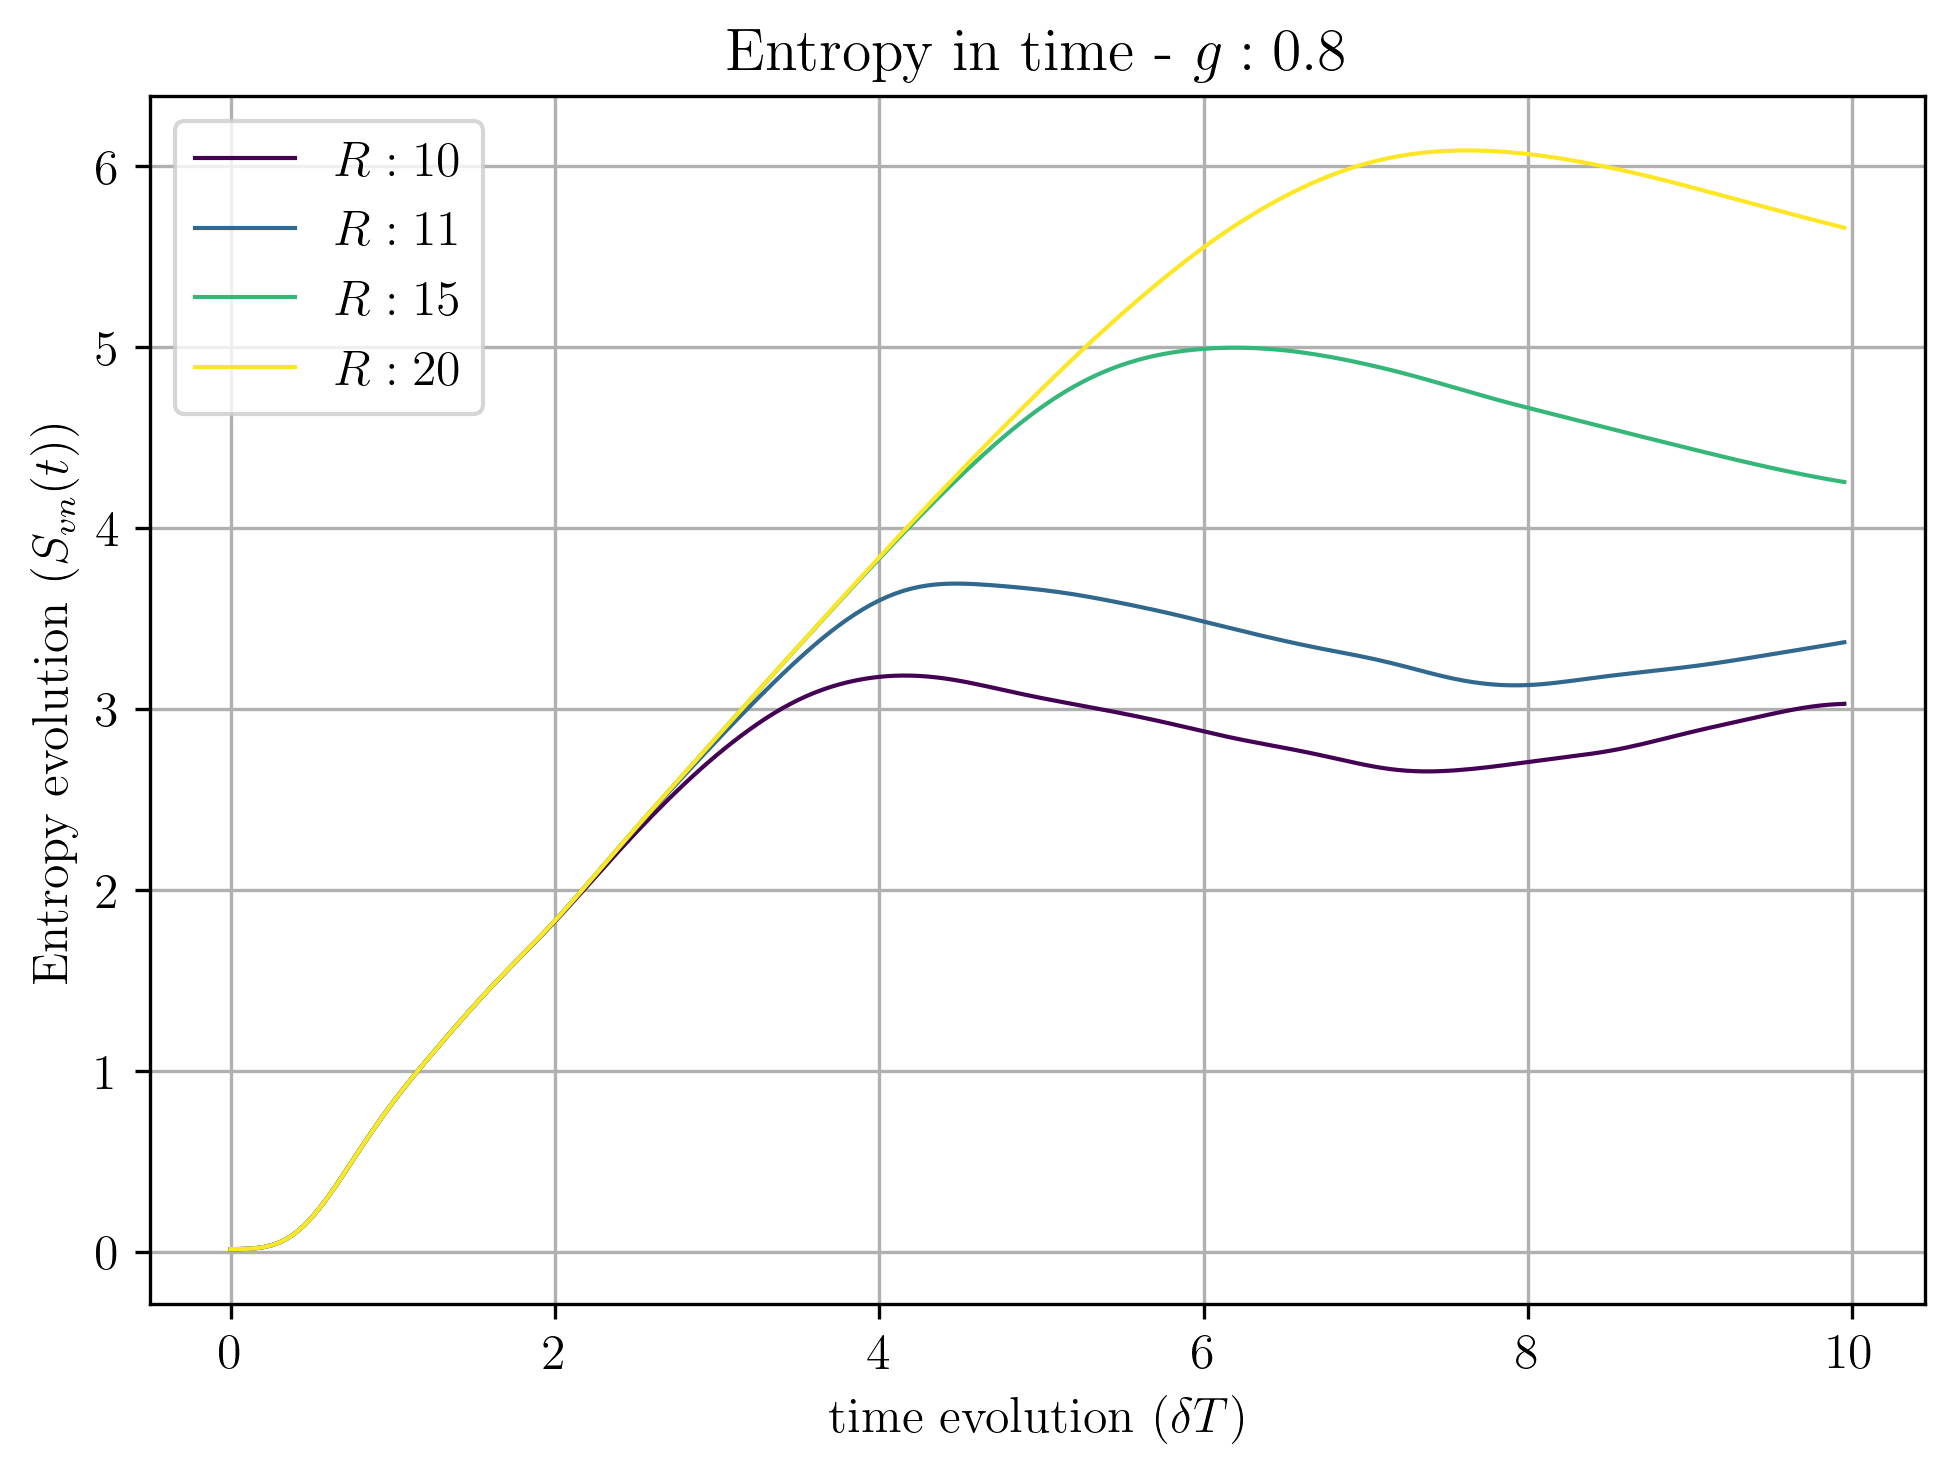

In [233]:
h_i, h_ev = 0.8, 0.8
chi = 256
l = 6
Rs = [10,11,15,20]
# Rs = [10]
colors = create_sequential_colors(len(Rs))

saturation_idx = []
for i, R in enumerate(Rs):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    # entr_t, err_t = time_entropy_exact(R,l,L,chis,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = entr_t[1:]
    saturation_idx.append(np.argmax(obs))
    # obs_err = err_t[1:] + err_t[1] 
    # plt.hlines(y=entr_g_chi[-1][i], xmin=0, xmax=(delta*np.arange(steps))[-1], colors=colors[i], linestyles='--', linewidths=1, label=f"$R: {R}$, gs limit")
    plt.plot(delta*np.arange(steps), obs, color=colors[i], linestyle="-", linewidth=1, label=f"$R: {R}$")
    # plt.vlines(x=R/4 + np.log(R), ymin=0, ymax=6, colors='k', linestyles="--", linewidths=1)
    # plt.fill_between(delta*np.arange(steps), y1=np.asarray(obs)+np.asarray(obs_err),y2=np.asarray(obs)-np.asarray(obs_err), color=colors[i], alpha=0.4)

plt.title(f"Entropy in time - $g: {h_ev}$")
# plt.xticks(ticks=(delta*np.arange(steps))[::steps//5], labels=delta*np.linspace(0,steps,steps)[::int((steps/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/entropy/entropy_evolution_different_R_{model}_{l}x{L}_{bc}_{sector}_R_{Rs}_h_ev_{h_ev}_delta_{delta}_steps_{steps}.png")


### Derivative

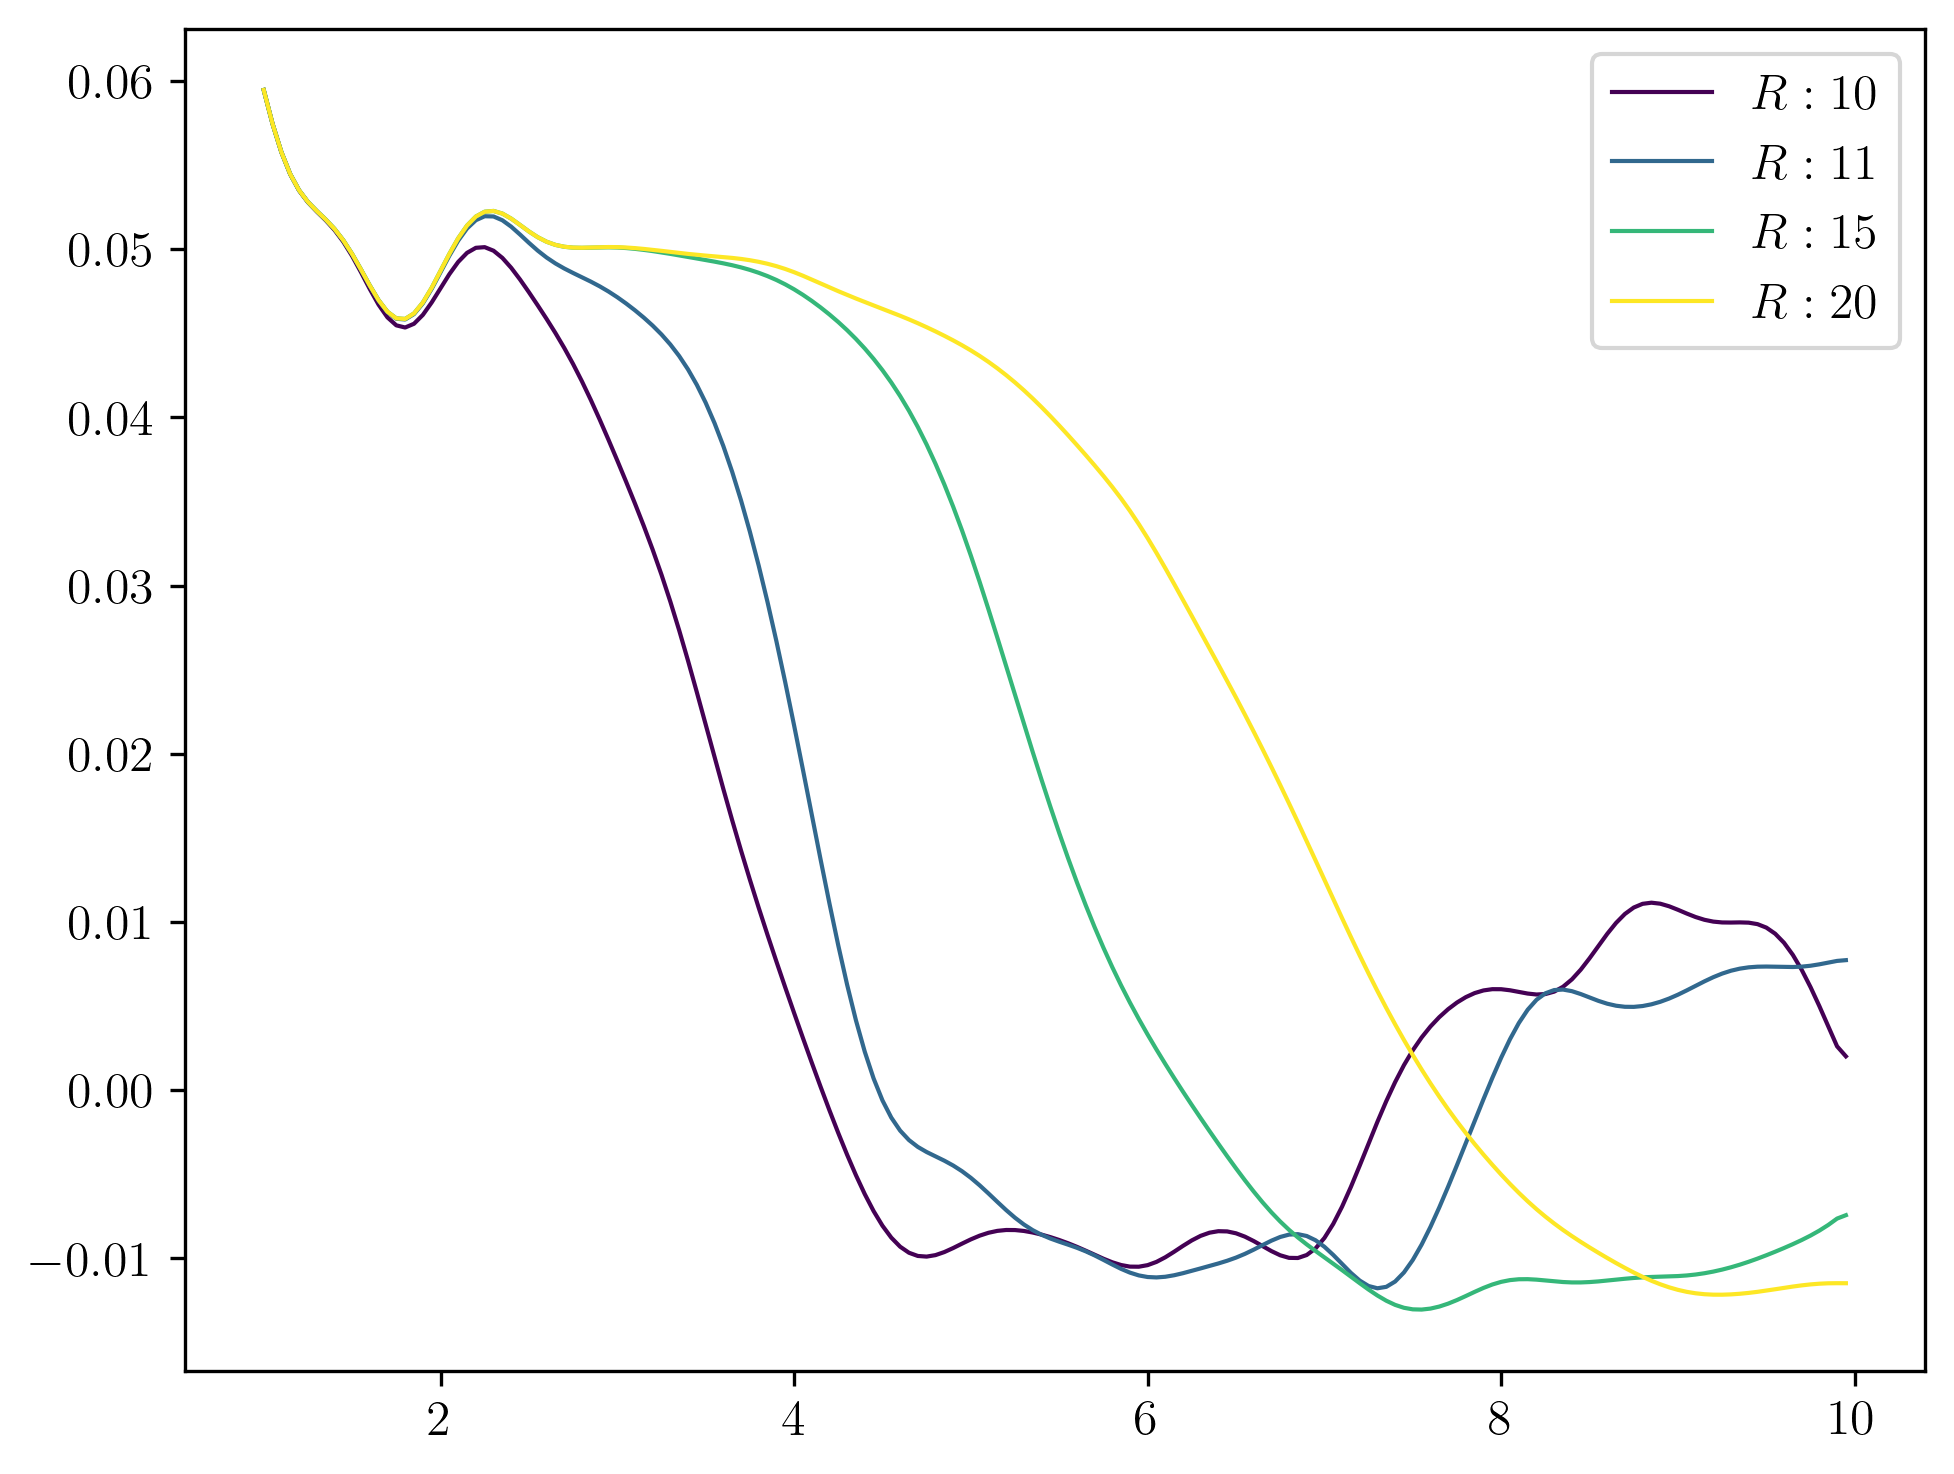

In [234]:
for i, R in enumerate(Rs):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = entr_t[1:]
    plt.plot(delta*np.arange(steps)[20:], np.gradient(obs)[20:], color=colors[i], linestyle="-", linewidth=1, label=f"$R: {R}$")
plt.legend()

### Extract Saturation of entropy with R

[4.15 4.45 6.2  7.6 ] [0.35241935 0.66612903] [0.02612579 0.37994844]
0.2617993877991494


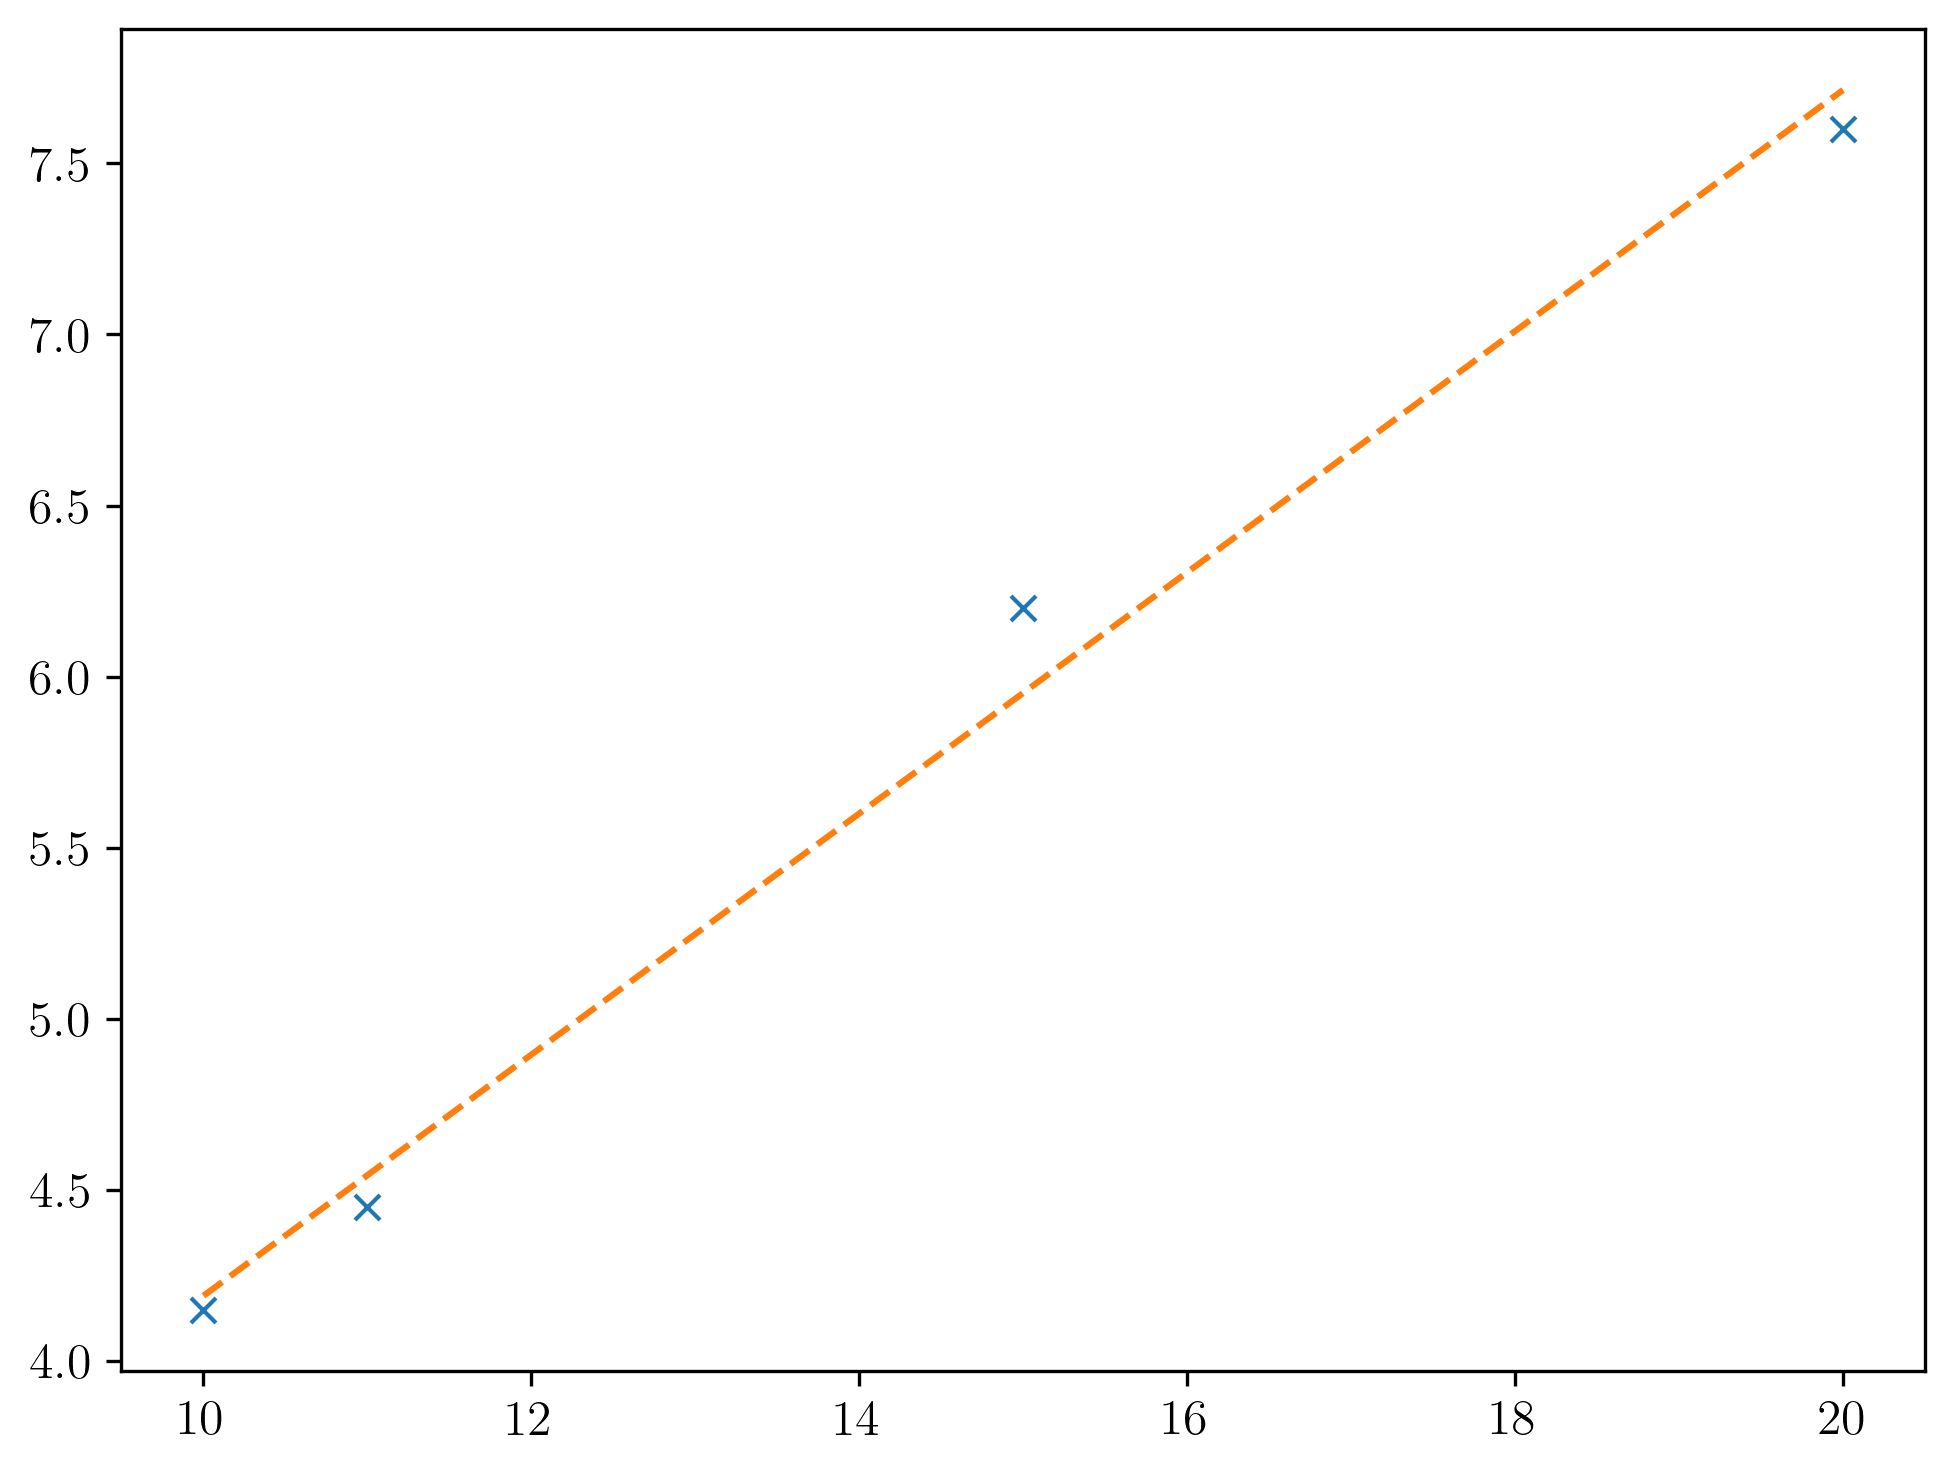

In [235]:
saturation_times = delta*np.arange(steps)[saturation_idx]

def saturation_eq(R, a, b):
    return a*R + b

x_data = Rs
y_data = saturation_times

popt, copt = curve_fit(saturation_eq, x_data, y_data)

print(saturation_times, popt, np.sqrt(np.diag(copt)))
print(np.pi/(6*2))
xs = np.linspace(Rs[0], Rs[-1])
plt.plot(Rs, saturation_times, 'x')
plt.plot(xs, saturation_eq(xs, *popt), '--')

## Fix $R$, vary $g$

### String width

[-2, -1, 0, 1, 2, 3]


Text(0, 0.5, 'string thickness $(w^2)$')

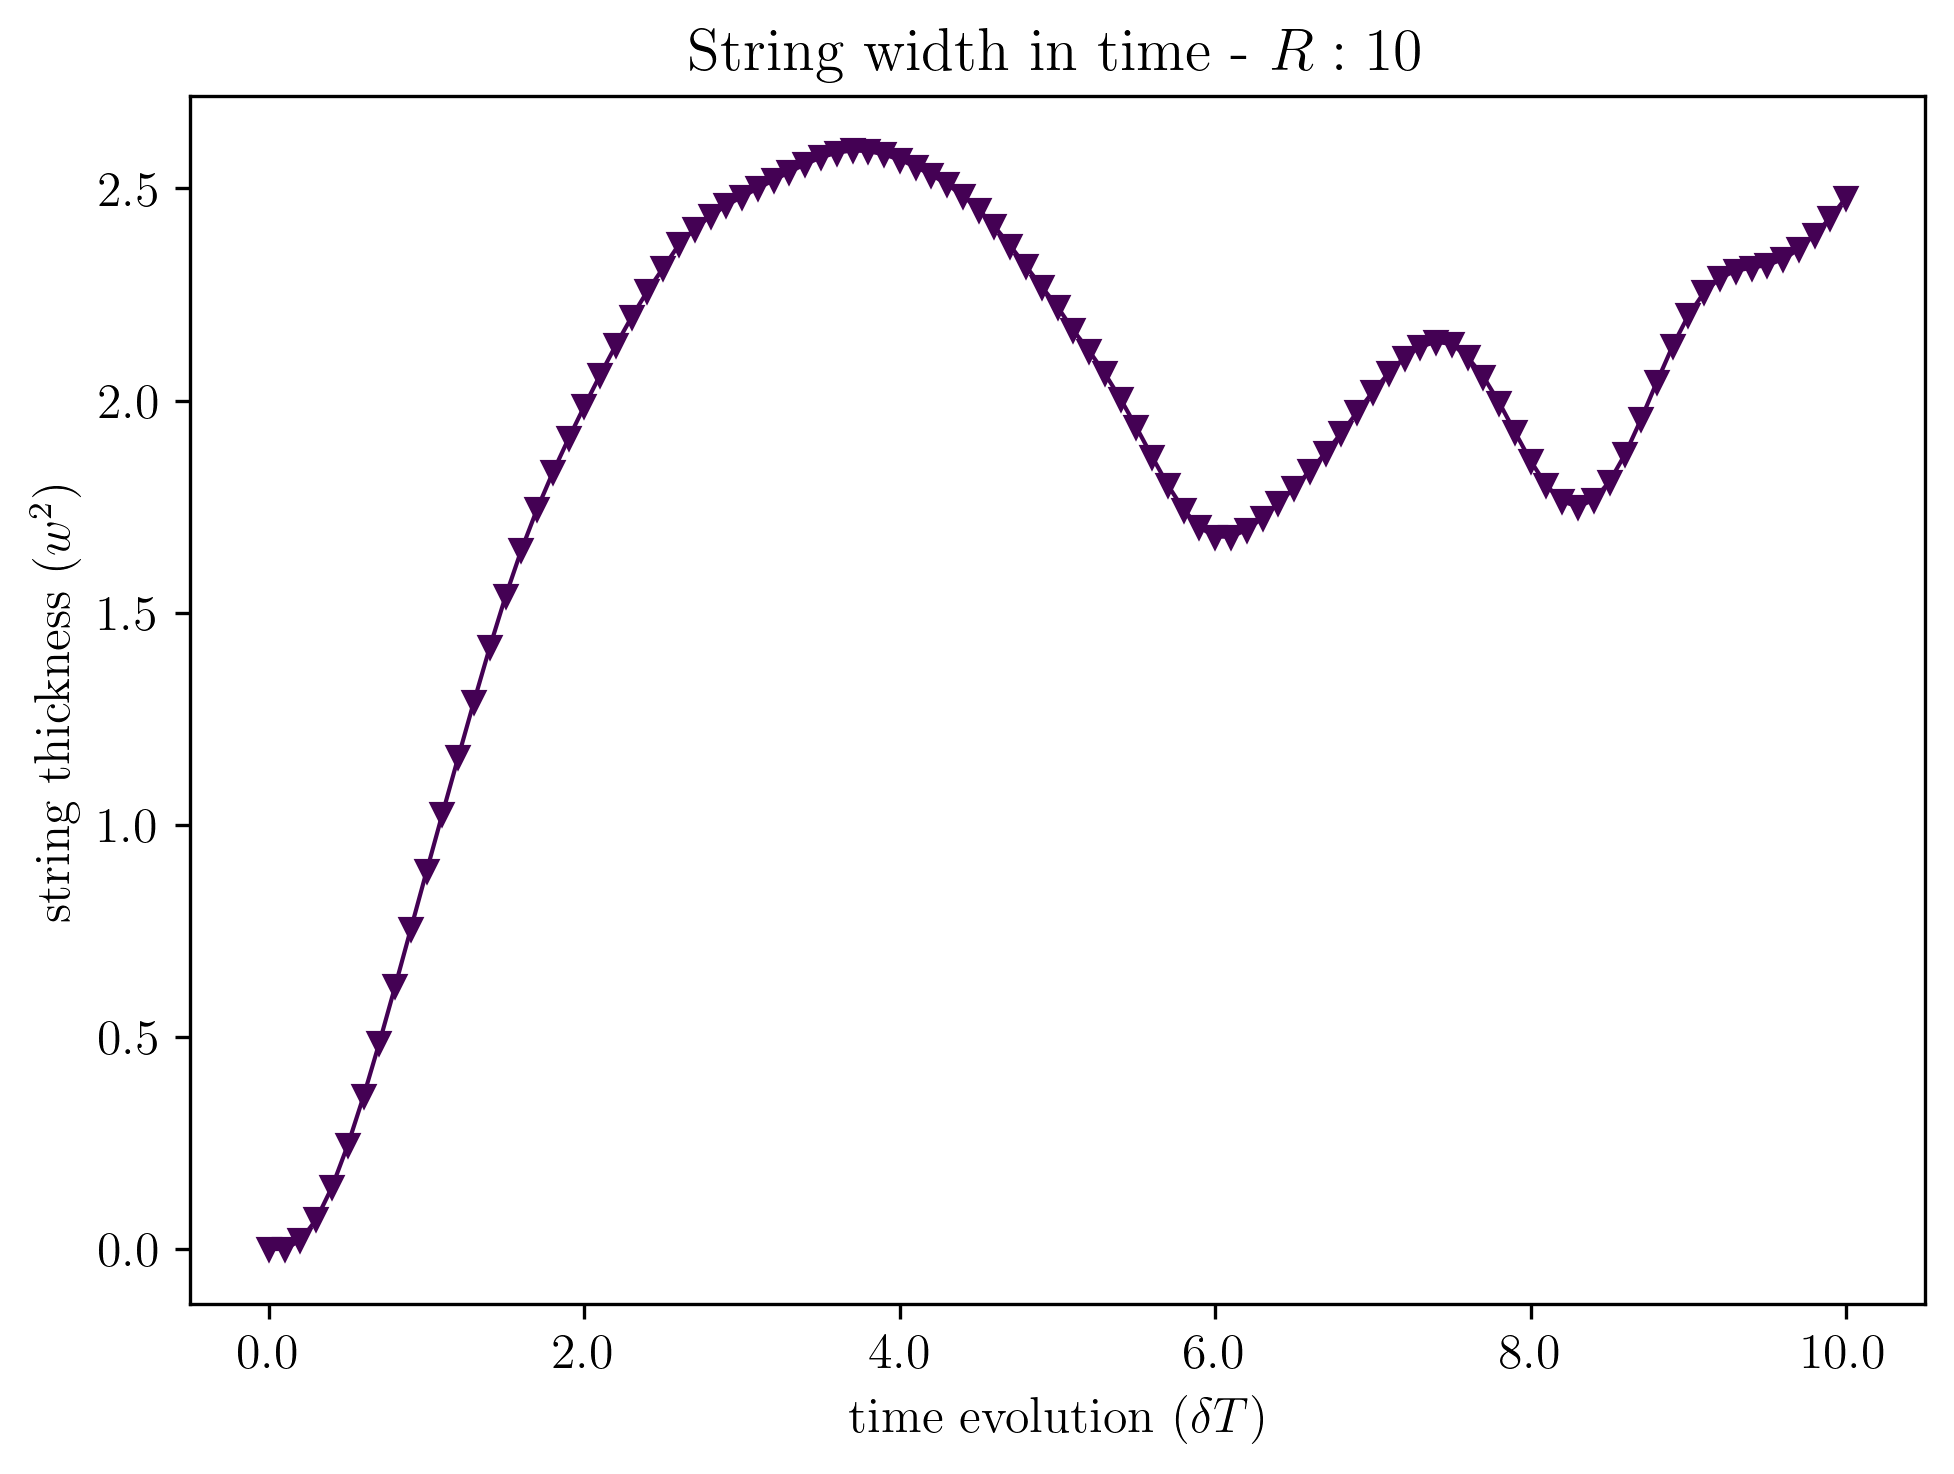

In [245]:
R = 10
# chis = [64,128]
# chi = 128
of = 0.2

l = 5
l = 6

his = [ 0.75, 0.8]
his = [0.8]
delta = 0.02
# delta = 0.01
# steps = 200
# steps = 400
steps = 500

colors = create_sequential_colors(6)

ws_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    # ws_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
    # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
    ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    ws_g_rough.append(ws_t)
    plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color=colors[j], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
    # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
plt.title(f"String width in time - $R: {R}$")
plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")

# delta = 0.02
# steps = 200
# his = [0.9, 1.0, 1.2]
# his = [0.9, 1.0]

# ws_g_conf = []
# for i, h_i in enumerate(his):
#     h_ev = h_i
#     # ws_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
#     # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
#     ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
#     ws_g_conf.append(ws_t)
#     ws_t[0] = 1
#     plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color=colors[i+j+1], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
#     # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
# plt.grid(True)
# plt.legend()
# plt.savefig(f"{path_figures}/figures/fluxtube/string_width_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_evs_{his}_delta_{delta}_steps_{steps}_chi_{chi}.png")

In [237]:
ws_t

[1,
 0.0005743903210744267,
 0.02075470547269981,
 0.06991460106530975,
 0.14645114730081932,
 0.24541944848154046,
 0.36045123242235316,
 0.48634637593089736,
 0.6191412715406049,
 0.7551445379565233,
 0.8912485504672965,
 1.0259300735298518,
 1.1591064921241596,
 1.2905354463392917,
 1.418190361238521,
 1.5382767993489623,
 1.6472153702110277,
 1.7439751763462248,
 1.8306066832087446,
 1.91060885505802,
 1.986785838838833,
 2.060241985455739,
 2.1306728276653826,
 2.1970653463088983,
 2.25813588149399,
 2.3125628099482225,
 2.3677036966165446,
 2.404922006416429,
 2.435031163506683,
 2.4596309768463254,
 2.4807018423583695,
 2.5001541364625783,
 2.5193408538140605,
 2.5385985582983155,
 2.55705915984422,
 2.572937128417684,
 2.5842033887190974,
 2.5893247380327993,
 2.5877566459179087,
 2.580022398796752,
 2.567366253586098,
 2.5511083799104726,
 2.531955209803438,
 2.509577027686638,
 2.482699501395214,
 2.449793477062765,
 2.410163910471981,
 2.364828890864025,
 2.3164190489926653,

### Slope of string width

slope for g: 0.75 is a: 1.098
slope for g: 0.9 is a: 0.964
slope for g: 1.0 is a: 0.853


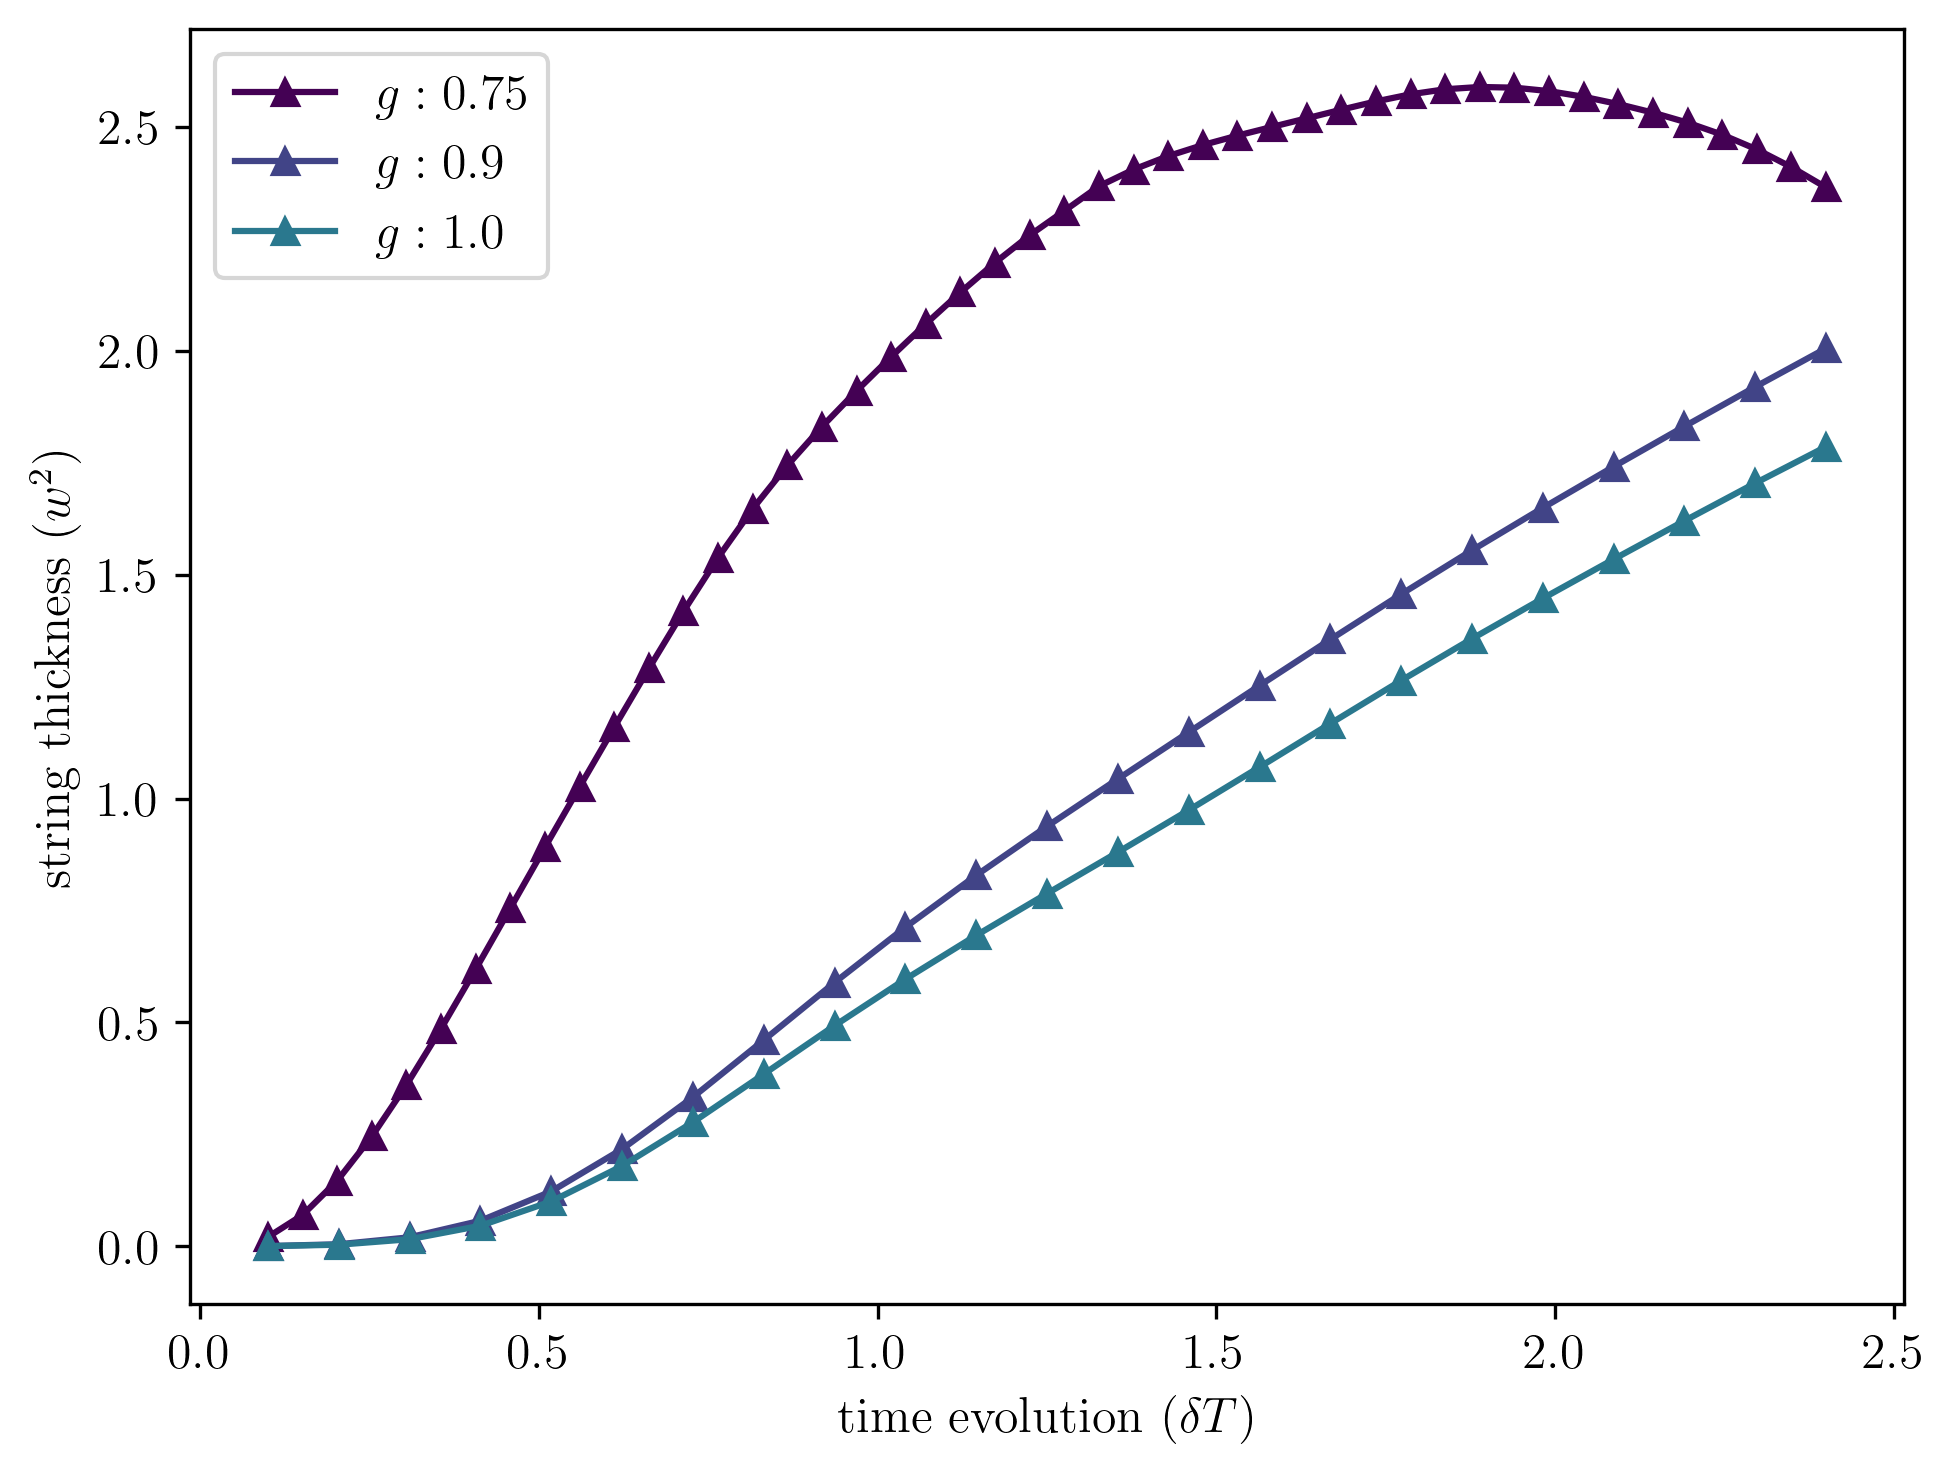

In [238]:
slope_interval = [0.1,2.4] # in g

def lin_func(x,a,b):
    return a*x + b

delta = 0.01
steps = 400
his = [ 0.75, 0.8]
where_slope = np.argwhere([i if g in slope_interval else 0 for i,g in enumerate(delta*np.arange((steps)+1))])
xs = np.linspace(slope_interval[0], slope_interval[1], int(where_slope[1,0]*of)-int(where_slope[0,0]*of))
for j, ws_t in enumerate(ws_g_rough):
    ys = ws_t[int(where_slope[0,0]*of):int(where_slope[1,0]*of)]
    plt.plot(xs, ys, marker='^', color=colors[j], label=f"$g: {his[j]}$")
    popt, cov = curve_fit(lin_func, xs, ys)
    print(f"slope for g: {his[j]} is a: {popt[0]:.3f}")

delta = 0.02
steps = 200
his = [0.9, 1.0, 1.2]
where_slope = np.argwhere([i if g in slope_interval else 0 for i,g in enumerate(delta*np.arange((steps)+1))])
xs = np.linspace(slope_interval[0], slope_interval[1], int(where_slope[1,0]*of)-int(where_slope[0,0]*of))
for i, ws_t in enumerate(ws_g_conf):
    ys = ws_t[int(where_slope[0,0]*of):int(where_slope[1,0]*of)]
    plt.plot(xs, ys, marker='^', color=colors[i+j+1], label=f"$g: {his[i]}$")
    popt, cov = curve_fit(lin_func, xs, ys)
    print(f"slope for g: {his[i]} is a: {popt[0]:.3f}")

plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")
plt.legend()

### Entropy

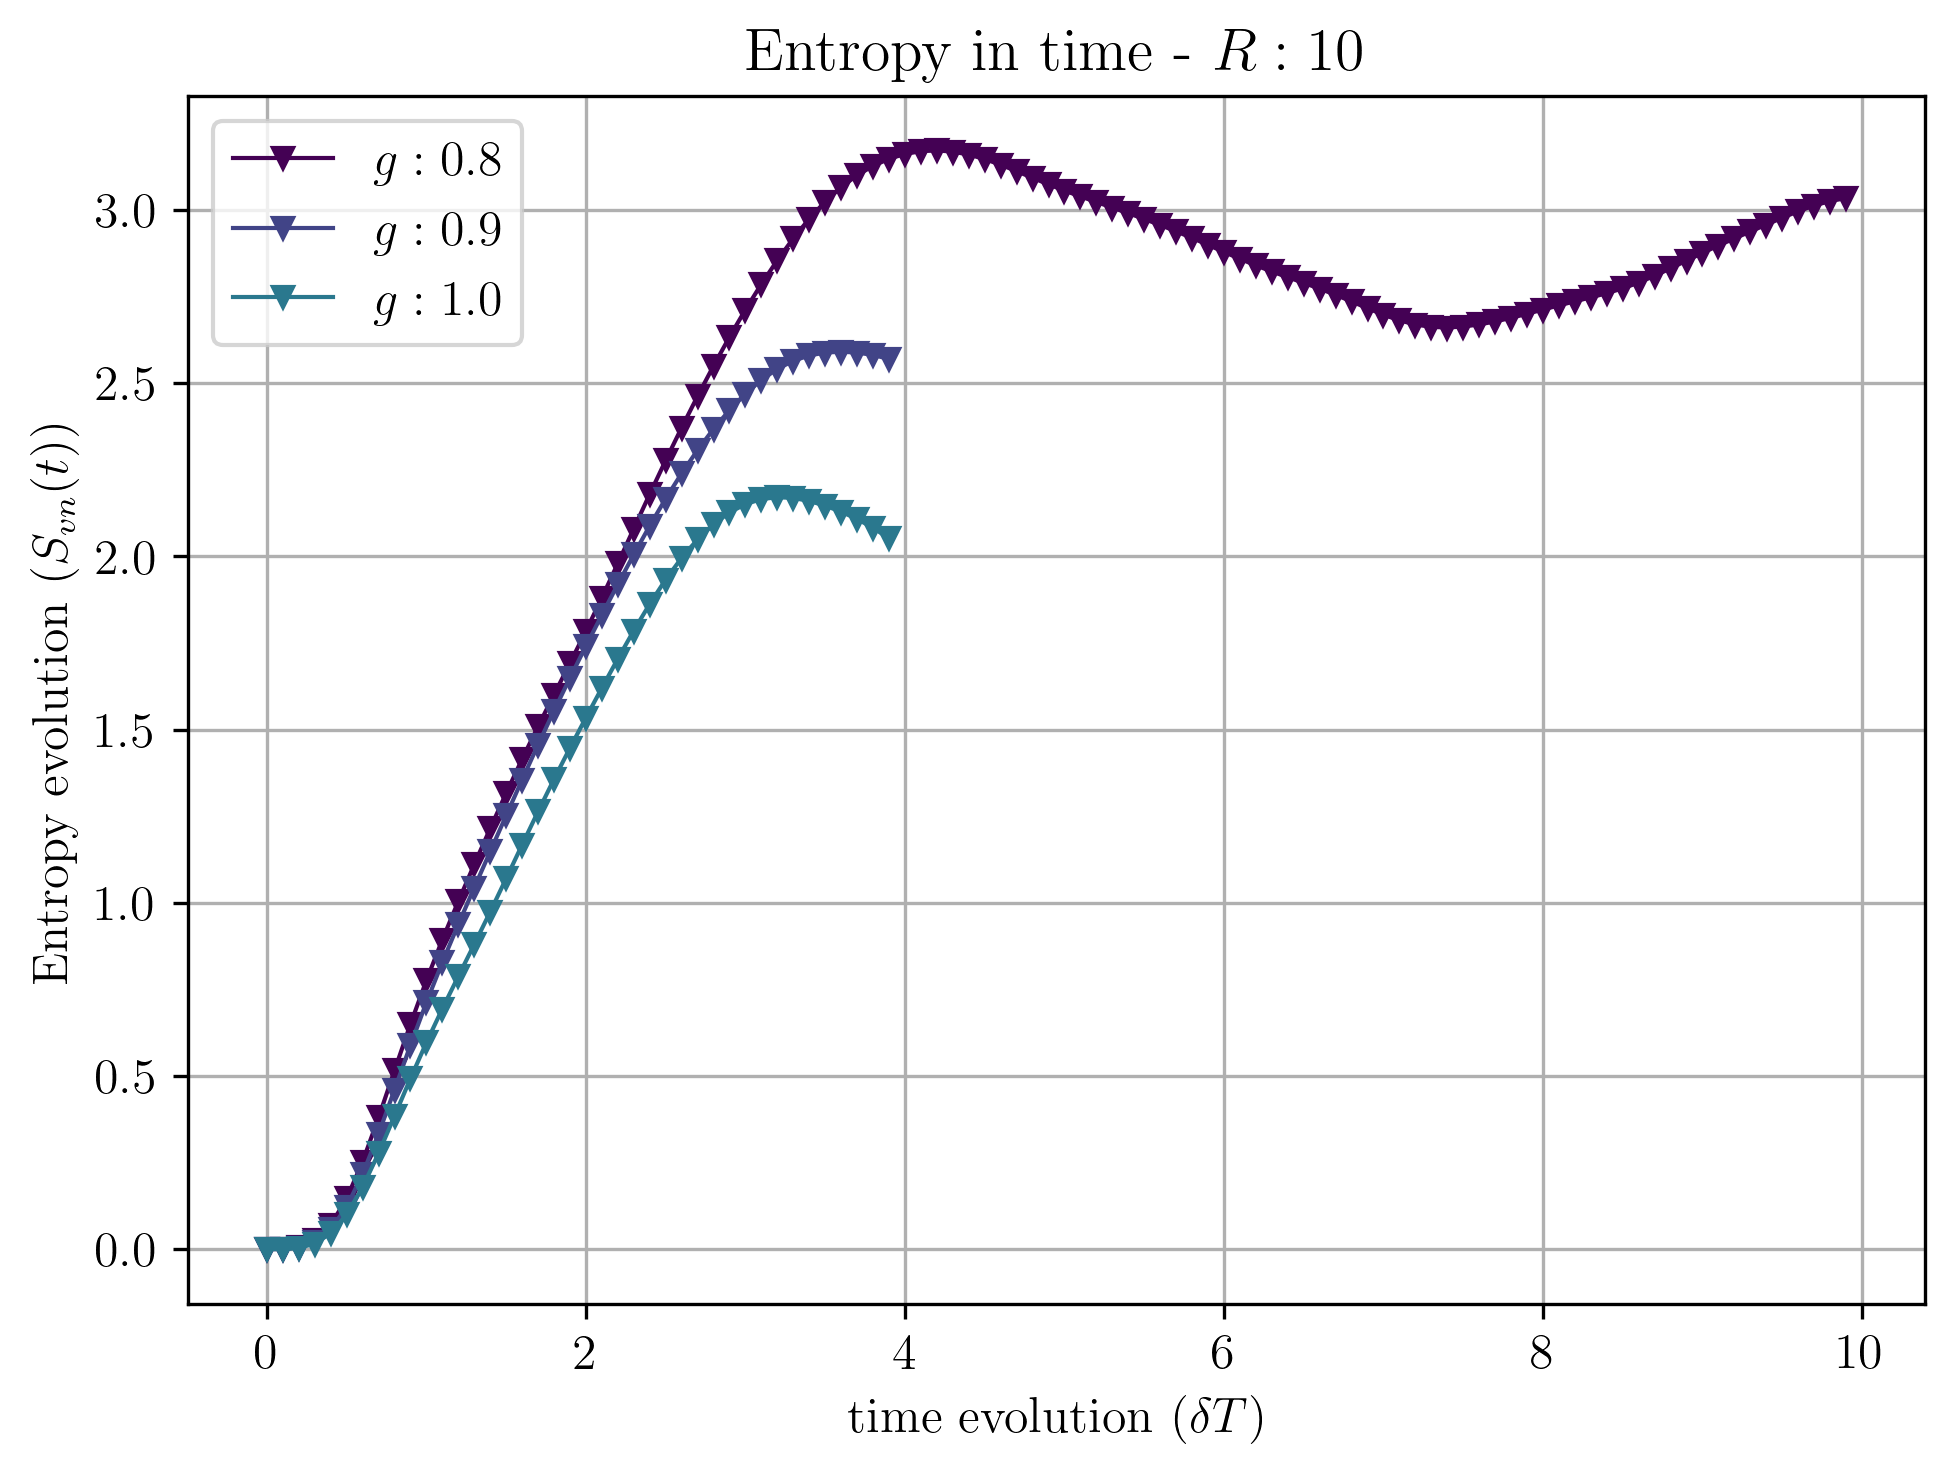

In [246]:
R = 10
# chis = [64,128]
# chi = 128
of = 0.2

l = 5
l = 6

his = [0.75, 0.8]
his = [0.8]
delta = 0.01
delta = 0.02
steps = 400
steps = 500

colors = create_sequential_colors(6)

entr_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    # entr_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    entr_g_rough.append(obs)
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, marker='v', markersize=5, color=colors[j], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
    # plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(entr_t)+np.asarray(err_t),y2=np.asarray(entr_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
plt.title(f"Entropy in time - $R: {R}$")
# plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")


delta = 0.02
steps = 200
his = [0.9, 1.0]
# his = [0.9, 1.0]

entr_g_conf = []
for i, h_i in enumerate(his):
    h_ev = h_i
    # entr_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    entr_g_conf.append(obs)
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, marker='v', markersize=5, color=colors[i+j+1], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
    # plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(entr_t)+np.asarray(err_t),y2=np.asarray(entr_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/entropy/entropy_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_evs_{his}_delta_{delta}_steps_{steps}_chi_{chi}.png")

# his = [0.7, 0.75, 0.8]
# R = 10
# colors = create_sequential_colors(len(his))
# chis = [64,128]
# of = 0.2
# steps = 400
# for i, h_i in enumerate(his):
#     h_ev = h_i
#     entr_t, err_t = time_entropy_exact(R,l,L,chis,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
#     obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
#     obs_err = (err_t[1:] + err_t[1])[::int(1/of)] 
#     plt.plot(delta*np.arange(steps)[::int(1/of)], obs, markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
#     plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(obs)+np.asarray(obs_err),y2=np.asarray(obs)-np.asarray(obs_err), color=colors[i], alpha=0.4)
# plt.title(f"Entropy in time - $R: {R}$")
# # plt.xticks(ticks=(delta*np.arange(steps))[::steps//5], labels=delta*np.linspace(0,steps,steps)[::int((steps/5)])
# plt.xlabel("time evolution $(\\delta T)$")
# plt.ylabel("Entropy evolution $(S_{vn}(t))$")
# plt.grid(True)
# plt.legend()

In [240]:
entr_g_rough

[array([0.00000000e+00, 5.60548246e-04, 5.87265143e-03, 2.53666449e-02,
        6.99972257e-02, 1.46419391e-01, 2.52913652e-01, 3.80134816e-01,
        5.15852909e-01, 6.49788947e-01, 7.76125942e-01, 8.93641301e-01,
        1.00422578e+00, 1.11066584e+00, 1.21472745e+00, 1.31646798e+00,
        1.41490940e+00, 1.50942042e+00, 1.60088787e+00, 1.69172722e+00,
        1.78455741e+00, 1.88072843e+00, 1.97985566e+00, 2.08027070e+00,
        2.17991915e+00, 2.27724544e+00, 2.37153957e+00, 2.46258036e+00,
        2.55006876e+00, 2.63348206e+00, 2.71230021e+00, 2.78618314e+00,
        2.85488530e+00, 2.91797296e+00, 2.97469599e+00, 3.02424573e+00,
        3.06614324e+00, 3.10041561e+00, 3.12746553e+00, 3.14779722e+00,
        3.16181759e+00, 3.16979297e+00, 3.17193816e+00, 3.16853512e+00,
        3.16001247e+00, 3.14704283e+00, 3.13064508e+00, 3.11213857e+00,
        3.09289829e+00, 3.07402918e+00, 3.05612936e+00, 3.03925030e+00,
        3.02305165e+00, 3.00705221e+00, 2.99083253e+00, 2.974110

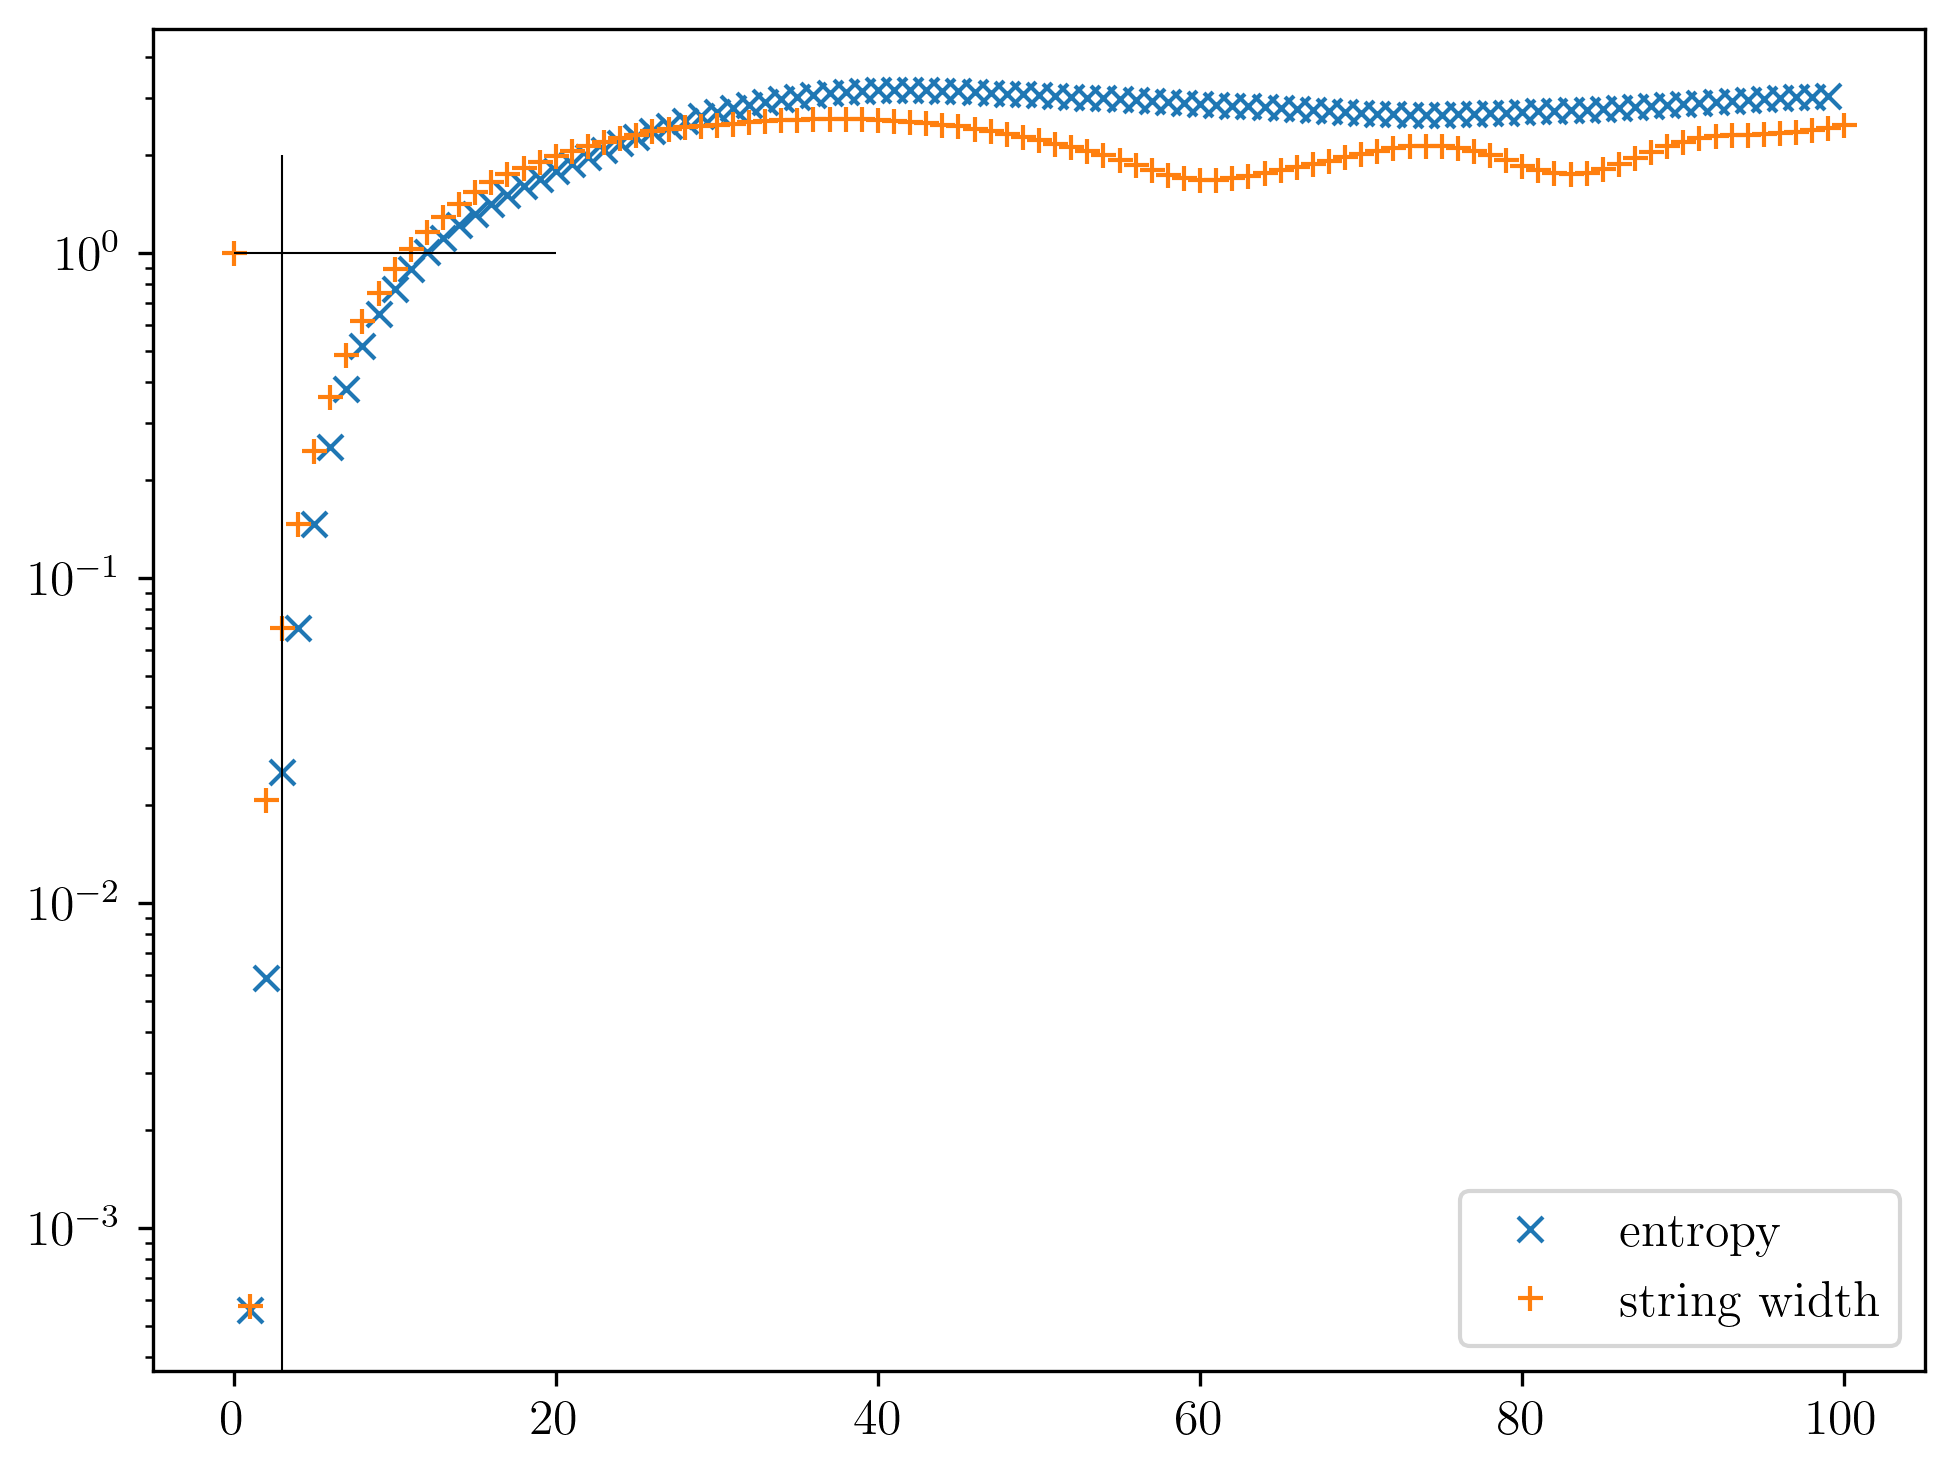

In [241]:
plt.plot(entr_g_rough[0], 'x', label="entropy")
plt.plot(ws_g_rough[0], '+', label="string width")
plt.vlines(x=3, ymin=0, ymax=2, linewidth=0.5, color='k')
plt.hlines(y=1, xmin=0, xmax=20, linewidth=0.5, color='k')
plt.yscale('log')
plt.legend()

### Slope of Entropy

slope for g: 0.75 is a: 0.885
slope for g: 0.9 is a: 0.917
slope for g: 1.0 is a: 0.853


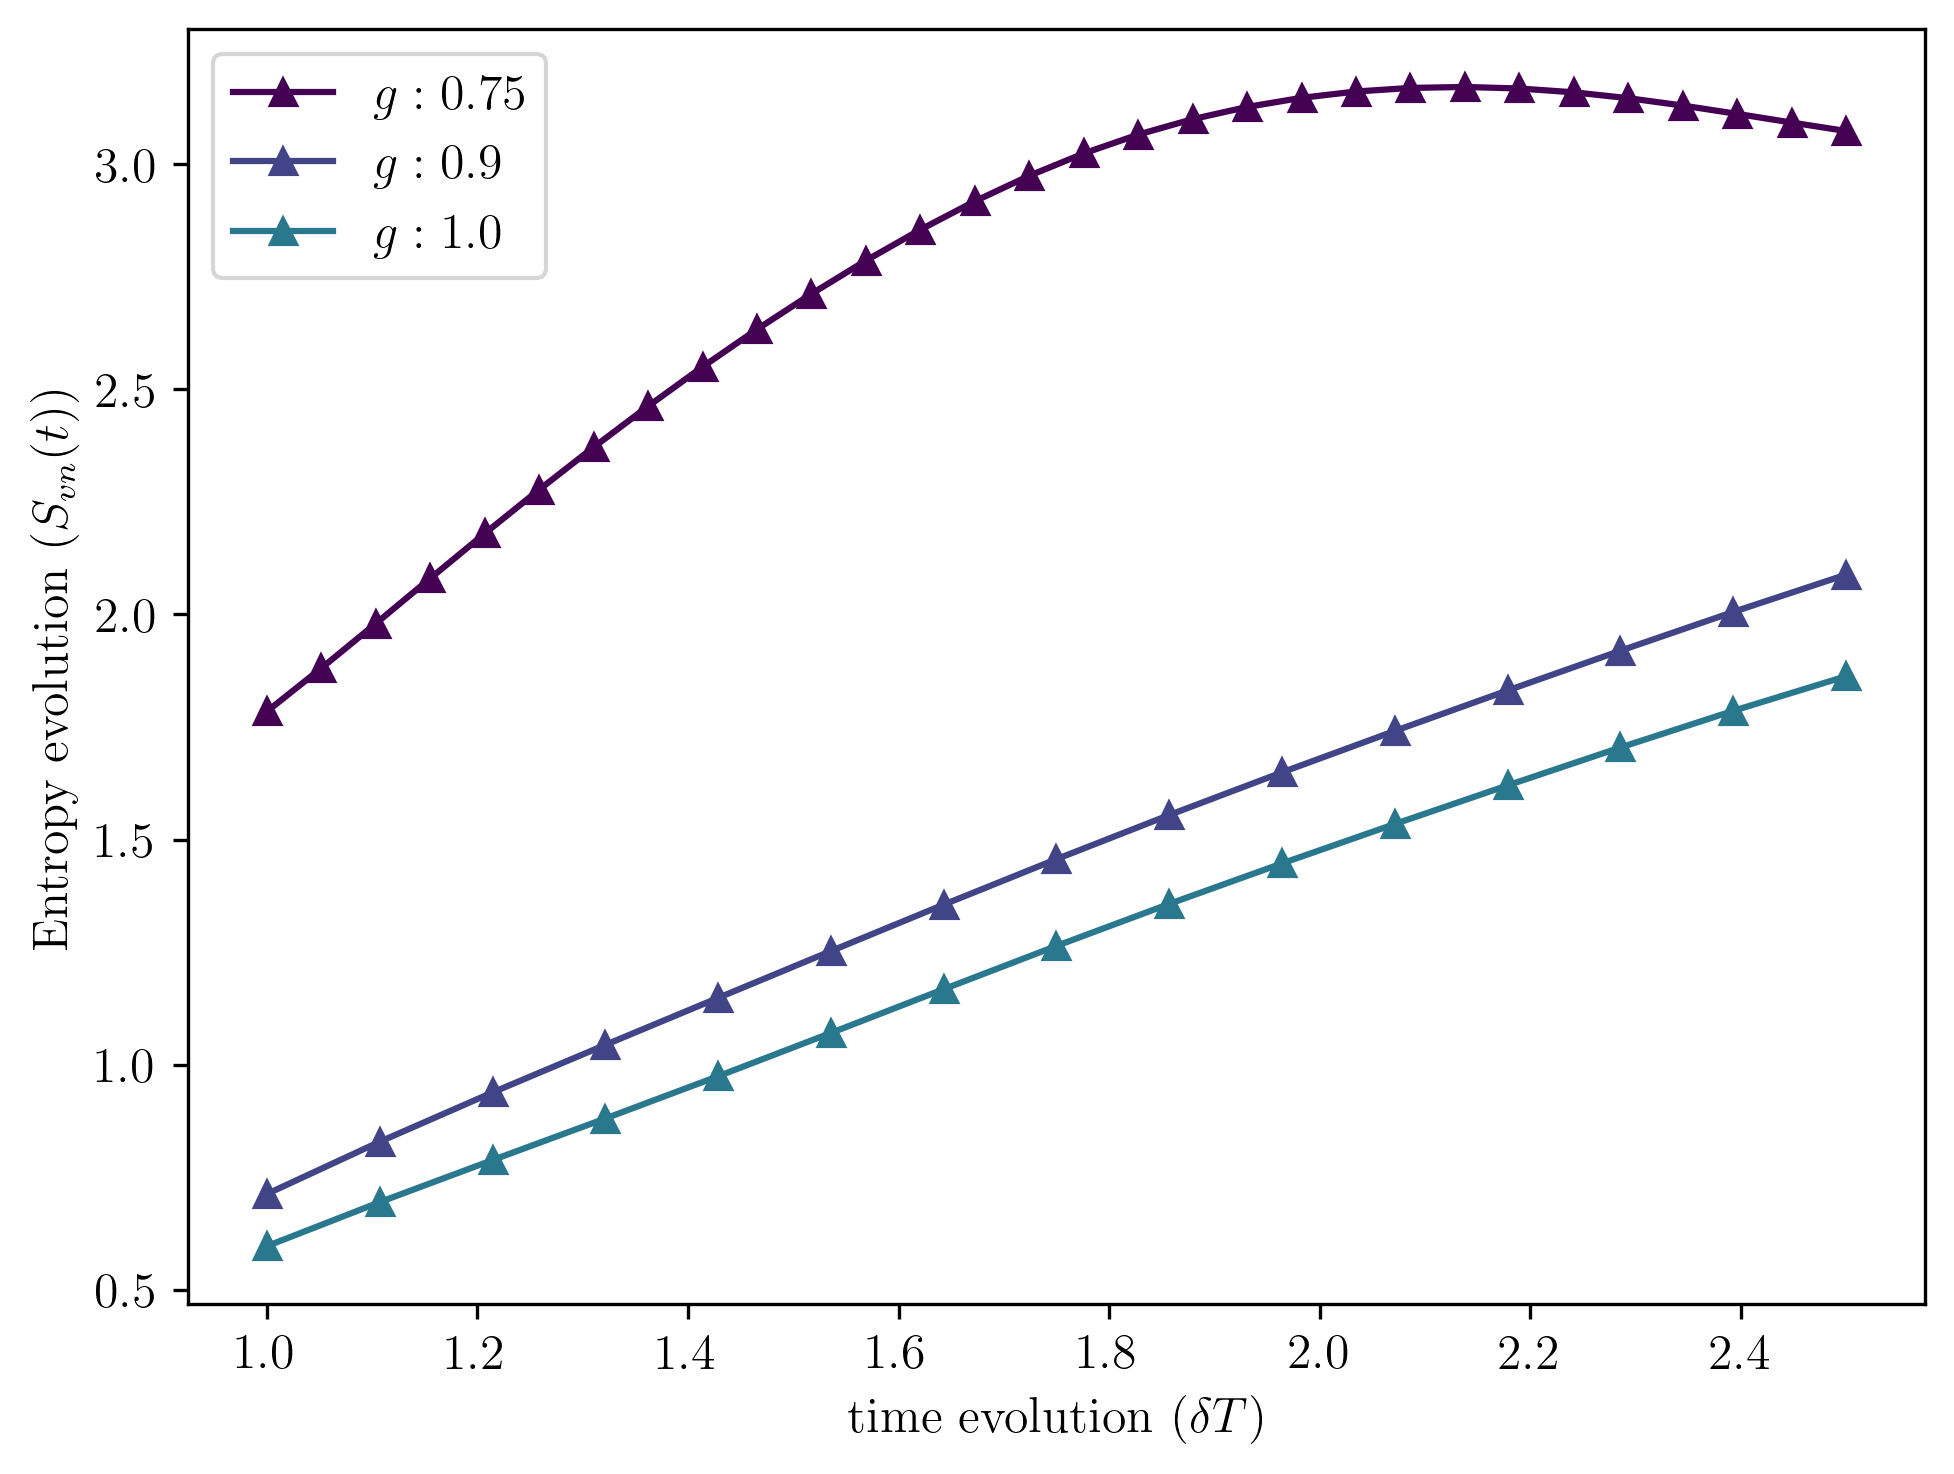

In [242]:
slope_interval = [1,2.5] # in g
c = 1
def lin_func(x,a,b):
    return a*x + b

delta = 0.01
# delta = 0.02
steps = 400
# steps = 500
his = [ 0.75, 0.8]
# his = [0.8]
slopes = []
slopes_err = []
where_slope = np.argwhere([i if g in slope_interval else 0 for i,g in enumerate(delta*np.arange((steps)+1))])
xs = np.linspace(slope_interval[0], slope_interval[1], int(where_slope[1,0]*of)-int(where_slope[0,0]*of))
for j, ws_t in enumerate(entr_g_rough):
    ys = ws_t[int(where_slope[0,0]*of):int(where_slope[1,0]*of)]
    plt.plot(xs, ys, marker='^', color=colors[j], label=f"$g: {his[j]}$")
    popt, cov = curve_fit(lin_func, xs, ys)
    err = np.sqrt(np.diag(cov))
    print(f"slope for g: {his[j]} is a: {popt[0]:.3f}")
    
    slopes.append(popt[0])
    slopes_err.append(err[0])
delta = 0.02
steps = 200
his = [0.9, 1.0, 1.2]
# his = [0.9, 1.0]
where_slope = np.argwhere([i if g in slope_interval else 0 for i,g in enumerate(delta*np.arange((steps)+1))])
xs = np.linspace(slope_interval[0], slope_interval[1], int(where_slope[1,0]*of)-int(where_slope[0,0]*of))
for i, ws_t in enumerate(entr_g_conf):
    ys = ws_t[int(where_slope[0,0]*of):int(where_slope[1,0]*of)]
    plt.plot(xs, ys, marker='^', color=colors[i+j+1], label=f"$g: {his[i]}$")
    popt, cov = curve_fit(lin_func, xs, ys)
    err = np.sqrt(np.diag(cov))
    print(f"slope for g: {his[i]} is a: {popt[0]:.3f}")
    slopes.append(popt[0])
    slopes_err.append(err[0])
    
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (6,) and (3,)

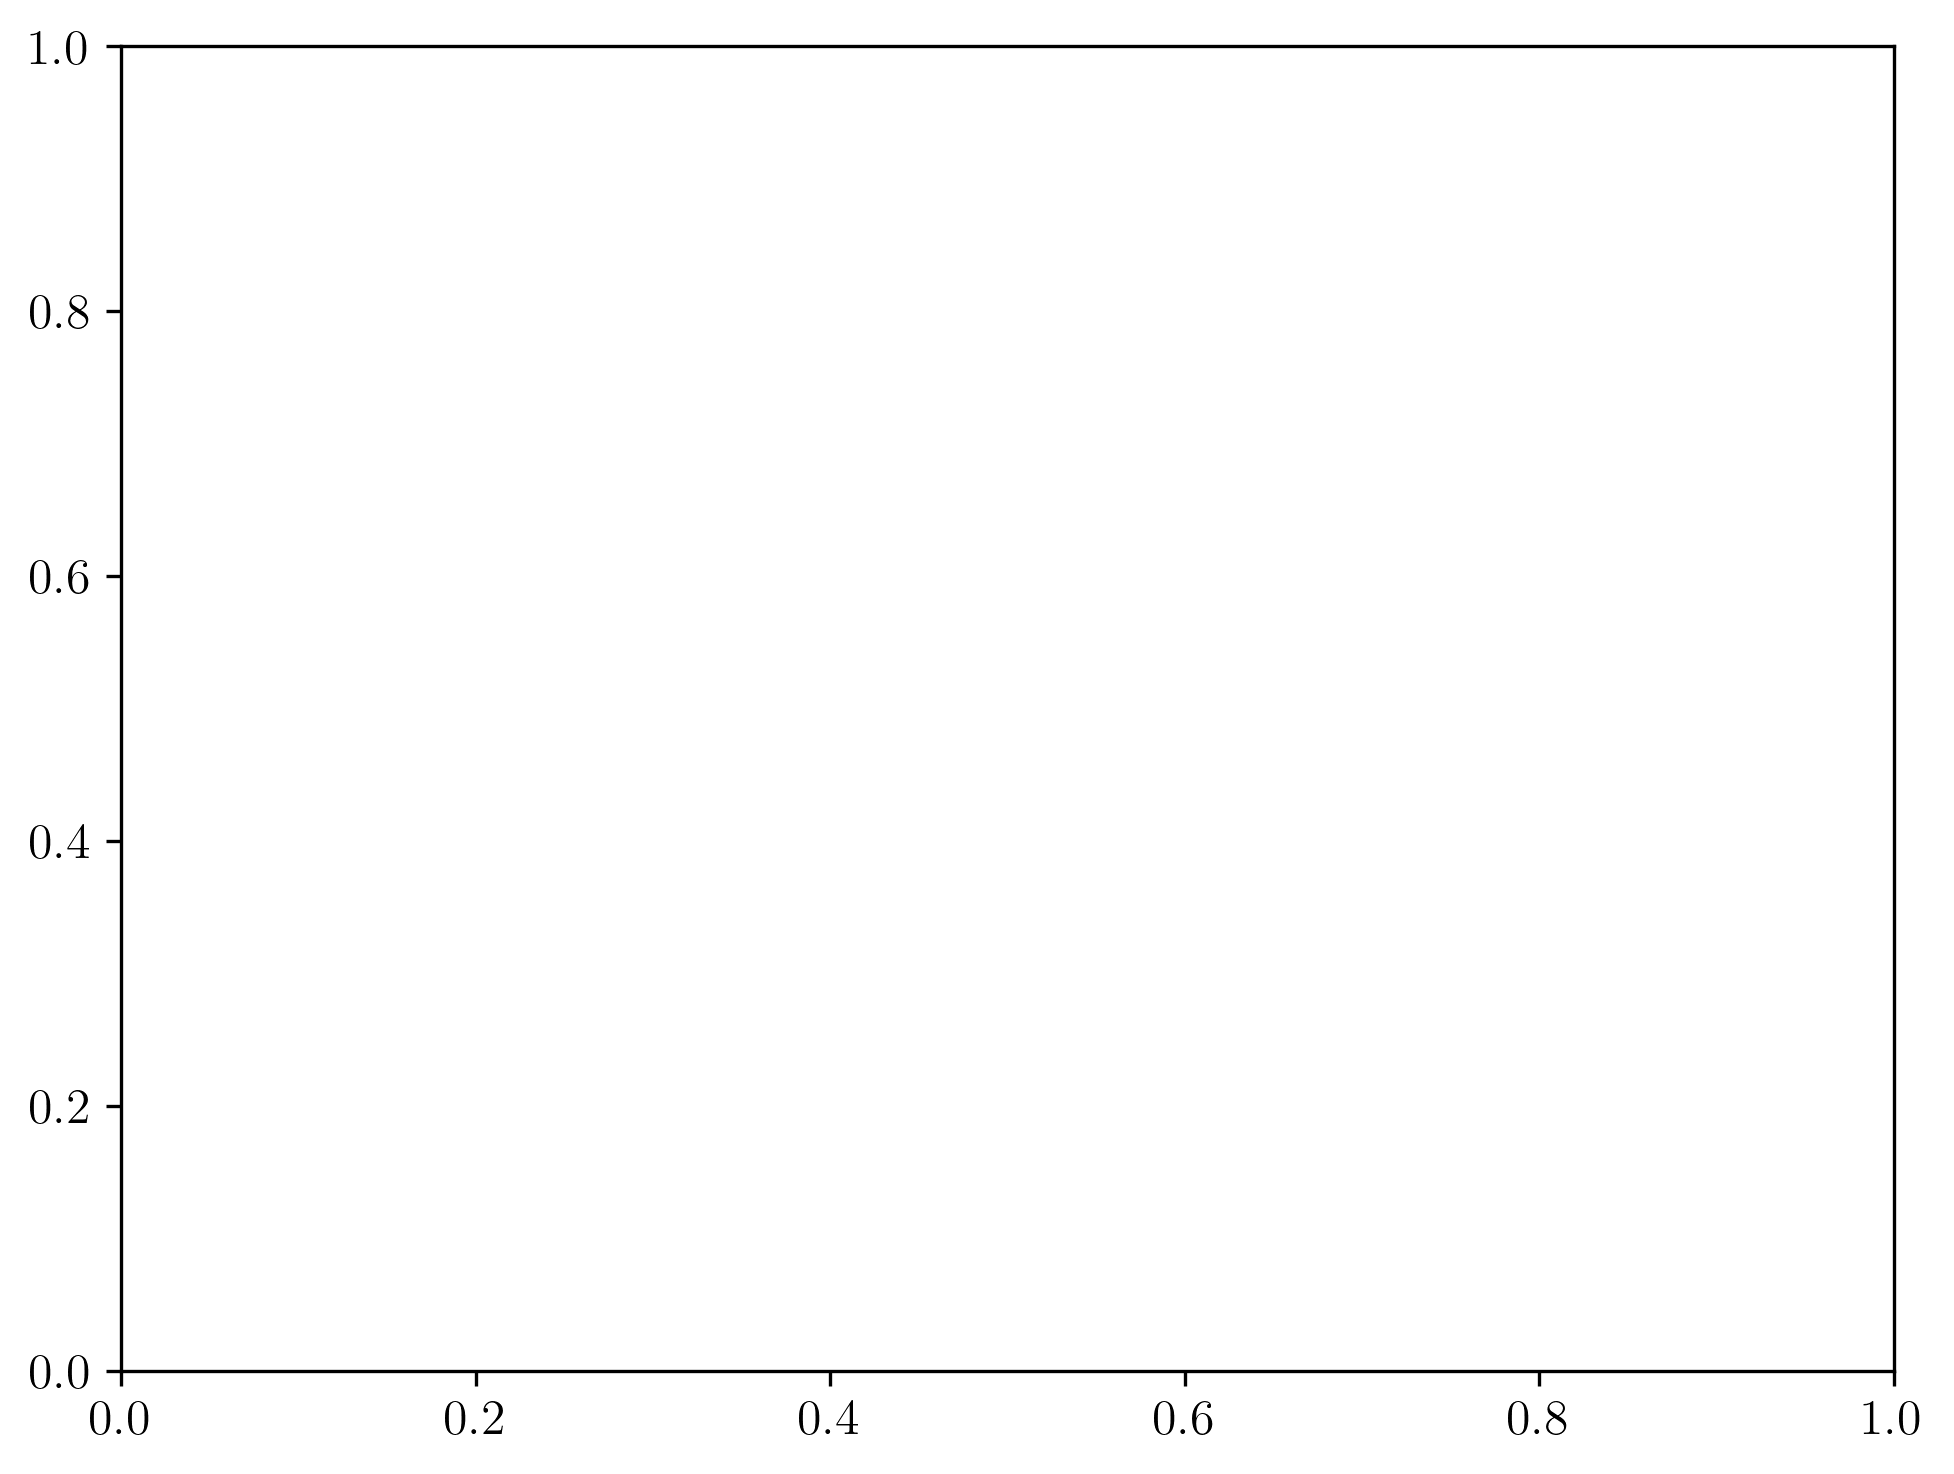

In [243]:
his = np.array([0.7,0.75,0.8,0.9,1.0,1.2])
plt.plot(his, slopes, 'x', label="data")
plt.fill_between(his, y1=np.asarray(slopes) + np.asarray(slopes_err), y2=np.asarray(slopes) - np.asarray(slopes_err), alpha=0.4)
plt.plot(his, np.pi*c/(6*his**2), '-', label="th")


g1 = np.array([(1-R/(l*L))*g0 for g0 in his])
print(1/g1**2)
def slope_guess(g0,g1,a,b,c):
    return a*1/g0**2+b*1/g1**2+c

print(1/popt[0]**2)
popt, cov = curve_fit(slope_guess, his, slopes)
plt.plot(his, slope_guess(his, *popt), label='fit')
plt.legend()

## Fix $g, R$, vary $l$

### String width

[-2, -1, 0, 1, 2]
[-3, -2, -1, 0, 1, 2, 3]


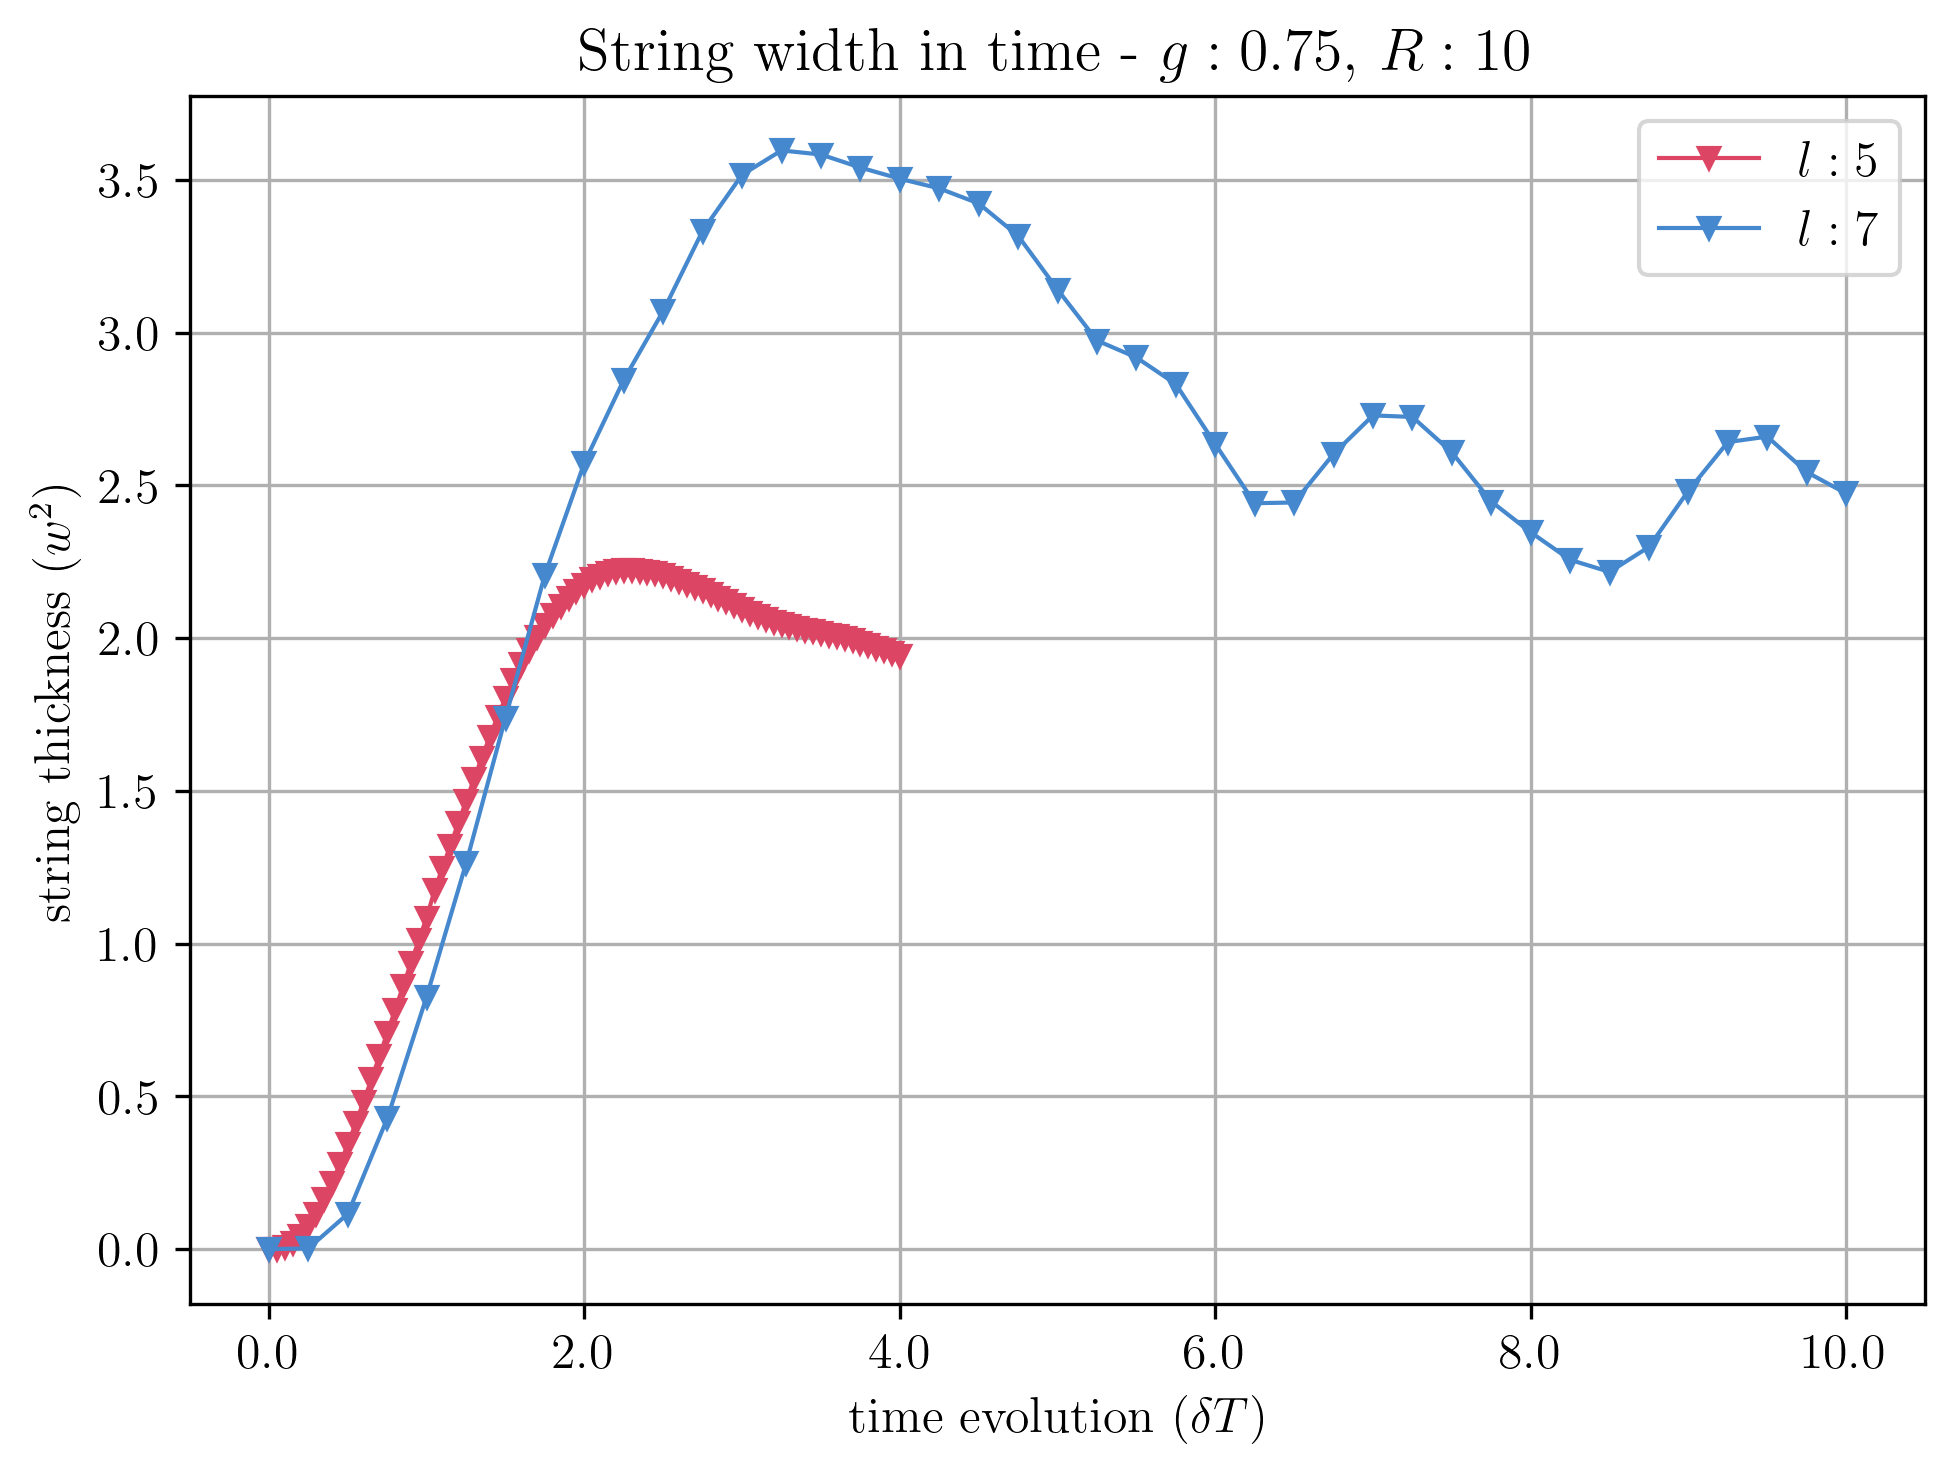

In [251]:
colors = ["#4688CE","#9B4DB7","#DC4563"]
colors.reverse()
lss = [5,6]
h_i = 0.8
h_ev = h_i
R = 10
chi = 128
of = 0.2
steps = 200
delta = 0.05

h_i = 0.9
h_i = 1.0
h_i = 0.8
h_i = 0.75
h_ev = h_i
R = 10
chi = 128
of = 0.2
steps = 400
delta = 0.01


ls = [5]

for i, l in enumerate(ls):
    # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
    ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$l: {l}$")
    # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)

steps = 200
delta = 0.05
ls = [7]

for i, l in enumerate(ls):
    # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
    ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color=colors[-1], linestyle="-", linewidth=1, label=f"$l: {l}$")
    # plt.plot((delta*np.arange((steps*of)+1))[:len(ws_t)//3+4], ws_t[:len(ws_t)//3+4], marker='v', markersize=5, color=colors[-1], linestyle="-", linewidth=1, label=f"$l: {l}$")
    # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)


plt.title(f"String width in time - $g: {h_i}$, $R: {R}$")
plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")
# plt.xlim(right=1)
# plt.ylim(top=4.2)
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/string_width_evolution_{model}_{lss}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{delta}_steps_{steps}.png")

### Entropy

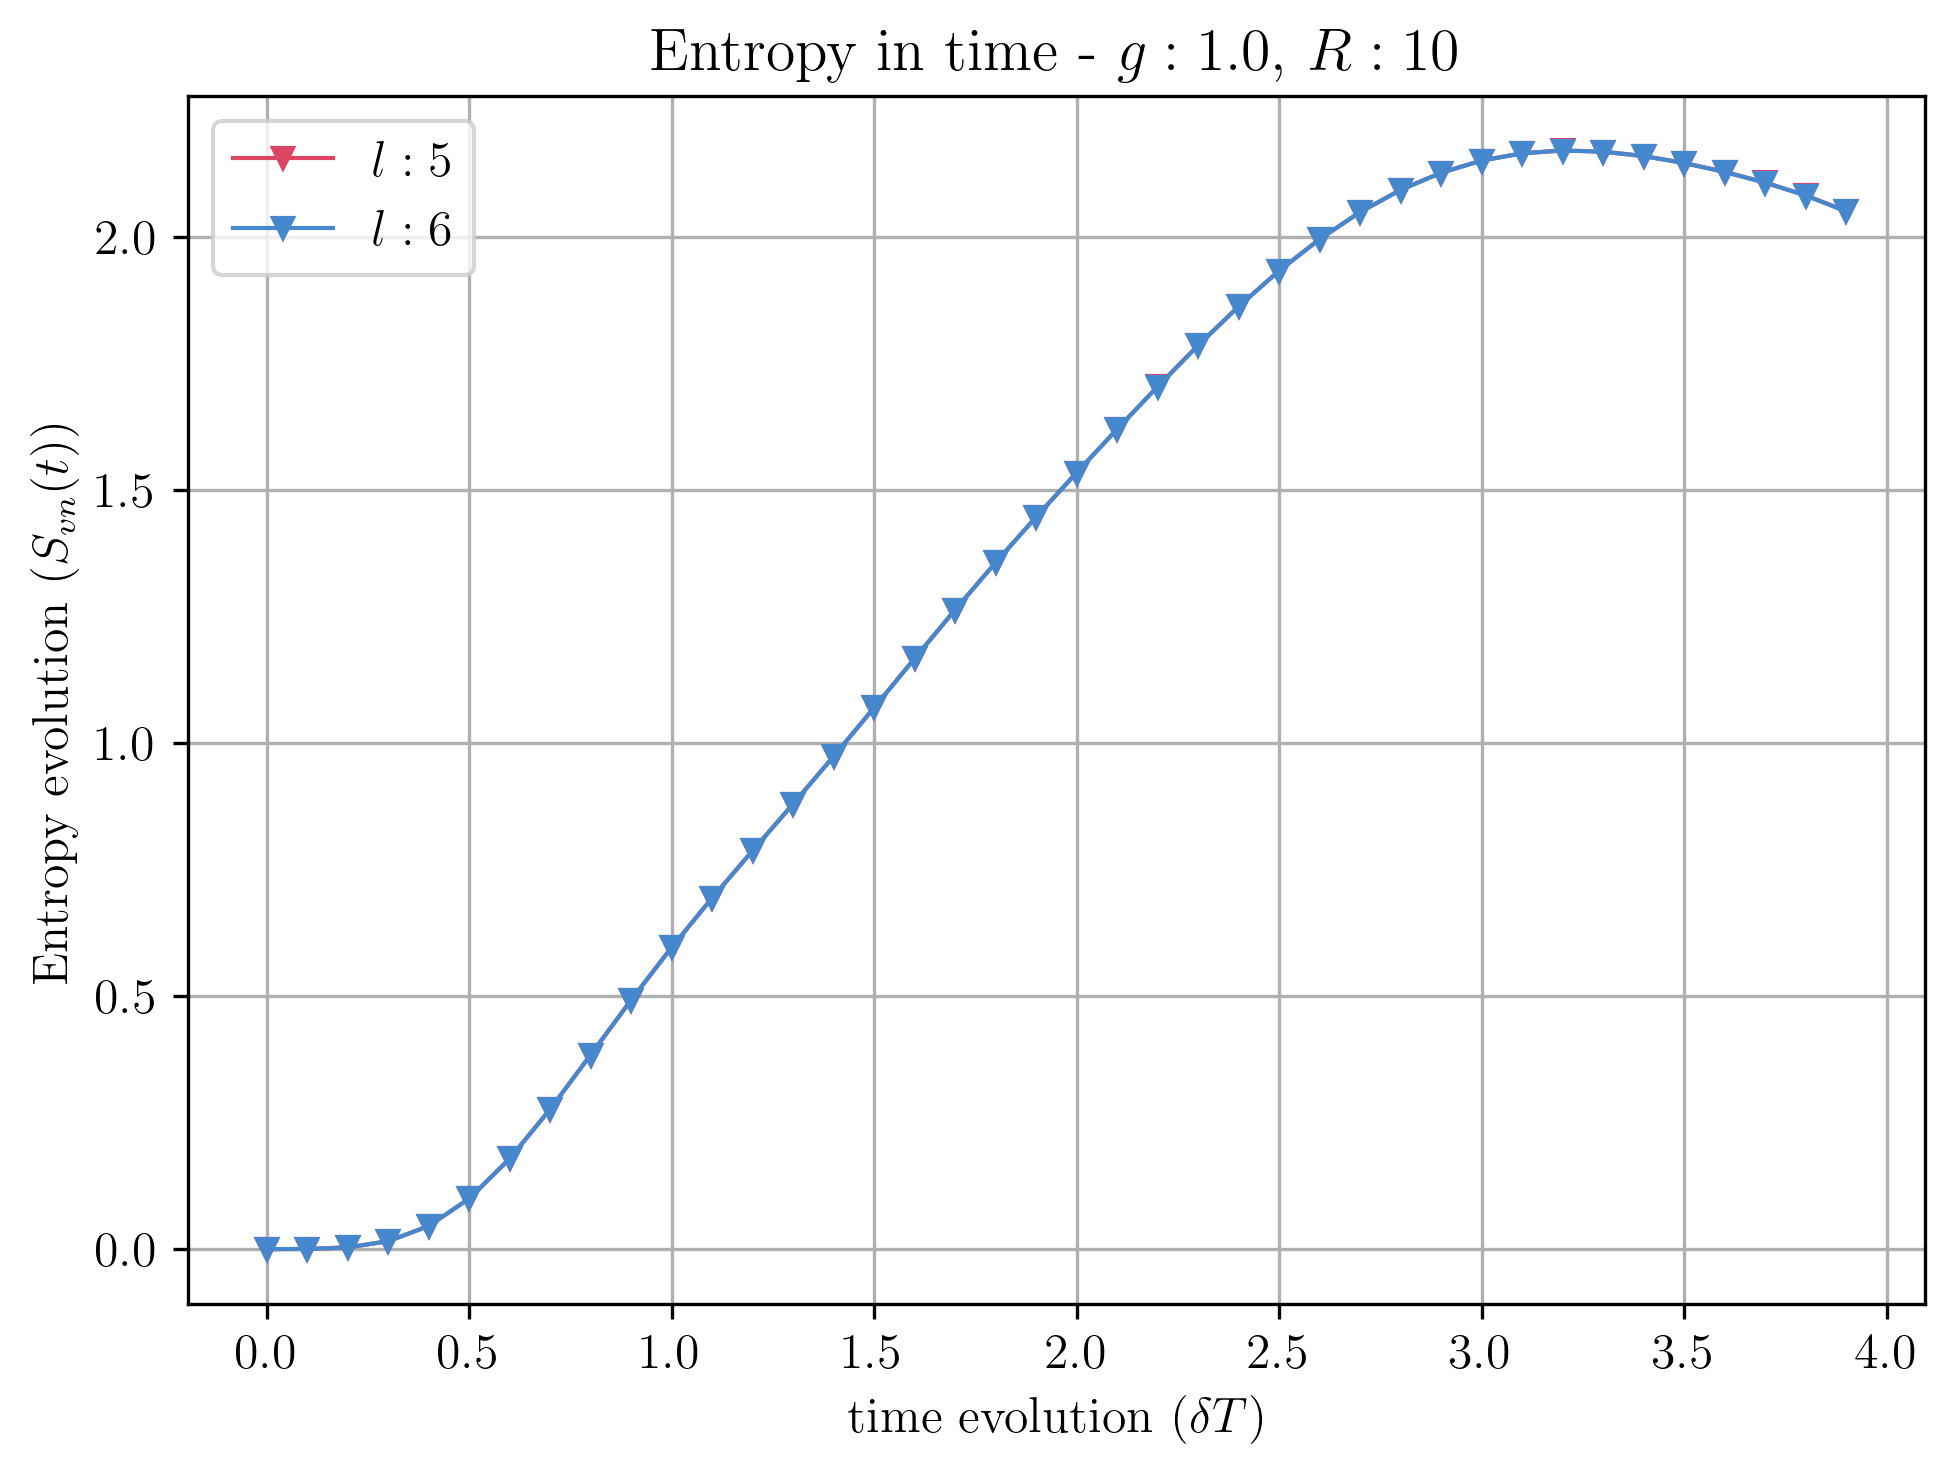

In [ ]:
colors = ["#4688CE","#9B4DB7","#DC4563"]
colors.reverse()
lss = [5,6]
ls = [5]
h_i = 0.8
h_i = 0.9
h_i = 1.0
h_ev = h_i
R = 10
chi = 128
of = 0.2
steps = 200
delta = 0.02

for i, l in enumerate(ls):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    # obs_err = (err_t[1:] + err_t[1])[::int(1/of)] 
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, marker='v', markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$l: {l}$")
    # plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(obs)+np.asarray(obs_err),y2=np.asarray(obs)-np.asarray(obs_err), color=colors[i], alpha=0.4)


ls = [6]
h_i = 0.8
h_i = 0.9
h_i = 1.0
h_ev = h_i
R = 10
chi = 128
of = 0.2
steps = 200
delta = 0.02

for i, l in enumerate(ls):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    # obs_err = (err_t[1:] + err_t[1])[::int(1/of)]
    x_obs = delta*np.arange(steps)[::int(1/of)]
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, marker='v', markersize=5, color=colors[-1], linestyle="-", linewidth=1, label=f"$l: {l}$")
    # plt.plot(x_obs[:len(x_obs)//3+3], obs[:len(x_obs)//3+3], marker='v', markersize=5, color=colors[-1], linestyle="-", linewidth=1, label=f"$l: {l}$")
    # plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(obs)+np.asarray(obs_err),y2=np.asarray(obs)-np.asarray(obs_err), color=colors[i], alpha=0.4)


plt.title(f"Entropy in time - $g: {h_ev}$, $R: {R}$")
# plt.xticks(ticks=(delta*np.arange(steps))[::steps//5], labels=delta*np.linspace(0,steps,steps)[::int((steps/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
# plt.xlim(right=4)
# plt.ylim(top=4)
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/entropy/entropy_evolution_{model}_{lss}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{delta}_steps_{steps}.png")

## Fix $g,R,l$, vary $\delta$

### String width

[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]
[-2, -1, 0, 1, 2]


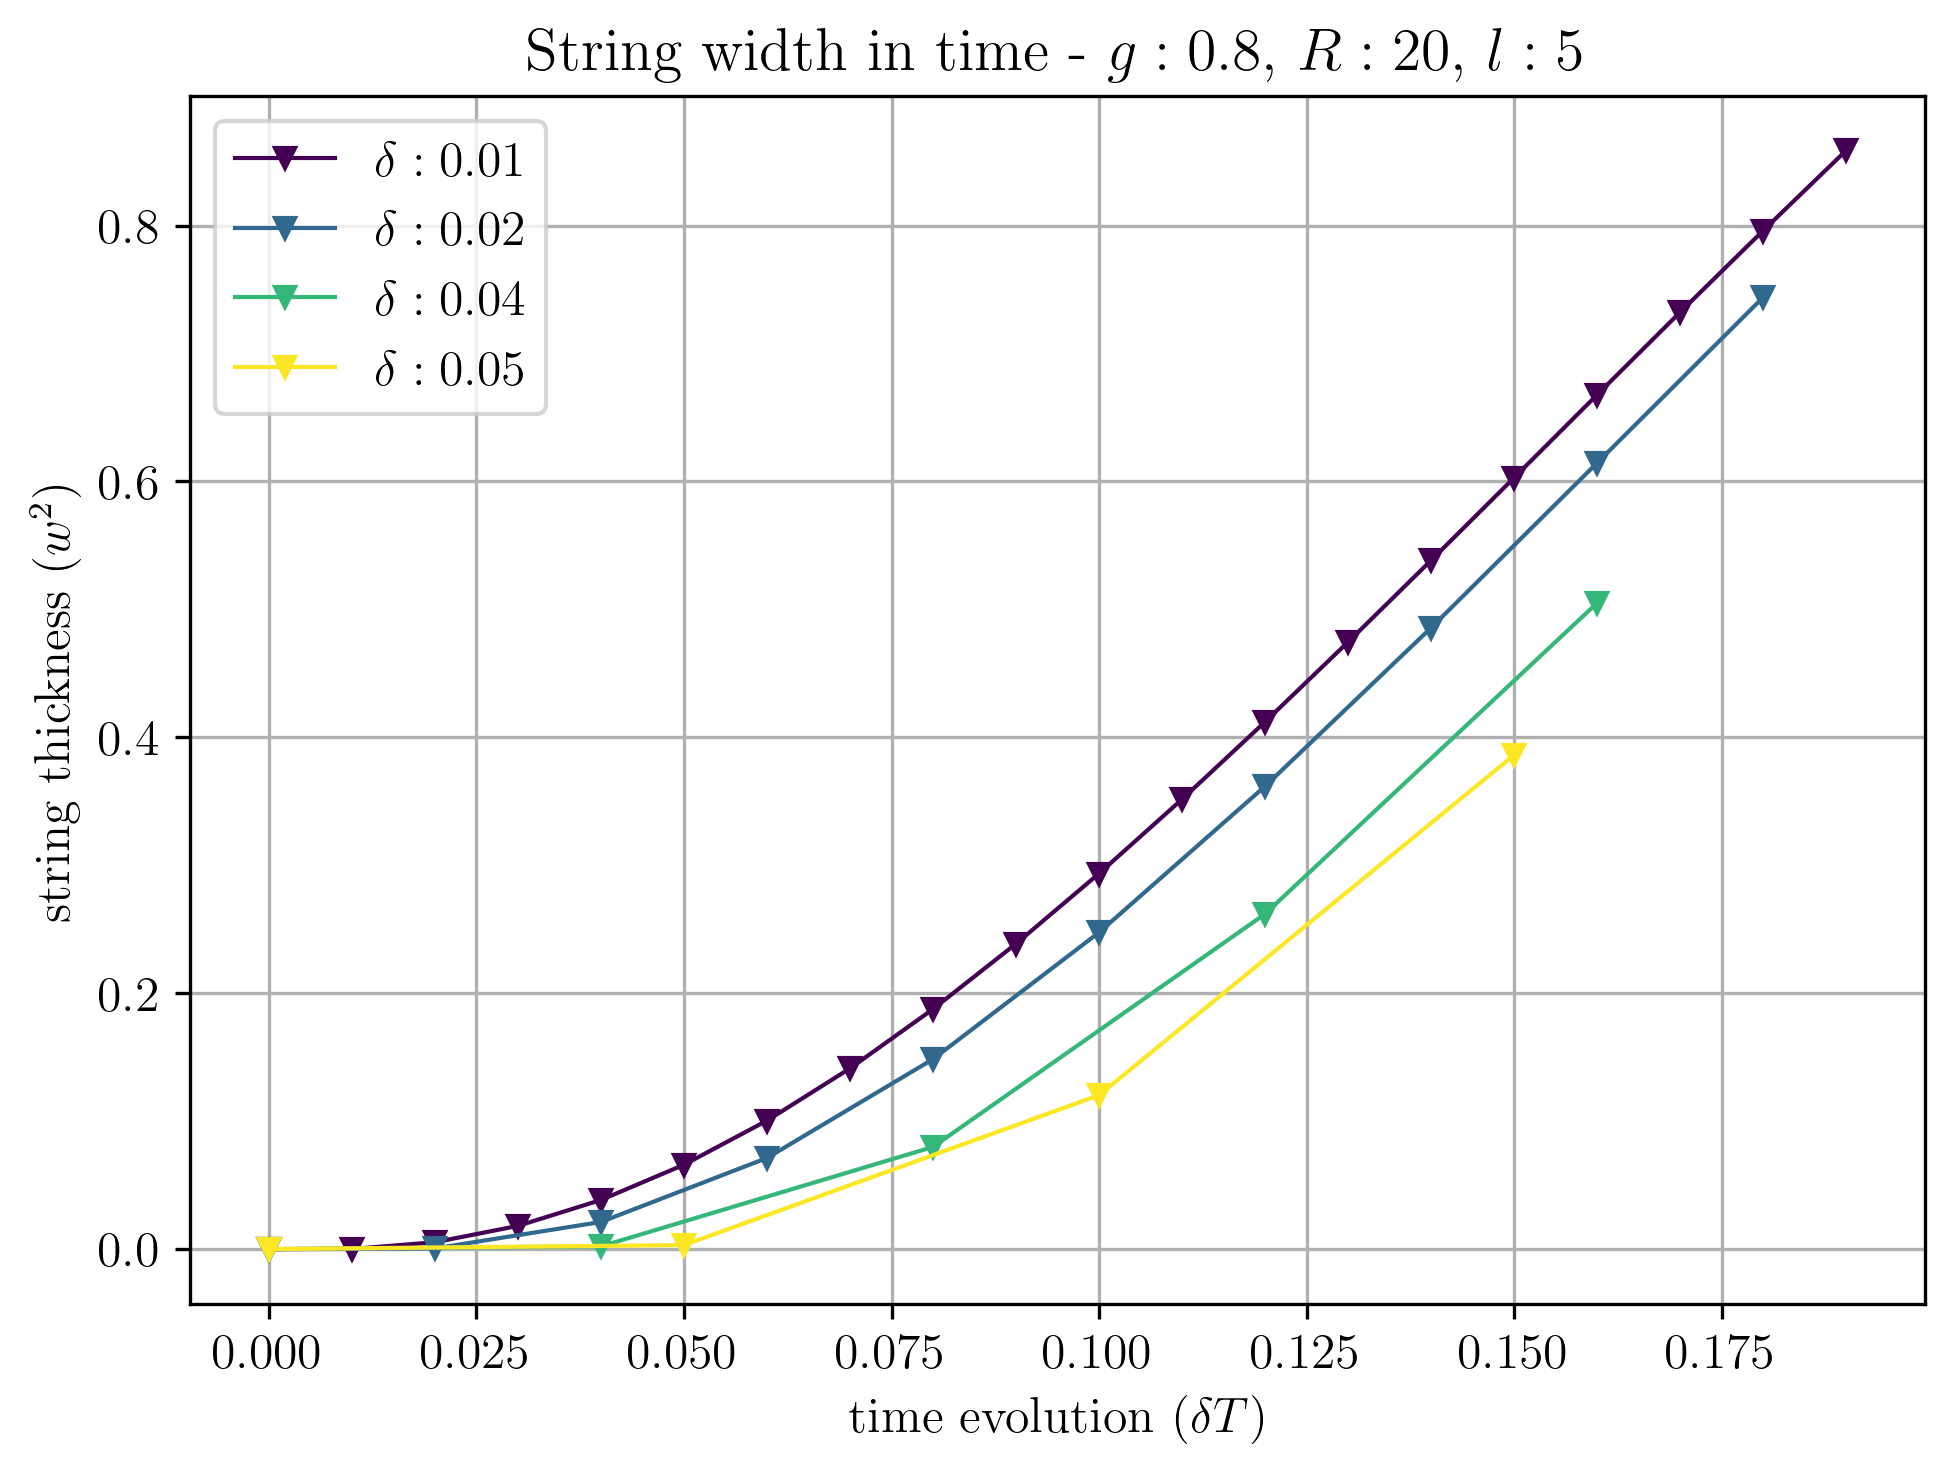

In [252]:
deltas = [0.01,0.02,0.04,0.05]
trotters = [400,200,100,80]

# deltas = [0.02,0.05]
# trotters = [500,200]

l = 5
# l = 6
h_i = 0.8
# h_i = 0.75
# h_i = 0.725
# h_i = 0.7
h_ev = h_i
R = 20
colors = create_sequential_colors(len(deltas))
chi = 128
# chi = 256
of = 0.2

for i, delta in enumerate(deltas):
    steps = trotters[i]
    # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
    ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    plt.plot(delta*np.arange((steps*of)+1)[:int(steps - steps*0.95)], ws_t[:int(steps - steps*0.95)], marker='v', markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$\\delta: {delta}$")
    # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
plt.title(f"String width in time - $g: {h_i}$, $R: {R}$, $l: {l}$")
# plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/string_width_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{deltas}_steps_{trotters}_restricted.png")

### Entropy

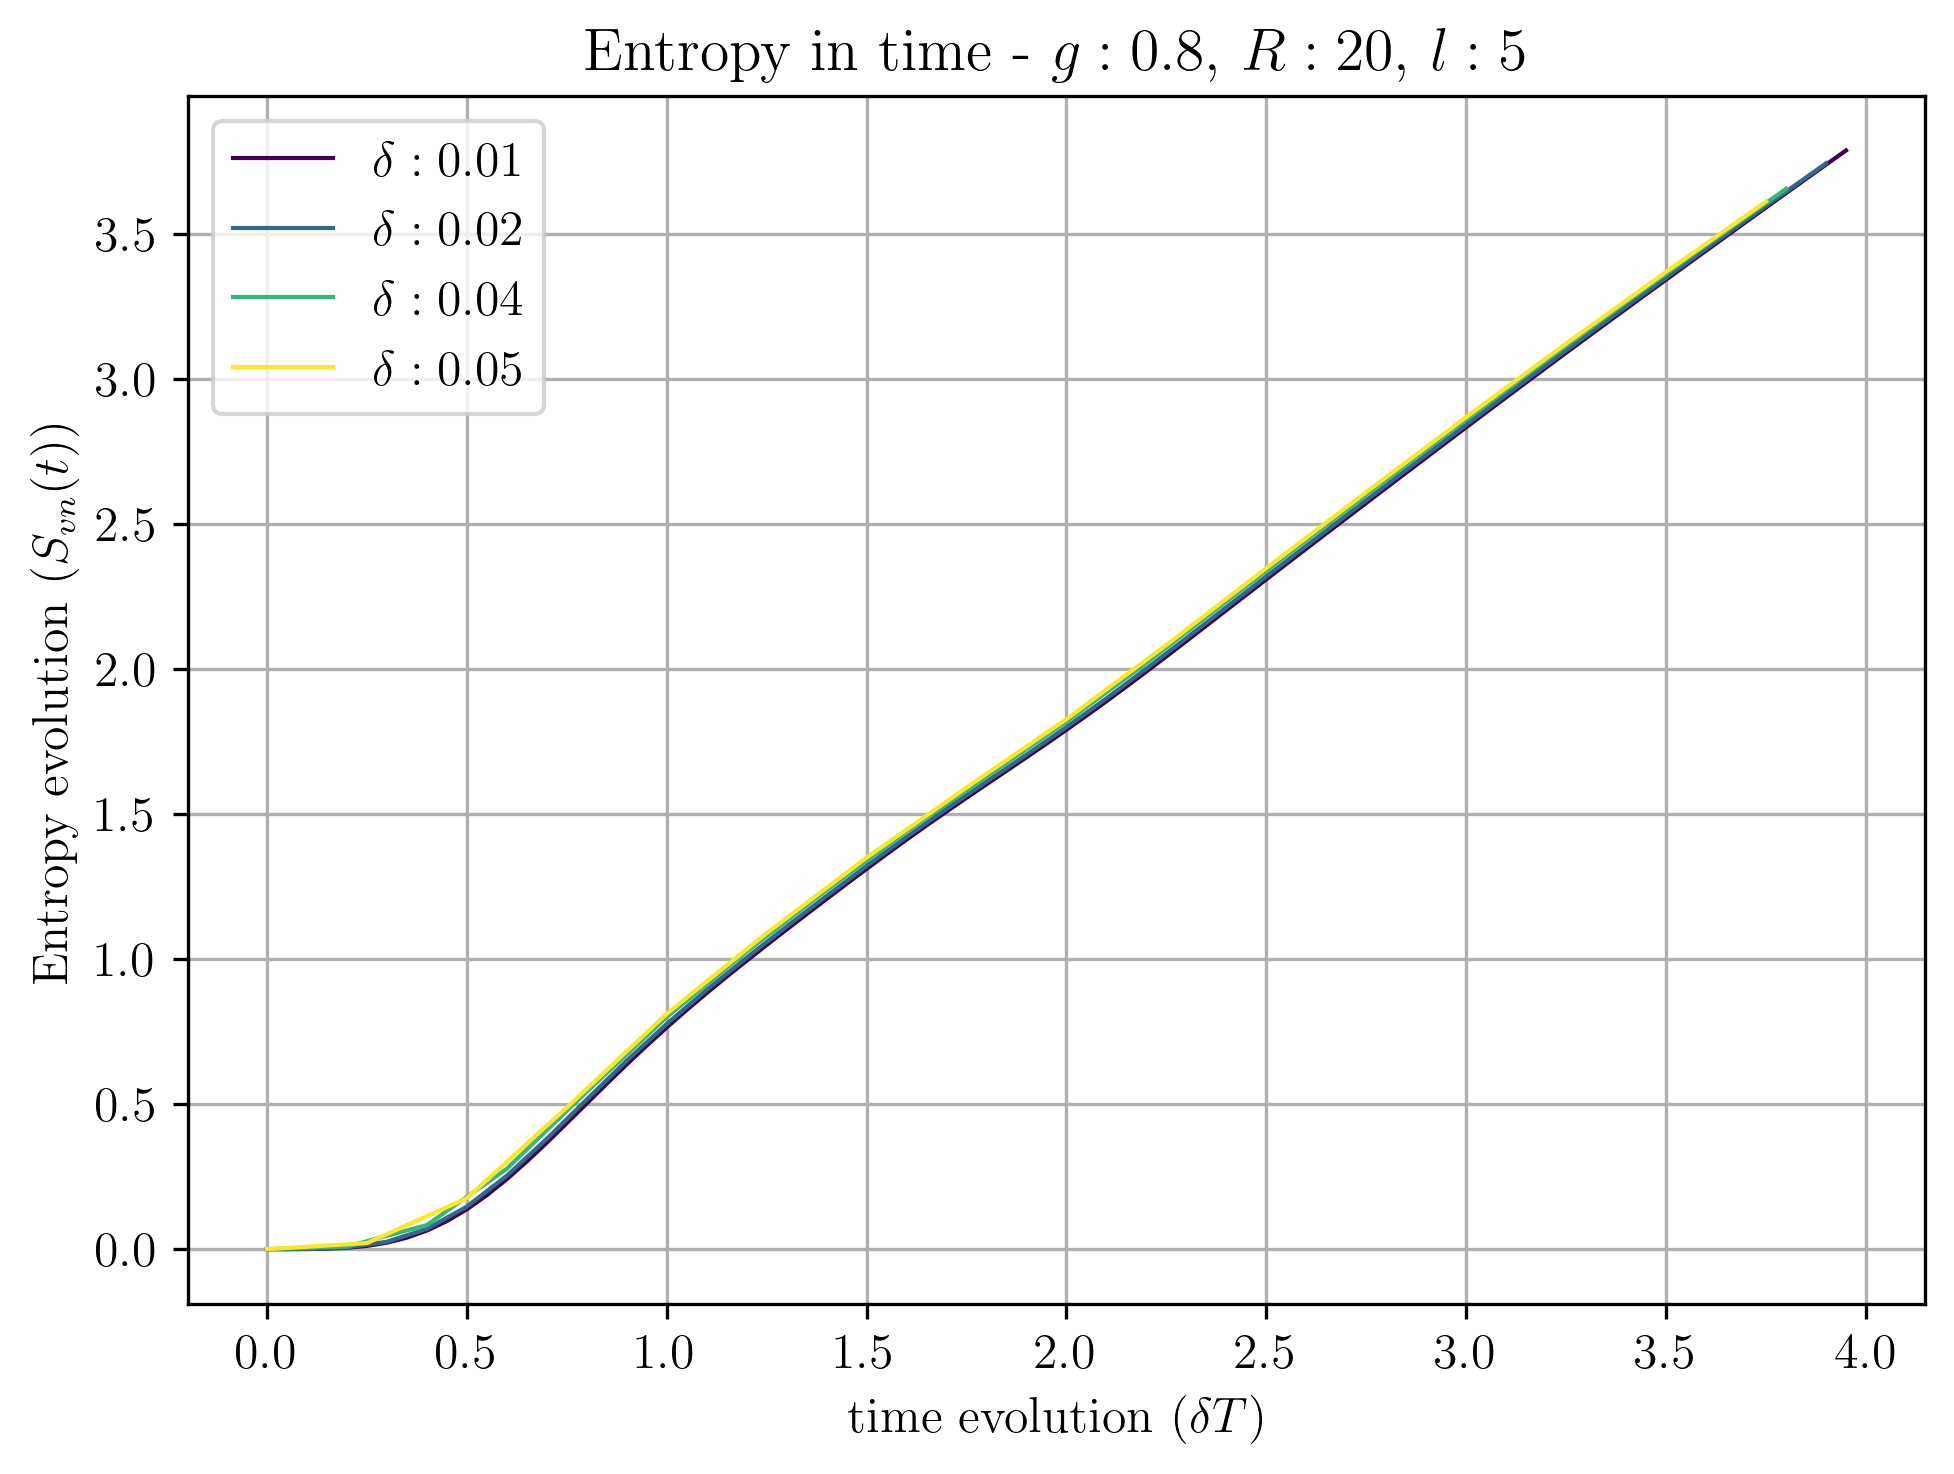

In [ ]:
deltas = [0.01,0.02,0.04,0.05]
trotters = [400,200,100,80]

# deltas = [0.02,0.05]
# trotters = [500,200]

l = 6
l = 5
h_i = 0.8
h_ev = h_i
R = 20
colors = create_sequential_colors(len(deltas))
chi = 128
chis = [64,128]
of = 0.2

for i, delta in enumerate(deltas):
    steps = trotters[i]
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    # entr_t, err_t = time_entropy_exact(R,l,L,chis,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    # obs = (entr_t[1:] - entr_t[1])
    # obs_err = (err_t[1:] + err_t[1])[::int(1/of)] 
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$\\delta: {delta}$")
    # plt.plot(delta*np.arange(steps)[:int(steps - steps*0.95)], obs[:int(steps - steps*0.95)], markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$\\delta: {delta}$")
    # plt.fill_between(delta*np.arange(steps)[:int(steps - steps*0.95)], y1=np.asarray(obs)[:int(steps - steps*0.95)]+np.asarray(obs_err)[:int(steps - steps*0.95)],y2=np.asarray(obs)[:int(steps - steps*0.95)]-np.asarray(obs_err)[:int(steps - steps*0.95)], color=colors[i], alpha=0.4)
plt.title(f"Entropy in time - $g: {h_ev}$, $R: {R}$, $l: {l}$")
# plt.xticks(ticks=(delta*np.arange(steps))[::steps//5], labels=delta*np.linspace(0,steps,steps)[::int((steps/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/entropy/entropy_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{deltas}_steps_{trotters}.png")

## Fix $g,R,l, \delta$, vary $\chi$

### String width

[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]


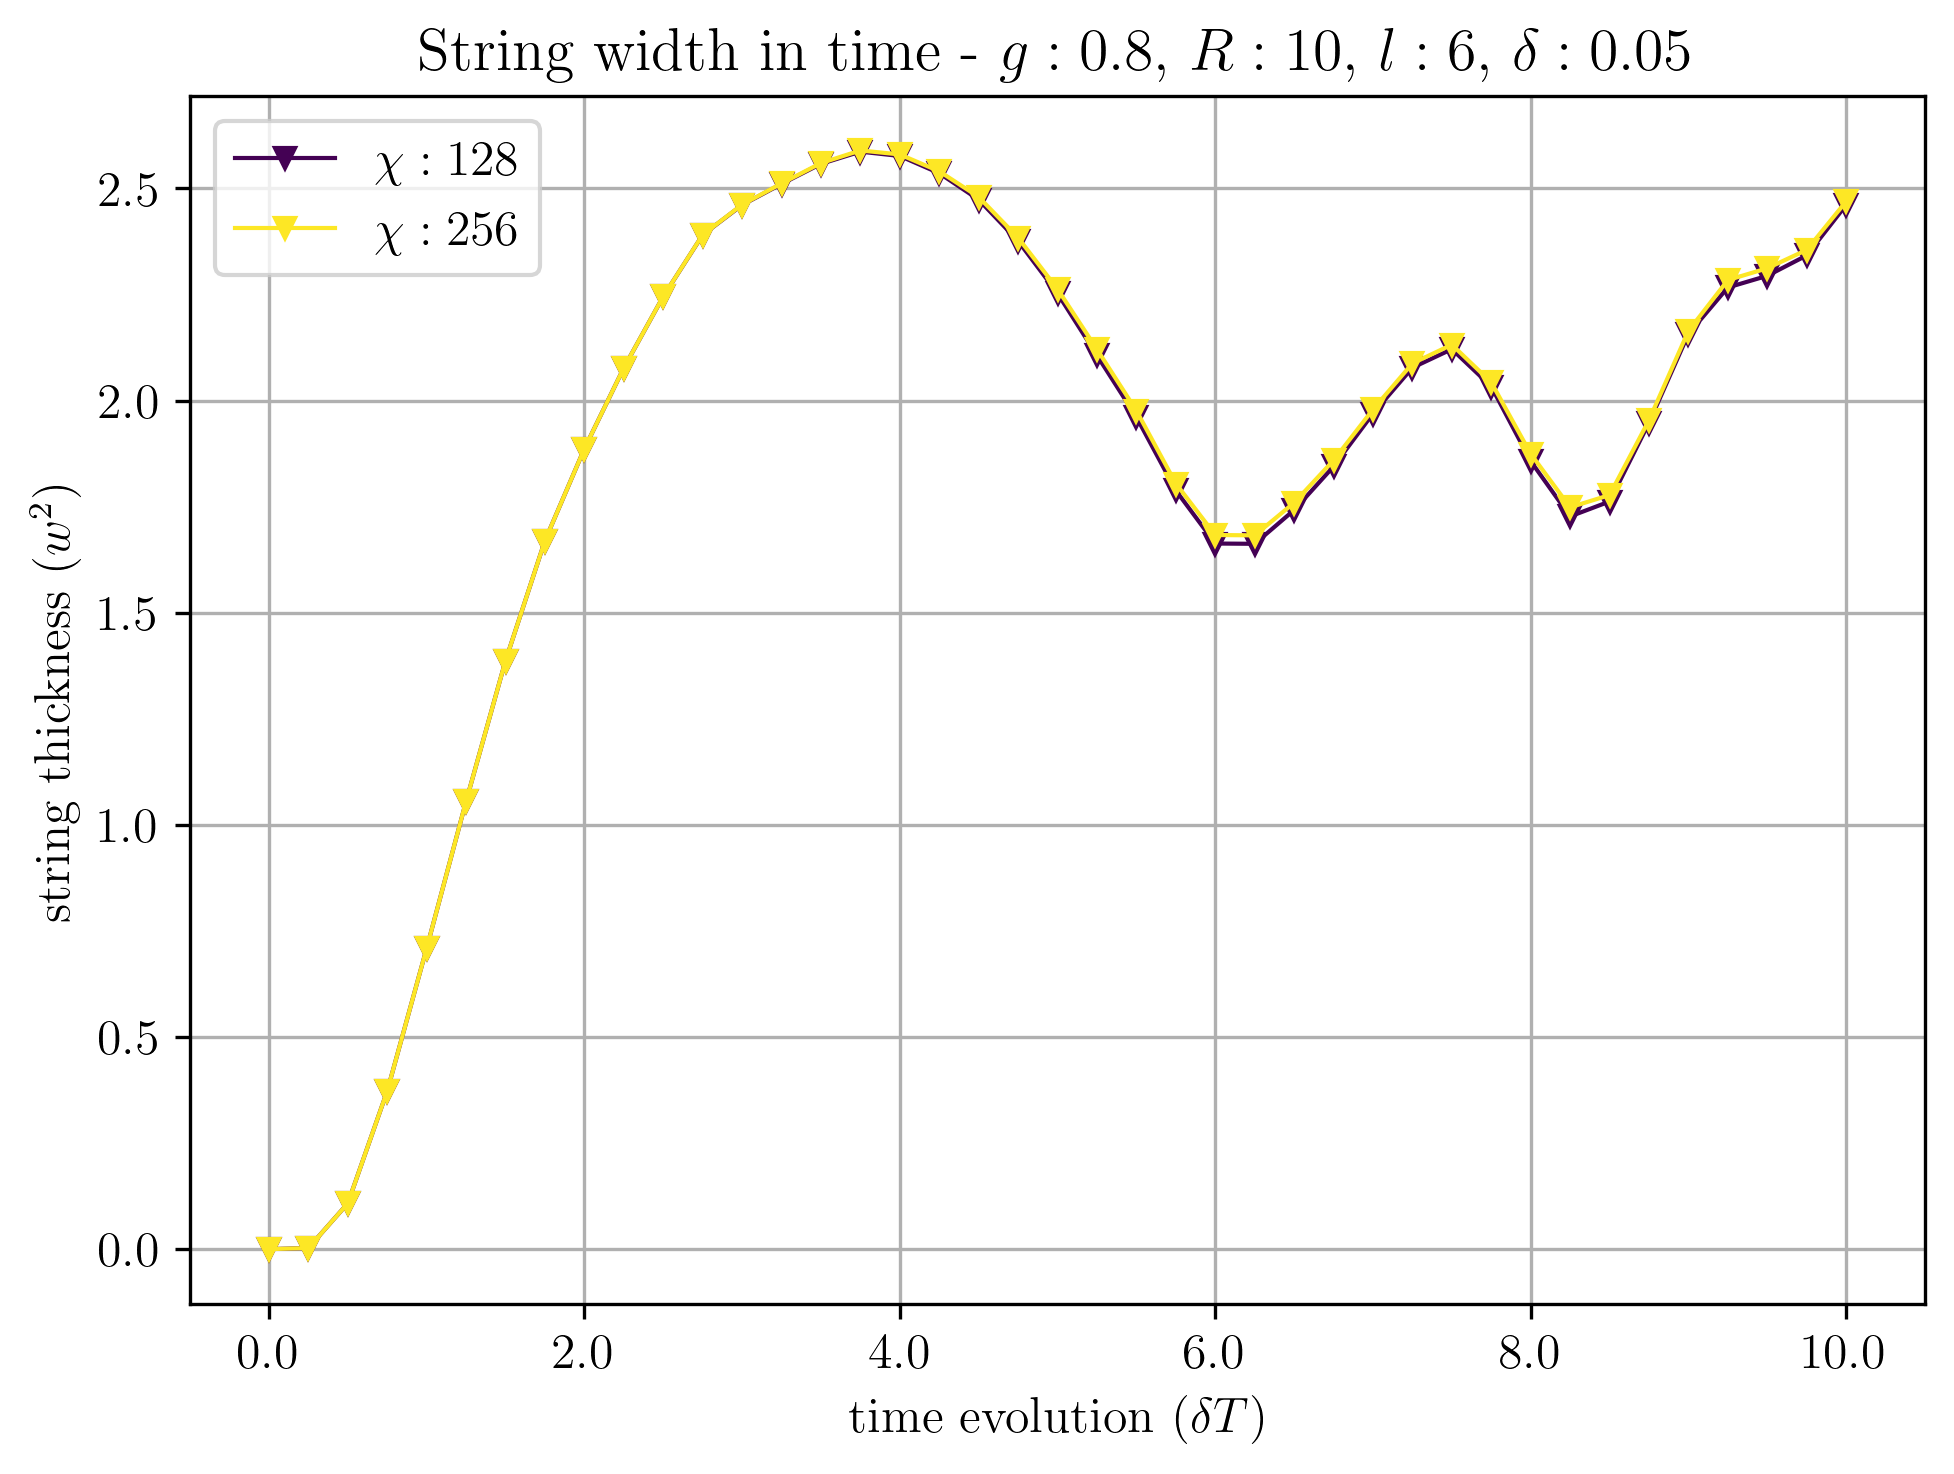

In [262]:
chis = [128,256]

l = 6
h_i = 0.8
h_ev = h_i
R = 10
colors = create_sequential_colors(len(chis))
delta = 0.05
steps = 200
of = 0.2

for i, chi in enumerate(chis):
    # ws_t = time_ev_string_width(h_ev,R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps)
    ws_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    plt.plot(delta*np.arange((steps*of)+1), ws_t, marker='v', markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$\\chi: {chi}$")
    # plt.fill_between(delta*np.arange((steps*of)+1), y1=np.asarray(ws_t)+np.asarray(err_t),y2=np.asarray(ws_t)-np.asarray(err_t), color=colors[i], alpha=0.4)
plt.title(f"String width in time - $g: {h_i}$, $R: {R}$, $l: {l}$, $\\delta: {delta}$")
plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("string thickness $(w^2)$")
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/fluxtube/string_width_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{delta}_steps_{steps}_chis_{chis}.png")

### Entropy

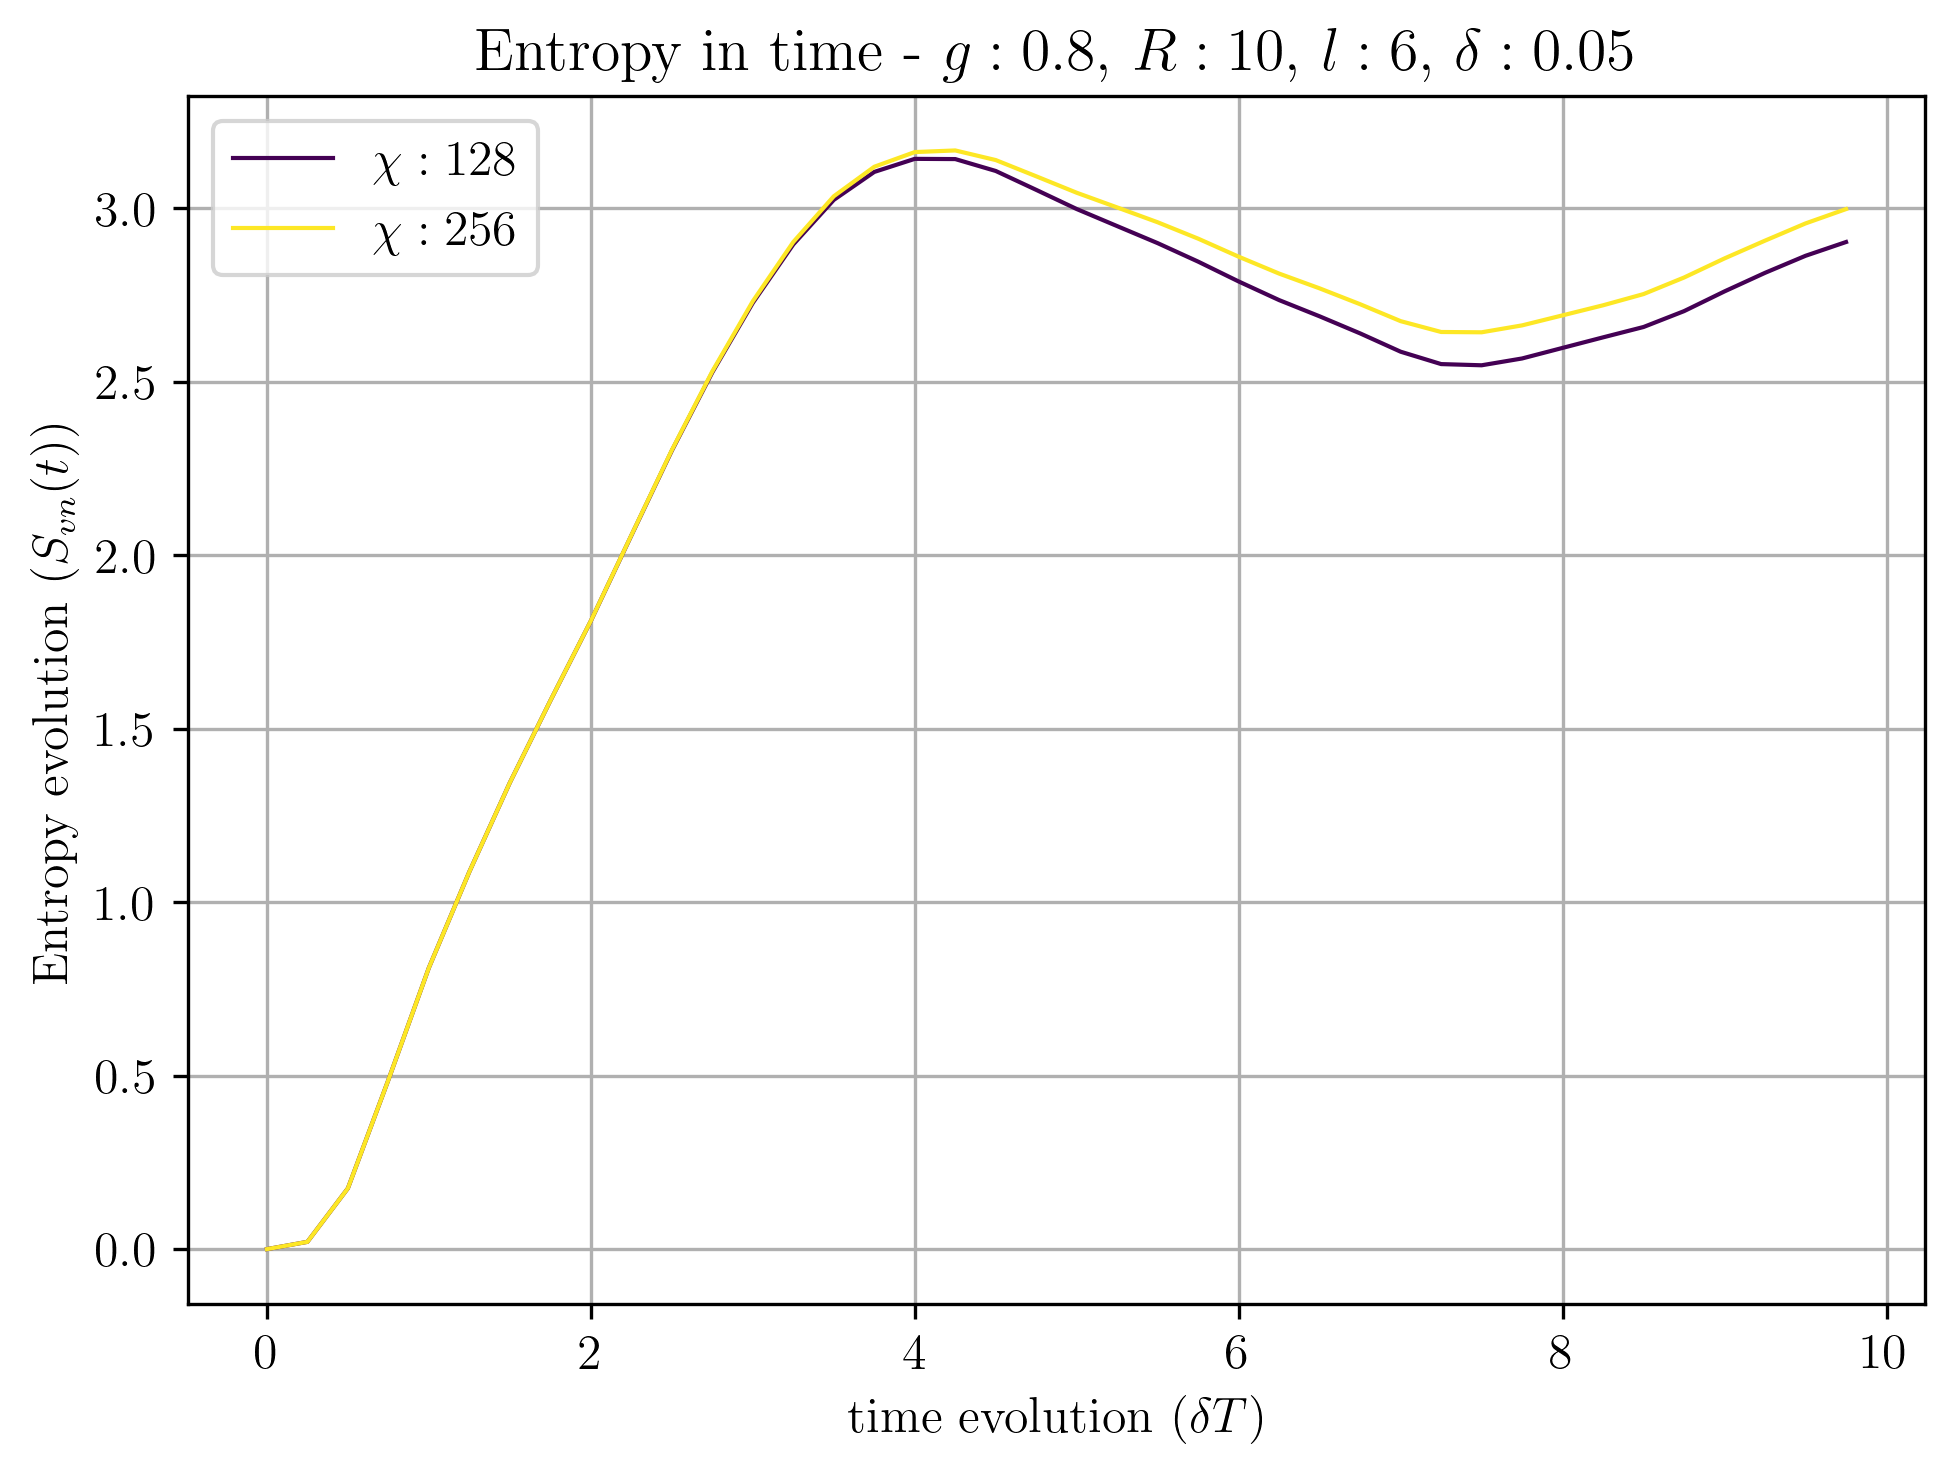

In [254]:
chis = [128,256]

l = 6
h_i = 0.8
h_ev = h_i
R = 10
colors = create_sequential_colors(len(chis))
delta = 0.05
steps = 200
of = 0.2

for i, chi in enumerate(chis):
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)] 
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, markersize=5, color=colors[i], linestyle="-", linewidth=1, label=f"$\\chi: {chi}$")
    # plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(obs)+np.asarray(obs_err),y2=np.asarray(obs)-np.asarray(obs_err), color=colors[i], alpha=0.4)
plt.title(f"Entropy in time - $g: {h_ev}$, $R: {R}$, $l: {l}$, $\\delta: {delta}$")
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
plt.grid(True)
plt.legend()
plt.savefig(f"{path_figures}/figures/entropy/entropy_evolution_{model}_{l}x{L}_{bc}_{sector}_R_{R}_h_ev_{h_ev}_delta_{delta}_steps_{steps}_chis_{chis}.png")

## Long time behaviour

### String width

[-2, -1, 0, 1, 2, 3]
[-2, -1, 0, 1, 2, 3]


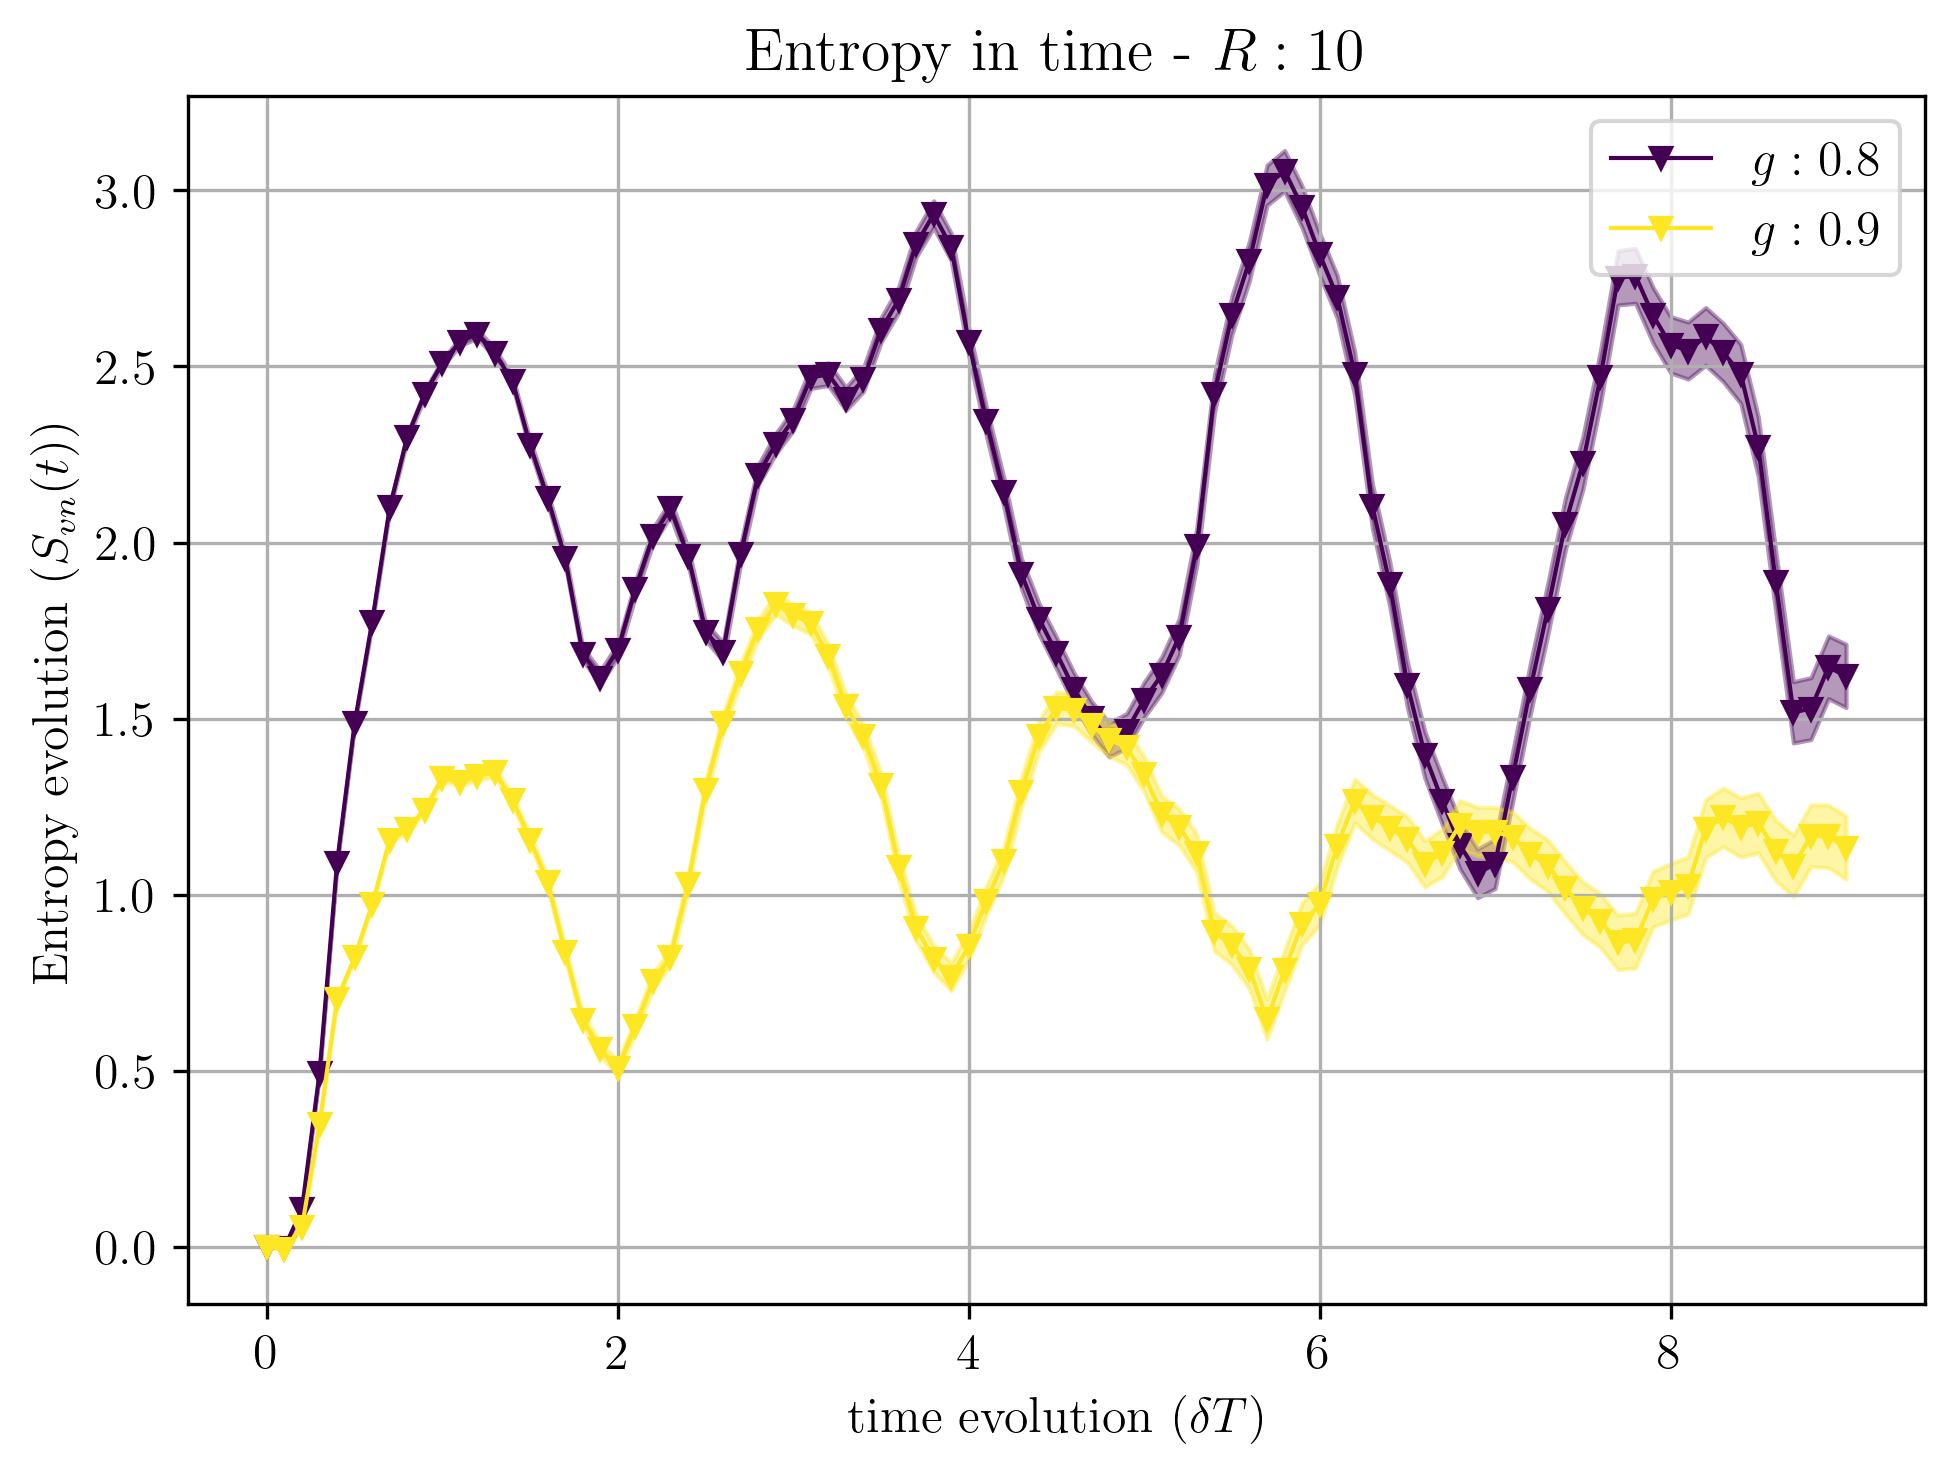

In [260]:
R = 10
chis = [128]
chi = 128
of = 0.3


l = 6

his = [0.8, 0.9]
# his = [0.8]
delta = 0.1
# delta = 0.02
steps = 300
# steps = 500

colors = create_sequential_colors(2)

ws_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    # entr_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
    entr_t = time_ev_string_width_occupation(R,l,L,chi,bc,sector,h_i,h_ev,1,path_tensor=path_tensor,delta=delta,trotter=steps, obs_freq=of)
    obs = entr_t
    err_t = (delta**3)*np.arange(steps*of+1)
    ws_g_rough.append(obs)
    
    plt.plot(delta*np.arange(steps*of+1), obs, marker='v', markersize=5, color=colors[j], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
    plt.fill_between(delta*np.arange(steps*of+1), y1=np.asarray(obs)+np.asarray(err_t),y2=np.asarray(obs)-np.asarray(err_t), color=colors[j], alpha=0.4)
plt.title(f"Entropy in time - $R: {R}$")
# plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
plt.grid(True)
plt.legend()

### Entropy

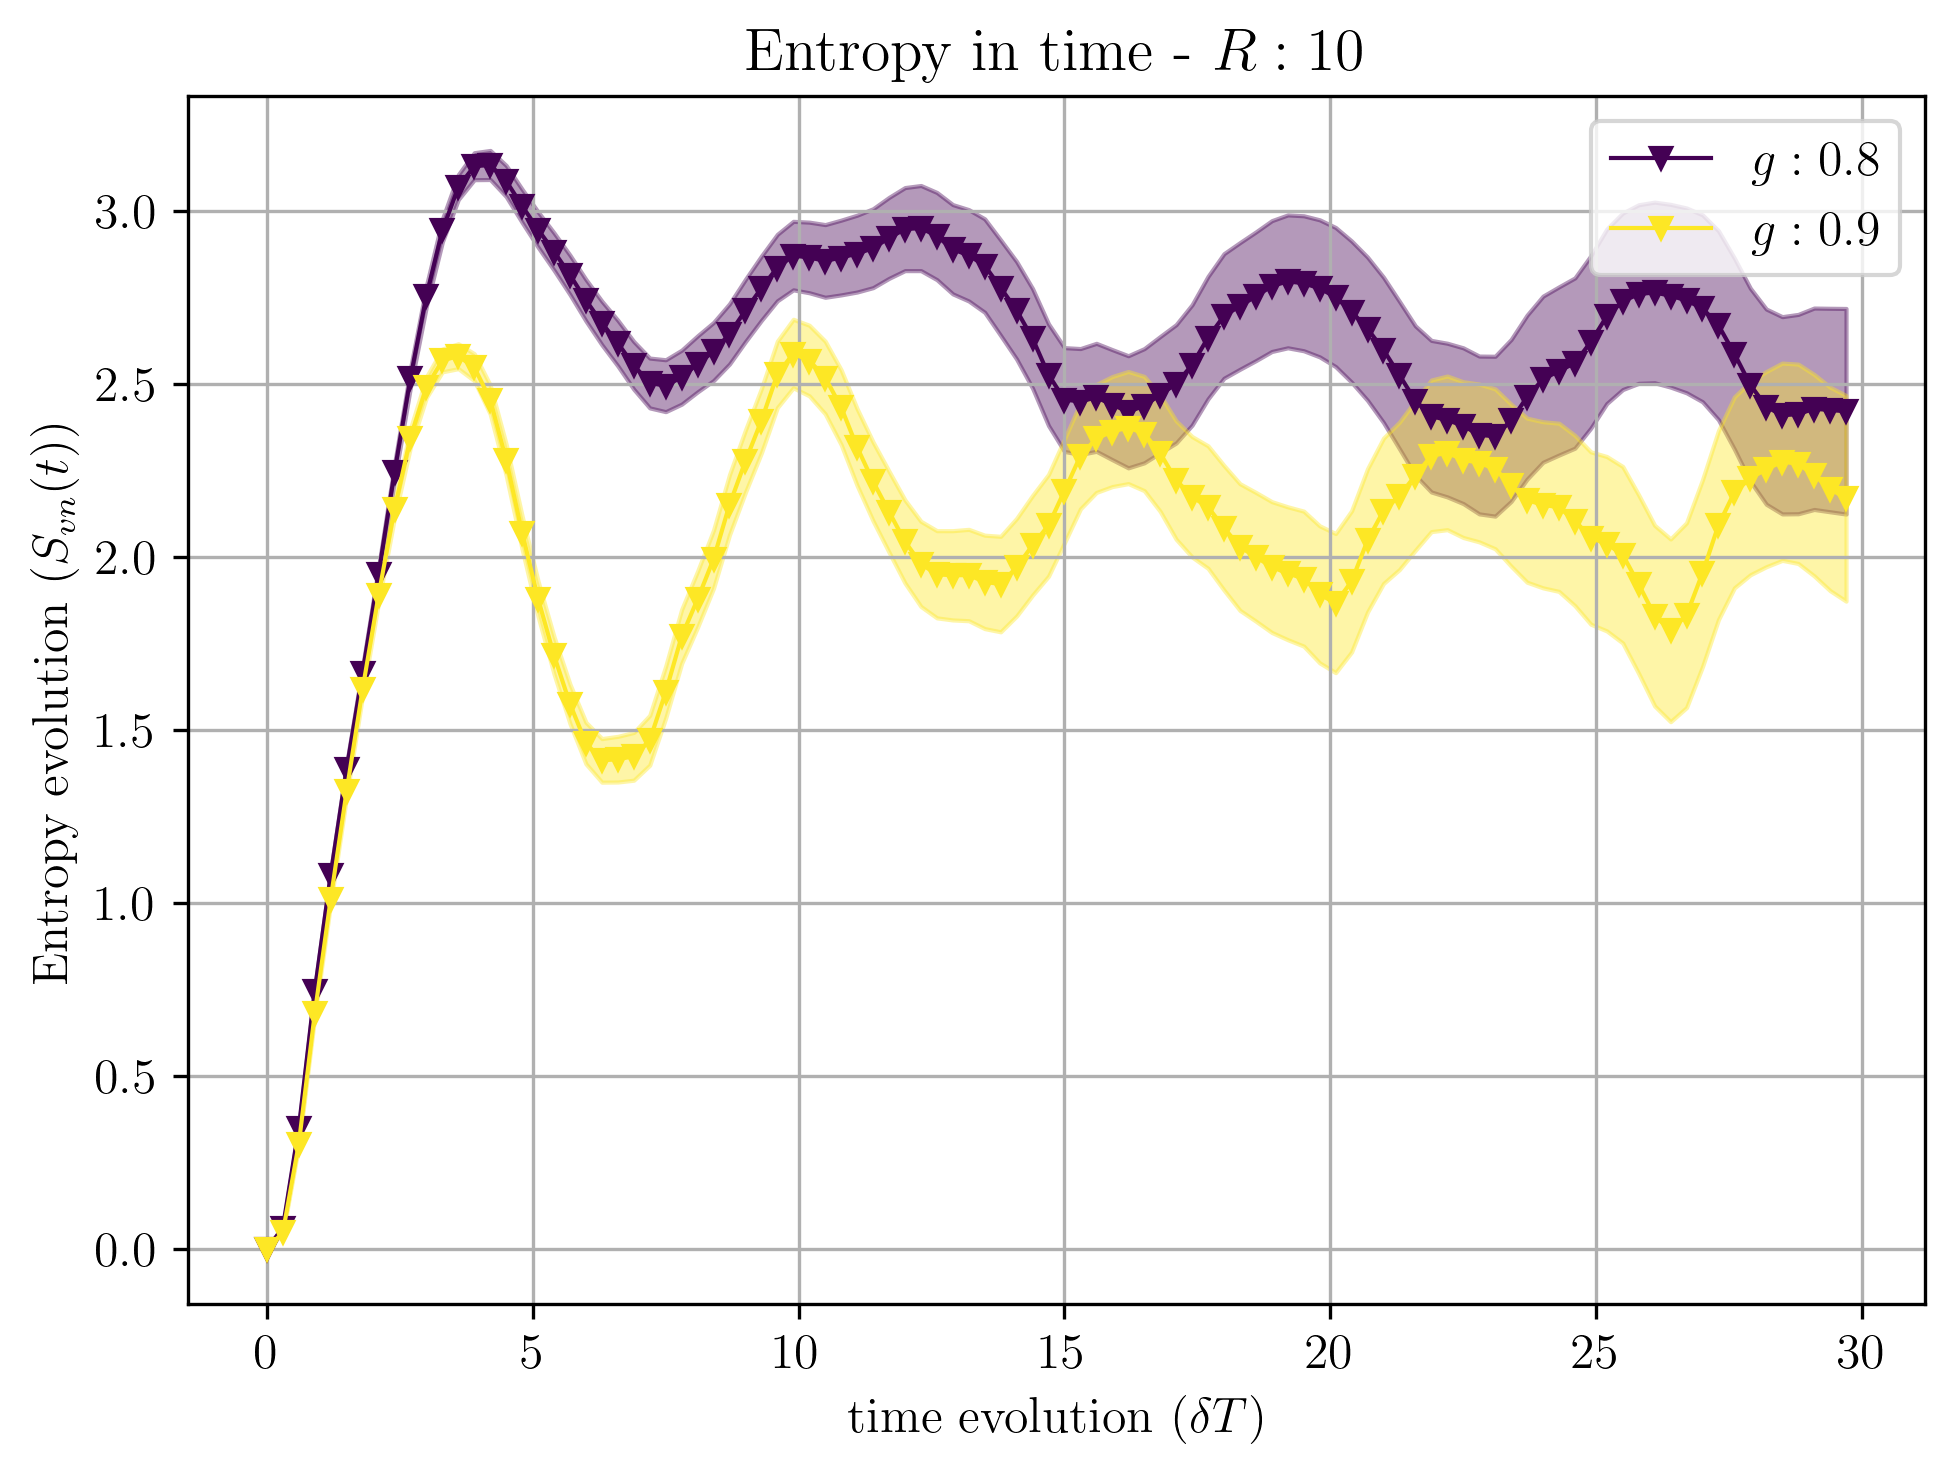

In [255]:
R = 10
chis = [128]
chi = 128
of = 0.3


l = 6

his = [0.8, 0.9]
# his = [0.8]
delta = 0.1
# delta = 0.02
steps = 300
# steps = 500

colors = create_sequential_colors(2)

ws_g_rough = []
for j, h_i in enumerate(his):
    h_ev = h_i
    # entr_t, err_t = string_width_exact_chi(h_ev,R,l,L,chis,bc,sector,h_i,h_ev,1,path_tensor,delta=delta,trotter=steps)
    entr_t = time_entropy(R,l,L,chi,bc,sector,h_i,h_ev,path_tensor,delta=delta,trotter=steps)
    obs = (entr_t[1:] - entr_t[1])[::int(1/of)]
    err_t = (delta**3)*np.arange(steps-1)[::int(1/of)]
    ws_g_rough.append(obs)
    
    plt.plot(delta*np.arange(steps)[::int(1/of)], obs, marker='v', markersize=5, color=colors[j], linestyle="-", linewidth=1, label=f"$g: {h_i}$")
    plt.fill_between(delta*np.arange(steps)[::int(1/of)], y1=np.asarray(obs)+np.asarray(err_t),y2=np.asarray(obs)-np.asarray(err_t), color=colors[j], alpha=0.4)
plt.title(f"Entropy in time - $R: {R}$")
# plt.xticks(ticks=(delta*np.arange(int((steps*of)+1)))[::int((steps*of+1)/5)], labels=delta*np.linspace(0,steps,int((steps*of)+1))[::int((steps*of+1)/5)])
plt.xlabel("time evolution $(\\delta T)$")
plt.ylabel("Entropy evolution $(S_{vn}(t))$")
plt.grid(True)
plt.legend()

In [ ]:
np.argmax(obs), len(obs)

(33, 100)